#### House of Travel Customer Analysis Synopsis

Purpose: 

To better understand our customer database and the distinct segments within it based on purchasing behaviour, demographic and geographical location.
To enable a better understanding of the opportunities to grow our current base and to enhance our ability to deliver personalized experiences and targeted communications to our customers to drive sales growth, increased customer loyalty and customer lifetime value.




Segment Profiling:

Develop detailed profiles for each customer segment, highlighting key characteristics, behaviours, booking patterns, loyalty, destination and product preferences, variations by store/geography and potential growth opportunities.


In [1]:
#!C:\Users\DavidAirehrourTogeth\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

In [2]:
# Define organization color scheme
import matplotlib.pyplot as plt

# ==============================
# 1. Define Standard Colors
# ==============================
green = '#03AB3D'
magenta = '#E51AE0'
blue = '#032BFF'
black = '#000000'
teal = '#0DF2EB'
white = '#FFFFFF'
indigo = '#1C1463'
red = '#FC4D59'
yellow = '#FAC203'
light_grey = '#F0F2F2'
mid_grey = '#CCCCCC'
purple = '#7526D9'
dark_grey = '#999999'


In [3]:
#!pip install country-database

Read customer profile data

In [4]:
# Import required GCS libraries
from google.cloud import storage
import pandas as pd

# Initialize GCS client
storage_client = storage.Client()

# Get the bucket and blob
bucket = storage_client.get_bucket('hot-together-dropbox')
blob = bucket.blob('HOT_SFMC_Customer_Incremental_2025-02-19.csv')

# Download to a temporary file
import tempfile
temp_file = tempfile.NamedTemporaryFile(delete=False)
blob.download_to_filename(temp_file.name)

# Read and display first few rows
customer_df = pd.read_csv(temp_file.name, sep='|', encoding='latin1')

customer_df = customer_df[customer_df['ProfileState'] == 'Live']

# Drop rows with missing ClientID or UnsubscribeURL and show first 5 rows
customer_df = customer_df.dropna(subset=['ClientID', 'UnsubscribeURL'])

# Convert ClientID column to integer type for proper numerical handling
customer_df['ClientID'] = customer_df['ClientID'].astype(int)
customer_df.head()

C:\Users\DavidAirehrourTogeth\AppData\Local\Temp\ipykernel_70084\1928446925.py:18: DtypeWarning: Columns (0,11,12,17,18,20,23,35,36,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_df = pd.read_csv(temp_file.name, sep='|', encoding='latin1')


,ClientID,ProfileState,FirstName,LastName,Salutation,EmailAddress,EmailInfoAddress,MobileNumber,City,EmailFlag,...,FirstKnownBookingDate,LastBookingDate,NumberOfNonHOorNHFolders,NumberOfHOFolders,NumberOfNHFolders,AppDownloadMM,AppDownloadHOT,MMLogin,HOTLogin,MMPoints
0,654945,Live,Sonya,Porterauld,Sonya,NaN,NaN,2.102279e+09,NaN,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,994956,Live,Wendy,Aitchison,Wendy,NaN,NaN,NaN,Havelock North,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,994995,Live,Sarah Louise,Meikle,Sarah,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,654968,Live,Pieter,Skinner,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,655038,Live,Simone Alise,Van Asbeck,Simone,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# # Convert date columns to datetime type first
# customer_df['FirstKnownBookingDate'] = pd.to_datetime(customer_df['FirstKnownBookingDate'])
# customer_df['LastBookingDate'] = pd.to_dactetime(customer_df['LastBookingDate'])

# print("First Booking Date Range:")
# print("Min:", customer_df['FirstKnownBookingDate'].min())
# print("Max:", customer_df['FirstKnownBookingDate'].max())
# print("\nLast Booking Date Range:") 
# print("Min:", customer_df['LastBookingDate'].min())
# print("Max:", customer_df['LastBookingDate'].max())

In [6]:
# Import required GCS libraries
from google.cloud import storage
import pandas as pd

# Initialize GCS client
storage_client = storage.Client()

# Get the bucket and blob
bucket = storage_client.get_bucket('hot-together-dropbox')
blob = bucket.blob('HOT_SFMC_Customer_Incremental_2024-12-04.csv')

# Download to a temporary file
import tempfile
temp_file = tempfile.NamedTemporaryFile(delete=False)
blob.download_to_filename(temp_file.name)

# Read and display first few rows
customer_df_old = pd.read_csv(temp_file.name, 
                            sep="|",
                            encoding='latin1',
                            on_bad_lines='skip'  # this will skip problematic rows
                        )


customer_df_old = customer_df_old[customer_df_old['ProfileState'] == 'Live']

# Drop rows with missing ClientID or UnsubscribeURL and show first 5 rows
customer_df_old = customer_df_old.dropna(subset=['ClientID', 'UnsubscribeURL'])

# Convert ClientID column to integer type for proper numerical handling
customer_df_old['ClientID'] = customer_df_old['ClientID'].astype(int)
customer_df_old.head()

C:\Users\DavidAirehrourTogeth\AppData\Local\Temp\ipykernel_70084\2489845788.py:18: DtypeWarning: Columns (0,7,9,10,11,12,13,20,23) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_df_old = pd.read_csv(temp_file.name,


,ClientID,ProfileState,FirstName,LastName,Salutation,EmailAddress,EmailInfoAddress,MobileNumber,City,EmailFlag,...,FirstKnownBookingDate,LastBookingDate,NumberOfNonHOorNHFolders,NumberOfHOFolders,NumberOfNHFolders,AppDownloadMM,AppDownloadHOT,MMLogin,HOTLogin,MMPoints
0,1999526,Live,Cherie,Fenemor,Cherie,cheriefenemor@yahoo.com,NaN,273319079.0,Feilding,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1999409,Live,Anita Devi,Sen,Anita,anitasen@xtra.co.nz,NaN,64211674478.0,Auckland,1.0,...,2019-11-18,2021-04-20,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017848,Live,Sonali,Pereira,Sonali,sonali.pereira@yahoo.com,NaN,64220832240.0,Rotorua,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017866,Live,Carol,Coakley,Carol,carolc@Lifewise.org.nz,NaN,NaN,Auckland,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1951901,Live,Nico,Beetz,Nico,nico.beetz@hotmail.co.nz,NaN,NaN,Hamilton,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# # Convert date columns to datetime type first
# customer_df_old['FirstKnownBookingDate'] = pd.to_datetime(customer_df_old['FirstKnownBookingDate'])
# customer_df_old['LastBookingDate'] = pd.to_datetime(customer_df_old['LastBookingDate'])

# print("First Booking Date Range:")
# print("Min:", customer_df_old['FirstKnownBookingDate'].min())
# print("Max:", customer_df_old['FirstKnownBookingDate'].max())
# print("\nLast Booking Date Range:") 
# print("Min:", customer_df_old['LastBookingDate'].min())
# print("Max:", customer_df_old['LastBookingDate'].max())

#### Process to combine and de-dup the data customer data

In [8]:
# Create a new dataframe by merging old and new customer data
# First remove duplicates from customer_df based on ClientID (keeping first occurrence)
customer_df_deduped = customer_df.drop_duplicates(subset=['ClientID'], keep='first')

# Combine with customer_df_old, again removing any duplicates by ClientID
customer_df_new = pd.concat([customer_df_old, customer_df_deduped], axis=0)
customer_df_new = customer_df_new.drop_duplicates(subset=['ClientID'], keep='first')

# Reset index of final merged dataframe 
customer_df_new = customer_df_new.reset_index(drop=True)

print(f"Original old dataset records: {len(customer_df_old):,}")
print(f"Original new dataset records: {len(customer_df):,}")
print(f"Total records after deduplication: {len(customer_df_new):,}")

Original old dataset records: 1,534,609
Original new dataset records: 822,790
Total records after deduplication: 2,356,975


##### Get the duplicate customers

In [9]:
# Find ClientIDs that exist in both dataframes
common_clients = pd.merge(customer_df_old[['ClientID']], 
                         customer_df[['ClientID']], 
                         on='ClientID', 
                         how='inner')

print(f"Number of duplicate ClientIDs between old and new datasets: {len(common_clients)}")

# Get full records for these duplicated ClientIDs
duplicates_old = customer_df_old[customer_df_old['ClientID'].isin(common_clients['ClientID'])]
duplicates_new = customer_df[customer_df['ClientID'].isin(common_clients['ClientID'])]

print("\nSample of duplicate records from old dataset:")
print(duplicates_old[['ClientID', 'FirstName', 'LastName']].head())
print("\nSample of duplicate records from new dataset:")
print(duplicates_new[['ClientID', 'FirstName', 'LastName']].head())

Number of duplicate ClientIDs between old and new datasets: 424

Sample of duplicate records from old dataset:
       ClientID       FirstName    LastName
7532    3005966  Kenneth Murray        Wood
9107    2188536    Jenna Yvonne     Menzies
14729   1341602           Kevin      Welton
16968   4201730        Koi Noah         Epp
36678   3765994           Maria  Manglicmot

Sample of duplicate records from new dataset:
      ClientID      FirstName  LastName
365    2113484    Jessica Ann  Drummond
1212   2939470          Janis      Rudd
1501   1497373  Michael David    Elston
3854   2660400         Bronte     Black
4150   1816368   John William   De Lury


In [10]:
# Verify no duplicate ClientIDs exist in merged dataset
duplicate_clients = customer_df_new[customer_df_new.duplicated(subset=['ClientID'], keep=False)]

if len(duplicate_clients) > 0:
    print(f"Found {len(duplicate_clients)} duplicate ClientID records")
    print("\nSample of duplicates:")
    print(duplicate_clients[['ClientID', 'FirstName', 'LastName']].head())
else:
    print("No duplicate ClientIDs found")

No duplicate ClientIDs found


Read the transaction data

In [11]:
# Import required GCS libraries
from google.cloud import storage
import pandas as pd

# Initialize GCS client
storage_client = storage.Client()

# Get the bucket and blobs
bucket = storage_client.get_bucket('hot-together-dropbox')
blob = bucket.blob('HOT_SFMC_Transactional_Incremental_2024-12-04.csv')
blob2 = bucket.blob('HOT_SFMC_Transactional_Incremental_Folder Data_2025-02-19.csv')

# Download to temporary files
import tempfile

# Download and read 2024 data
temp_file = tempfile.NamedTemporaryFile(delete=False)
blob.download_to_filename(temp_file.name)

transaction_df2024 = pd.read_csv(temp_file.name,
    sep="|",
    encoding='latin1', 
    on_bad_lines='skip'  # this will skip problematic rows
)

# Download and read 2025 data
temp_file2 = tempfile.NamedTemporaryFile(delete=False)
blob2.download_to_filename(temp_file2.name)

transaction_df2025 = pd.read_csv(temp_file2.name,
    sep="|",
    encoding='latin1',
    on_bad_lines='skip'  # this will skip problematic rows
)

# Convert ClientID columns to integer type for proper numerical handling
transaction_df2024['ClientID'] = transaction_df2024['ClientID'].astype(int)
transaction_df2025['ClientID'] = transaction_df2025['ClientID'].astype(int)

transaction_df2024.head()

,ClientID,OtherClientID,FolderOutletBMMCode,FolderID,FolderCreationDate,FolderStatus,FolderConfirmationDate,FolderParentOutlet,FolderOutletRegion,FolderOutletCode,...,CruiseVendor,TourVendor,HotelVendor,FolderValue,TotalFolderValue,FinalPaymentDue,FinalPaymentBalance,ArrivalAirport,FinancePayment,VOCHide
0,2728557,2619083,WD,27778,2023-04-14 00:00:00.000,Invoiced,2023-04-14,WOOD,Christchurch,WOOD,...,Viking Ocean Cruises,NaN,NaN,26125.00,98127.93,2025-02-28 00:00:00.000,22930.0,OSLZ,NaN,0
1,2728574,2728577;3313743;3757198,RH,21974,2023-01-19 00:00:00.000,Invoiced,2023-01-19,RHIN,Wellington,RHIN,...,NaN,NaN,NaN,3199.00,14296.00,2023-01-19 00:00:00.000,0.0,AKL,NaN,0
2,2728574,NaN,RH,21721,2022-12-12 00:00:00.000,Invoiced,2022-12-12,RHIN,Wellington,RHIN,...,NaN,NaN,NaN,401.00,14296.00,2022-12-12 00:00:00.000,0.0,AKL,NaN,0
3,2728574,3313743,RH,24085,2023-08-29 00:00:00.000,Invoiced,2023-08-29,RHIN,Wellington,RHIN,...,NaN,NaN,Causeway 353 Hotel;Marrakesh Apartments;Oaks B...,10696.00,14296.00,2024-02-01 00:00:00.000,0.0,MEL,NaN,0
4,2794509,4150907,HO,688997,2023-11-11 00:00:00.000,Invoiced,2023-11-11,HOTO,Christchurch,HOTO,...,NaN,NaN,NaN,536.68,536.68,2023-11-11 00:00:00.000,0.0,CHC,NaN,0


In [12]:
print(len(transaction_df2024), len(transaction_df2025)) 


811999 722102


In [13]:
### 2022 - 2023

In [14]:
## Filter transactions for year 2022 - 2024 and  "Invoiced" and "Option"
## In addition remove Branch with "HO" 
total_tranxns_2024 = transaction_df2024[
    (pd.to_datetime(transaction_df2024['FolderConfirmationDate']).dt.year >= 2022) &
    (transaction_df2024['FolderOutletBMMCode'] != "HO")
    # (pd.to_datetime(transaction_df['FolderConfirmationDate']) <= pd.Timestamp.now())
]

#total_tranxns_2024 = total_tranxns_2024[total_tranxns_2024['FolderStatus'] == 'Invoiced']
total_tranxns_2024 = total_tranxns_2024[
    total_tranxns_2024['FolderStatus'].isin(['Invoiced']) #, 'Option'])
]
total_tranxns_2024 = total_tranxns_2024[total_tranxns_2024['FolderValue'] > 0]
len(total_tranxns_2024)


231717

In [15]:
total_tranxns_2025 = transaction_df2025[
    (pd.to_datetime(transaction_df2025['FolderConfirmationDate']).dt.year >= 2022) &
    (transaction_df2025['FolderOutletBMMCode'] != "HO")
    # (pd.to_datetime(transaction_df['FolderConfirmationDate']) <= pd.Timestamp.now())
]

total_tranxns_2025 = total_tranxns_2025[
    total_tranxns_2025['FolderStatus'].isin(['Invoiced']) # , 'Option'])
]
total_tranxns_2025 = total_tranxns_2025[total_tranxns_2025['FolderValue'] > 0]

len(total_tranxns_2025)

248497

In [16]:
## Merge transactions for 2022 - 2023 - 2024

In [17]:
# Concatenate both dataframes and drop duplicates based on multiple columns
total_tranxns_24_25 = pd.concat([total_tranxns_2024, total_tranxns_2025])
len(total_tranxns_24_25)

480214

In [18]:
## Drop dupes
total_tranxns_24_25 = total_tranxns_24_25.drop_duplicates(subset=['ClientID', 'FolderCreationDate', 'FolderConfirmationDate', 'FolderValue'])
total_tranxns_24_25.head()
len(total_tranxns_24_25)

254378

In [19]:
# total_tranxns_24_25 = total_tranxns_24_25.drop_duplicates(subset=['ClientID', 'FolderID', 'FolderOutletBMMCode'])
# total_tranxns_24_25.head()
# len(total_tranxns_24_25)

In [20]:
total_tranxns_24_25.head()

,ClientID,OtherClientID,FolderOutletBMMCode,FolderID,FolderCreationDate,FolderStatus,FolderConfirmationDate,FolderParentOutlet,FolderOutletRegion,FolderOutletCode,...,CruiseVendor,TourVendor,HotelVendor,FolderValue,TotalFolderValue,FinalPaymentDue,FinalPaymentBalance,ArrivalAirport,FinancePayment,VOCHide
0,2728557,2619083,WD,27778,2023-04-14 00:00:00.000,Invoiced,2023-04-14,WOOD,Christchurch,WOOD,...,Viking Ocean Cruises,NaN,NaN,26125.0,98127.93,2025-02-28 00:00:00.000,22930.0,OSLZ,NaN,0
1,2728574,2728577;3313743;3757198,RH,21974,2023-01-19 00:00:00.000,Invoiced,2023-01-19,RHIN,Wellington,RHIN,...,NaN,NaN,NaN,3199.0,14296.00,2023-01-19 00:00:00.000,0.0,AKL,NaN,0
2,2728574,NaN,RH,21721,2022-12-12 00:00:00.000,Invoiced,2022-12-12,RHIN,Wellington,RHIN,...,NaN,NaN,NaN,401.0,14296.00,2022-12-12 00:00:00.000,0.0,AKL,NaN,0
3,2728574,3313743,RH,24085,2023-08-29 00:00:00.000,Invoiced,2023-08-29,RHIN,Wellington,RHIN,...,NaN,NaN,Causeway 353 Hotel;Marrakesh Apartments;Oaks B...,10696.0,14296.00,2024-02-01 00:00:00.000,0.0,MEL,NaN,0
6,2830588,622669,LK,43170,2023-02-13 00:00:00.000,Invoiced,2023-02-13,LAKE,Dunedin,LAKE,...,NaN,NaN,Hilton Fiji Beach Resort And Spa,5150.0,5150.00,2023-02-22 00:00:00.000,0.0,NAN,NaN,0


## Data Cleaning


Customer profile

In [21]:
# Combine both old and new tables 
#customer_df = customer_df_new

In [22]:
## Check customer_df and create new column for frequent flyer code capturing only the airlines 
# This section extracts airline codes from FrequentFlyerDetails by 
# splitting multiple codes separated by semicolons

# Create a function to process each FrequentFlyerDetails string
def extract_ff_code(ff_details):
    if pd.isna(ff_details):
        return None
        
    codes = ff_details.split(';')
    extracted_codes = []
    
    for code in codes:
        if len(code) >= 4:
            # Get 3rd and 4th characters
            third_fourth = code[2:4]
            
            # Check if third_fourth contains only numbers or null+number
            if third_fourth.replace('0','').isnumeric():
                # If numeric, take first two characters instead
                extracted_codes.append(code[0:2])
            else:
                # Otherwise use 3rd and 4th characters if they exist
                extracted_codes.append(third_fourth)
        else:
            extracted_codes.append(None)
            
    # Join multiple codes back with semicolon
    return ';'.join(filter(None, extracted_codes))

# Apply the function to create new ff_code column
customer_df_new['ff_code'] = customer_df_new['FrequentFlyerDetails'].apply(extract_ff_code)


## Clean up irrelevant codes and ? marks 
# Remove "*", "00", "?", and single letters before semicolons from ff_code
def clean_ff_code(code):
    if pd.isna(code):
        return None
        
    # Split codes
    codes = code.split(';')
    
    # Filter out invalid codes
    valid_codes = []
    for c in codes:
        # Skip empty, "*", "00", "?" and single letter codes
        if (c and 
            '*' not in c and 
            c != '00' and 
            '?' not in c and
            not (len(c)==1 and c.isalpha())):
            valid_codes.append(c)
            
    # Join valid codes and convert to uppercase
    if valid_codes:
        return ';'.join(valid_codes).upper()
    return None

# Apply cleaning to ff_code column 
customer_df_new['ff_code'] = customer_df_new['ff_code'].apply(clean_ff_code)


In [23]:
# Clean up unnecessary appendages to the frequent flyer code
# Remove "*", "00", "?", and single letters before semicolons from ff_code
def clean_ff_code(code):
    if pd.isna(code):
        return None
        
    # Split codes
    codes = code.split(';')
    
    # Filter out invalid codes
    valid_codes = []
    for c in codes:
        # Skip empty, "*", "00", "?" and single letter codes
        if (c and 
            '*' not in c and 
            c != '00' and 
            '?' not in c and
            not (len(c)==1 and c.isalpha())):
            valid_codes.append(c)
            
    # Join valid codes and convert to uppercase
    if valid_codes:
        return ';'.join(valid_codes).upper()
    return None

# Apply cleaning to ff_code column 
customer_df_new['ff_code'] = customer_df_new['ff_code'].apply(clean_ff_code)


# Assign clean customer profile copy to customer_clean_df
customer_clean_df = customer_df_new

In [24]:
# customer_df[(customer_df['ff_code'].notna()) & (~customer_df['ff_code'].str.contains('NZ', na=False))].head(20)

As per SPiD Logic 
Remove all all inactive customers before 2015 


In [25]:

# inactive_mask = (
#     (customer_df['ProfileCreationDate'] < "2015-01-01") &
#     (customer_df['NumberOfNonHOorNHFolders'] == 0) &
#     (customer_df['NumberOfHOFolders'] == 0) &
#     (customer_df['NumberOfNHFolders'] == 0) &
#     (customer_df['SpecialInterest1'].isna()) &
#     (customer_df['SpecialInterest2'].isna()) &
#     (customer_df['SpecialInterest3'].isna()) &
#     (customer_df['SpecialInterest4'].isna()) &
#     (customer_df['SpecialInterest5'].isna()) &
#     (customer_df['SpecialInterest6'].isna()) &
#     (customer_df['SpecialInterestsAll'].isna())
# )

#customer_clean_df = customer_df[~inactive_mask].copy()

In [26]:
## Clean up and fill out missing email addresses
# we have two columns for email EmailAddress and EmailInforAddress.
# Where EmailAddress is Null check EmailInfoAddress and if it is not Null assign its value to EmailAddress
# Fill missing EmailAddress with non-null values from EmailInfoAddress
customer_clean_df.loc[customer_clean_df['EmailAddress'].isna(), 'EmailAddress'] = customer_clean_df.loc[customer_clean_df['EmailAddress'].isna(), 'EmailInfoAddress']


In [27]:
# Set customer profile variables to be used
import pandas as pd
import numpy as np

# Based on HoT variable type definitions:
INT_COLS = [
    'ClientID',
    'NumberOfNonHOorNHFolders',
    'NumberOfHOFolders',
    'NumberOfNHFolders'
]

STR_COLS = [
    'FirstName',
    'LastName',
    'EmailAddress',
    'EmailInfoAddress',
    'City',
    'ParentOutletRegion',
    'ParentOutlet',
    'OutletCity',
    'SpecialInterestsAll',
    'SpecialInterest6',
    'ff_code'
]

BINARY_COLS = [
    'EmailFlag',
    'MMEmailFlag',
    'HOOTEmailFlag',
    'SkiEmailFlag',
    'CruiseEmailFlag',
    'LinkedToCompany'
]

DATE_COLS = [
    'ProfileCreationDate',
    'Birthdate',
    'FirstKnownBookingDate',
    'LastBookingDate'
]

In [28]:
# --- Convert integer columns ---
for col in INT_COLS:
    if col in customer_clean_df.columns:
        # Convert strings or floats to numeric, coerce errors => NaN if invalid
        customer_clean_df[col] = pd.to_numeric(customer_clean_df[col], errors='coerce')
        # fill null with 0 as below 
        customer_clean_df[col] = customer_clean_df[col].fillna(0).astype(int)

# --- Convert string columns ---
for col in STR_COLS:
    if col in customer_clean_df.columns:
        # Convert to string, keep NaN values as NaN
        customer_clean_df[col] = customer_clean_df[col].astype(str)

# --- Convert binary (0/1) columns ---
# Some columns may have "True"/"False" or "1"/"0" strings. We'll force them to numeric (0 or 1)
for col in BINARY_COLS:
    if col in customer_clean_df.columns:
        # Replace common text forms of True/False with 1/0 if needed
        customer_clean_df[col] = (
            customer_clean_df[col]
            .replace({'True': '1', 'False': '0', np.nan: '0'})  # Replace NaN with '0'
        )
        # Now convert to numeric
        customer_clean_df[col] = pd.to_numeric(customer_clean_df[col], errors='coerce').fillna(0).astype(int)

# --- Convert date columns ---
for col in DATE_COLS:
    if col in customer_clean_df.columns:
        # Convert to datetime; invalid parses => NaT
        customer_clean_df[col] = pd.to_datetime(customer_clean_df[col], errors='coerce')


In [29]:
# Check nulls in INT_COLS
print("Null counts in INT_COLS:")
for col in INT_COLS:
    if col in customer_clean_df.columns:
        null_count = customer_clean_df[col].isnull().sum()
        print(f"{col}: {null_count} nulls")
print()

# Check nulls in STR_COLS  
print("Null counts in STR_COLS:")
for col in STR_COLS:
    if col in customer_clean_df.columns:
        null_count = customer_clean_df[col].isnull().sum()
        print(f"{col}: {null_count} nulls")
print()

# Check nulls in BINARY_COLS
print("Null counts in BINARY_COLS:")
for col in BINARY_COLS:
    if col in customer_clean_df.columns:
        null_count = customer_clean_df[col].isnull().sum()
        print(f"{col}: {null_count} nulls")
print()

# Check nulls in DATE_COLS
print("Null counts in DATE_COLS:")
for col in DATE_COLS:
    if col in customer_clean_df.columns:
        null_count = customer_clean_df[col].isnull().sum()
        print(f"{col}: {null_count} nulls")

Null counts in INT_COLS:
ClientID: 0 nulls
NumberOfNonHOorNHFolders: 0 nulls
NumberOfHOFolders: 0 nulls
NumberOfNHFolders: 0 nulls

Null counts in STR_COLS:
FirstName: 0 nulls
LastName: 0 nulls
EmailAddress: 0 nulls
EmailInfoAddress: 0 nulls
City: 0 nulls
ParentOutletRegion: 0 nulls
ParentOutlet: 0 nulls
OutletCity: 0 nulls
SpecialInterestsAll: 0 nulls
SpecialInterest6: 0 nulls
ff_code: 0 nulls

Null counts in BINARY_COLS:
EmailFlag: 0 nulls
MMEmailFlag: 0 nulls
HOOTEmailFlag: 0 nulls
SkiEmailFlag: 0 nulls
CruiseEmailFlag: 0 nulls
LinkedToCompany: 0 nulls

Null counts in DATE_COLS:
ProfileCreationDate: 0 nulls
Birthdate: 1118978 nulls
FirstKnownBookingDate: 1702257 nulls
LastBookingDate: 1702257 nulls


In [30]:
# Calculate client age from Birthdate and drop Birthdate column
from datetime import datetime
customer_clean_df['client_age'] = 0  # Default value for null agess
mask = customer_clean_df['Birthdate'].notna()
customer_clean_df.loc[mask, 'client_age'] = (
    (datetime.now() - pd.to_datetime(customer_clean_df.loc[mask, 'Birthdate'])).dt.days / 365.25
).astype(int)
customer_clean_df.drop('Birthdate', axis=1, inplace=True)

In [31]:
# Select only the required columns
selected_columns = [
    'ClientID',
    'ProfileType', 
    'LinkedProfileIDs',
    'HeadClientID',
    'FirstName',
    'LastName',
    'EmailAddress',
    'client_age',
    'City',
    'EmailFlag',
    'MMEmailFlag', 
    'HOOTEmailFlag',
    'SkiEmailFlag',
    'CruiseEmailFlag',
    'SpecialInterest6',
    'SpecialInterestsAll',
    'ParentOutletRegion',
    'LinkedToCompany',
    'ParentOutlet',
    'OutletCity',
    'ProfileCreationDate',
    'FirstKnownBookingDate', 
    'LastBookingDate',
    'NumberOfNonHOorNHFolders',
    'NumberOfHOFolders',
    'NumberOfNHFolders',
    'ff_code'
]

# Filter dataframe to only include selected columns
customer_clean_df = customer_clean_df[selected_columns]


Process to de-dup and merge based on SPiD Logic

In [32]:
import pandas as pd
import numpy as np

# ----------------------------------------------------------------
# 1. Create a unique group key for each row
#    (We combine the three fields into a single string key.)
# ----------------------------------------------------------------
def make_group_key(row):
    # Handle NaN or None by converting them to an empty string or "nan"
    fn = str(row['FirstName']) if pd.notnull(row['FirstName']) else ""
    ln = str(row['LastName'])  if pd.notnull(row['LastName'])  else ""
    em = str(row['EmailAddress']) if pd.notnull(row['EmailAddress']) else ""
    return fn + "|" + ln + "|" + em

customer_clean_df['group_key'] = customer_clean_df.apply(make_group_key, axis=1)

# ----------------------------------------------------------------
# 2. Build a dictionary: group_key -> set of all ClientIDs in that group
# ----------------------------------------------------------------
group_to_ids = (
    customer_clean_df
    .groupby('group_key')['ClientID']
    .agg(lambda s: set(s.dropna()))
    .to_dict()  # dictionary: "John|Smith|john@example.com" -> {100, 101, 103}
)

# ----------------------------------------------------------------
# 3. For each row, remove its own ClientID from the set, then join the remainder
# ----------------------------------------------------------------
def get_related_ids(row):
    all_ids = group_to_ids.get(row['group_key'], set())
    # Remove the row's own ClientID
    this_id = row['ClientID']
    other_ids = all_ids - {this_id}
    if not other_ids:
        return np.nan
    return ";".join(map(str, other_ids))

customer_clean_df['RelatedClientID'] = customer_clean_df.apply(get_related_ids, axis=1)

# ----------------------------------------------------------------
# 4. (Optional) Drop the 'group_key' column
# ----------------------------------------------------------------
customer_clean_df.drop(columns='group_key', inplace=True)

# ----------------------------------------------------------------
# Done! Each row's `RelatedClientID` has the other ClientIDs that share name/email.
# ----------------------------------------------------------------
print("Final shape:", customer_clean_df.shape)
print(customer_clean_df.head(10))


C:\Users\DavidAirehrourTogeth\AppData\Local\Temp\ipykernel_70084\3875164096.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_clean_df['group_key'] = customer_clean_df.apply(make_group_key, axis=1)
C:\Users\DavidAirehrourTogeth\AppData\Local\Temp\ipykernel_70084\3875164096.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_clean_df['RelatedClientID'] = customer_clean_df.apply(get_related_ids, axis=1)


Final shape: (2356975, 28)
   ClientID ProfileType LinkedProfileIDs  HeadClientID      FirstName  \
0   1999526  Individual              NaN          -1.0         Cherie   
1   1999409  Individual              NaN          -1.0     Anita Devi   
2   2017848  Individual              NaN          -1.0         Sonali   
3   2017866  Individual              NaN          -1.0          Carol   
4   1951901  Individual              NaN          -1.0           Nico   
5   1951934  Individual              NaN          -1.0     Inia Bruce   
6   1951944  Individual              NaN          -1.0      Bonnielee   
7   1967108  Individual              NaN          -1.0         Gerard   
8   1976519        Head          1976520     1976519.0  Phillip Roger   
9   1989041  Individual              NaN          -1.0         Lynley   

     LastName               EmailAddress  client_age      City  EmailFlag  \
0     Fenemor    cheriefenemor@yahoo.com           0  Feilding          0   
1         Sen  

C:\Users\DavidAirehrourTogeth\AppData\Local\Temp\ipykernel_70084\3875164096.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_clean_df.drop(columns='group_key', inplace=True)


Let's Process Transaction data

In [33]:
# ------------------------------------------------------------------------------
# 1. Filter the transaction table for confirmed bookings
# ------------------------------------------------------------------------------
# Assign merged transaction to transaction_df as it is the main df used throughout the code.
transaction_df = total_tranxns_24_25

confirmed_txn_df = transaction_df[
    (transaction_df['FolderStatus'] == 'Invoiced') &
    (transaction_df['FolderValue'] > 0) &
    (pd.to_datetime(transaction_df['FolderConfirmationDate']) >= '2022-01-01') &
    (pd.to_datetime(transaction_df['FolderConfirmationDate']) <= '2024-12-31')
].copy()


# ------------------------------------------------------------------------------
# 2. Drop unnecessary columns
# ------------------------------------------------------------------------------
columns_to_drop = [
    'VOCHide', 'FolderParentOutlet', 'FolderOutletMarketingName', 
    'FolderOutletPhoneNumber', 'FolderOutletAddress',
    'OutletEmailAddress', 'OutletDMAddress', 'SignOffName',
    'ConsultantFirstName', 'ConsultantLastName'
]

confirmed_txn_df = confirmed_txn_df.drop(columns=columns_to_drop, errors='ignore')

# Drop all records with branch codes equal "HO" 
confirmed_txn_df = confirmed_txn_df[confirmed_txn_df['FolderOutletBMMCode'] != 'HO']
len(confirmed_txn_df)

242260

In [34]:
len(confirmed_txn_df)

242260

Merge Customer profile data and Transaction data 

In [35]:
# Get merged data
merged_df = customer_clean_df.merge(
    confirmed_txn_df,
    on='ClientID',
    how='inner'
)

# Get unmatched customers
unmatched_customer_df = customer_clean_df[~customer_clean_df['ClientID'].isin(merged_df['ClientID'])]

# Get unmatched transactions 
unmatched_transaction_df = confirmed_txn_df[~confirmed_txn_df['ClientID'].isin(merged_df['ClientID'])]

merged_df.head(2)

,ClientID,ProfileType,LinkedProfileIDs,HeadClientID,FirstName,LastName,EmailAddress,client_age,City,EmailFlag,...,AirVendor,CruiseVendor,TourVendor,HotelVendor,FolderValue,TotalFolderValue,FinalPaymentDue,FinalPaymentBalance,ArrivalAirport,FinancePayment
0,1967108,Individual,NaN,-1.0,Gerard,Clarke,joe.clarke@northpower.com,0,Auckland,1,...,EK,NaN,NaN,NaN,9836.00,9836.00,2022-07-14 00:00:00.000,0.0,BHX,NaN
1,1976555,Head,3936415,1976555.0,John Clement,Harris,johnyhe@xtra.co.nz,74,Waihi,0,...,NZ,NaN,NaN,Ocean Pacific Resort,2474.52,8960.82,2022-09-08 00:00:00.000,0.0,OOL,NaN


In [36]:
#merged_df[merged_df['LinkedToCompany']==1] [['ClientID', 'LinkedToCompany']]

In [37]:
# Convert FolderConfirmationDate to datetime if not already
merged_df['FolderConfirmationDate'] = pd.to_datetime(merged_df['FolderConfirmationDate'])

# Extract year from FolderConfirmationDate
merged_df['Year'] = merged_df['FolderConfirmationDate'].dt.year

# Group by year and calculate metrics
yearly_analysis = merged_df.groupby('Year').agg({
    'ClientID': 'count',  # Count of transactions
    #'FolderID': 'count',  # Count of transactions
    'FolderValue': 'sum'  # Sum of transaction values
}).round(2)

# Rename columns for clarity
yearly_analysis.columns = ['Number_of_Transactions', 'Total_Value']

# Format Total_Value as currency
yearly_analysis['Total_Value'] = yearly_analysis['Total_Value'].apply(lambda x: f"${x:,.2f}")

print("\nTransaction Analysis by Year:")
print("=" * 50)
print(yearly_analysis)

# Optional: Calculate year-over-year growth
print("\nYear-over-Year Growth:")
print("=" * 50)
yearly_analysis['Number_of_Transactions_Growth'] = yearly_analysis['Number_of_Transactions'].pct_change() * 100
print(f"Transaction Count Growth (%):\n{yearly_analysis['Number_of_Transactions_Growth'].round(2)}")


Transaction Analysis by Year:
      Number_of_Transactions      Total_Value
Year                                         
2022                   73261  $458,073,525.50
2023                   78938  $635,052,503.68
2024                   78293  $734,242,837.69

Year-over-Year Growth:
Transaction Count Growth (%):
Year
2022     NaN
2023    7.75
2024   -0.82
Name: Number_of_Transactions_Growth, dtype: float64


In [38]:
# Check for duplicate ClientIDs
print("Total rows:", len(merged_df))
print("Unique ClientIDs:", merged_df['ClientID'].nunique())
print("\nNumber of duplicate ClientIDs:", len(merged_df) - merged_df['ClientID'].nunique())

Total rows: 230492
Unique ClientIDs: 150285

Number of duplicate ClientIDs: 80207


In [39]:
merged_df[merged_df['FolderValue'] < 100][['ClientID', 'FirstName', 'LastName', 'FirstKnownBookingDate', 'LastBookingDate','FolderConfirmationDate', 'FolderOutletRegion', 'FolderOutletCode', 'FolderOutletCity', 'FolderValue']]

,ClientID,FirstName,LastName,FirstKnownBookingDate,LastBookingDate,FolderConfirmationDate,FolderOutletRegion,FolderOutletCode,FolderOutletCity,FolderValue
108,1044730,Jennifer,Dempsey,2022-12-13,2024-03-27,2022-12-19,Christchurch,RANA,Rangiora,73.00
366,1098038,Tao James,Mouldey,2019-08-30,2024-07-24,2023-07-11,Bay of Plenty,MAUN,Mt Maunganui,33.00
420,1026217,Samuel John,Wheelans,2020-01-15,2023-11-16,2023-11-16,Christchurch,HORN,Christchurch,96.72
671,836344,Sarah,Grainger,2019-08-23,2024-08-21,2023-11-10,Christchurch,NORT,Christchurch,56.54
721,3888235,Ian,Grey,2023-01-11,2023-02-21,2023-02-21,Waikato,CA10,Hamilton,12.25
...,...,...,...,...,...,...,...,...,...,...
230294,4054947,Miriama,Gardiner,2023-07-18,2023-07-18,2023-07-18,Bay of Plenty,PAMS,Rotorua,2.00
230312,987144,Peter,Scott,2022-10-13,2023-04-20,2022-10-13,Christchurch,CHCH,Christchurch,60.00
230439,4389720,Jared,Stanley,2024-09-10,2024-09-10,2024-09-10,Waikato,CA10,Hamilton,46.00
230470,3974907,Maltilde,Yhani,2023-04-17,2023-04-17,2023-04-17,Christchurch,RICA,Christchurch,13.42


In [40]:
# Calculate average FolderValue and TotalFolderValue
avg_folder_value = merged_df['FolderValue'].mean()

print("\nAverage Folder Values:")
print("=" * 50)
print(f"Average FolderValue: ${avg_folder_value:,.2f}")

# Optional: Show distribution statistics
print("\nFolder Value Distribution:")
print("=" * 50)
print("\nFolderValue:")
print(merged_df['FolderValue'].describe().round(2))




Average Folder Values:
Average FolderValue: $7,928.12

Folder Value Distribution:

FolderValue:
count     230492.00
mean        7928.12
std        14006.50
min            0.01
25%         1566.25
50%         4091.73
75%         8858.00
max      1576456.16
Name: FolderValue, dtype: float64


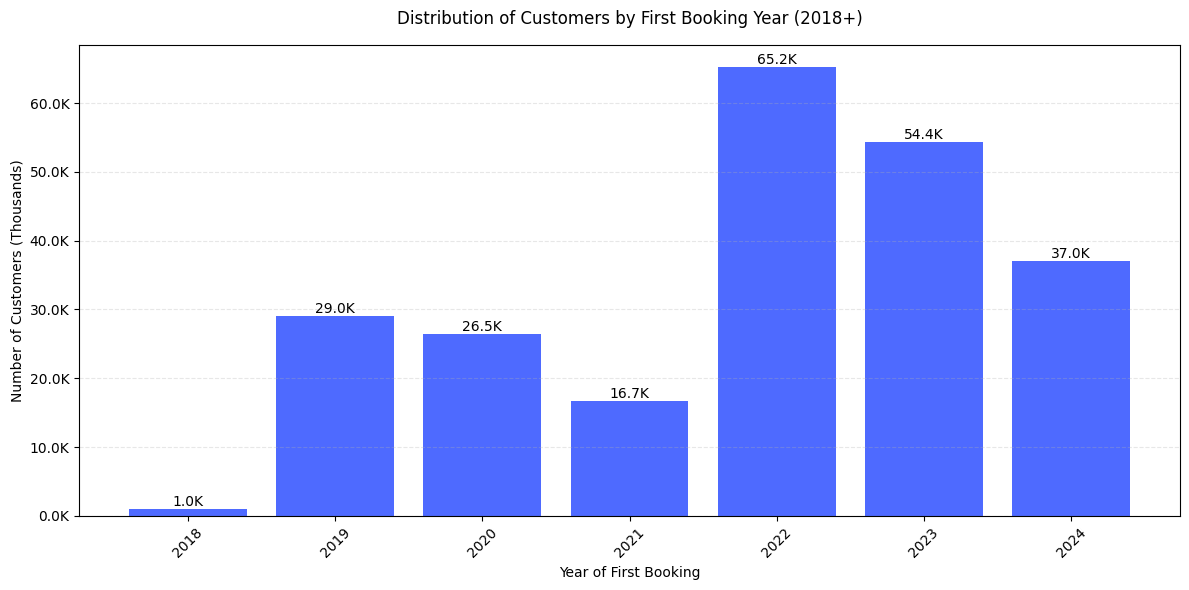


Customer Distribution Summary (2018+):
------------------------------
2018.0: 1.0K customers (0.4%)
2019.0: 29.0K customers (12.6%)
2020.0: 26.5K customers (11.5%)
2021.0: 16.7K customers (7.3%)
2022.0: 65.2K customers (28.4%)
2023.0: 54.4K customers (23.7%)
2024.0: 37.0K customers (16.1%)


In [41]:
import matplotlib.pyplot as plt

# Create a bar chart showing customer distribution by year
plt.figure(figsize=(12, 6))

# Count customers by FirstBookingDate and ensure proper year extraction
customer_counts = merged_df['FirstKnownBookingDate'].dt.year.value_counts().sort_index()

# Filter for years 2018 and beyond
customer_counts = customer_counts[customer_counts.index >= 2018]

# Create bar plot with better formatting
plt.bar(customer_counts.index, customer_counts.values, color=blue, alpha=0.7)  

# Customize the plot
plt.title('Distribution of Customers by First Booking Year (2018+)', fontsize=12, pad=15)
plt.xlabel('Year of First Booking', fontsize=10)
plt.ylabel('Number of Customers (Thousands)', fontsize=10)  # Updated y-label

# Add value labels on top of each bar (in thousands)
for i, v in enumerate(customer_counts.values):
    plt.text(customer_counts.index[i], v, f'{v/1000:.1f}K', 
             ha='center', va='bottom')

# Format x-axis ticks
plt.xticks(customer_counts.index, rotation=45)

# Format y-axis ticks to show thousands
plt.gca().yaxis.set_major_formatter(lambda x, p: f'{x/1000:.1f}K')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

# Print summary statistics
print("\nCustomer Distribution Summary (2018+):")
print("-" * 30)
for year in customer_counts.index:
    pct = (customer_counts[year] / customer_counts.sum()) * 100
    print(f"{year}: {customer_counts[year]/1000:.1f}K customers ({pct:.1f}%)")

#### Celeste's Query July 30 2025

In [ ]:
# Find client ID 4299172
client_4299172 = merged_df[merged_df['ClientID'] == 4299172]

print(f"Found {len(client_4299172)} records for ClientID 4299172:")
print("=" * 50)

if len(client_4299172) > 0:
    # Display key information about this client including PaxNumber
    display_cols = ['ClientID', 'FirstName', 'LastName', 'EmailAddress', 
                   'FolderID', 'FolderValue', 'TotalFolderValue', 'PaxNumber',
                   'FolderConfirmationDate', 'FirstKnownBookingDate', 
                   'FolderOutletCode', 'FolderStatus']
    
    # Show only columns that exist in the dataframe
    available_cols = [col for col in display_cols if col in client_4299172.columns]
    
    print(client_4299172[available_cols])
    
    # Summary stats for this client
    print(f"\nSummary for ClientID 4299172:")
    print(f"Total Folder Value: ${client_4299172['TotalFolderValue'].sum():,.2f}")
    print(f"Number of Transactions: {len(client_4299172)}")
    print(f"Total Pax Number: {client_4299172['PaxNumber'].sum() if 'PaxNumber' in client_4299172.columns else 'PaxNumber column not found'}")
    print(f"Date Range: {client_4299172['FolderConfirmationDate'].min()} to {client_4299172['FolderConfirmationDate'].max()}")
else:
    print("No records found for ClientID 4299172")

###### END OF QUERY ####

Found 1 records for ClientID 4299172:
       ClientID FirstName LastName                    EmailAddress  FolderID  \
67830   4299172       nan    NPBHS  michael.taylor@npbhs.school.nz     32781   

       FolderValue  TotalFolderValue  PaxNumber FolderConfirmationDate  \
67830     319700.0          319700.0          2             2024-05-20   

      FirstKnownBookingDate FolderOutletCode FolderStatus  
67830            2024-05-13             PLYM     Invoiced  

Summary for ClientID 4299172:
Total Folder Value: $319,700.00
Number of Transactions: 1
Total Pax Number: 2
Date Range: 2024-05-20 00:00:00 to 2024-05-20 00:00:00


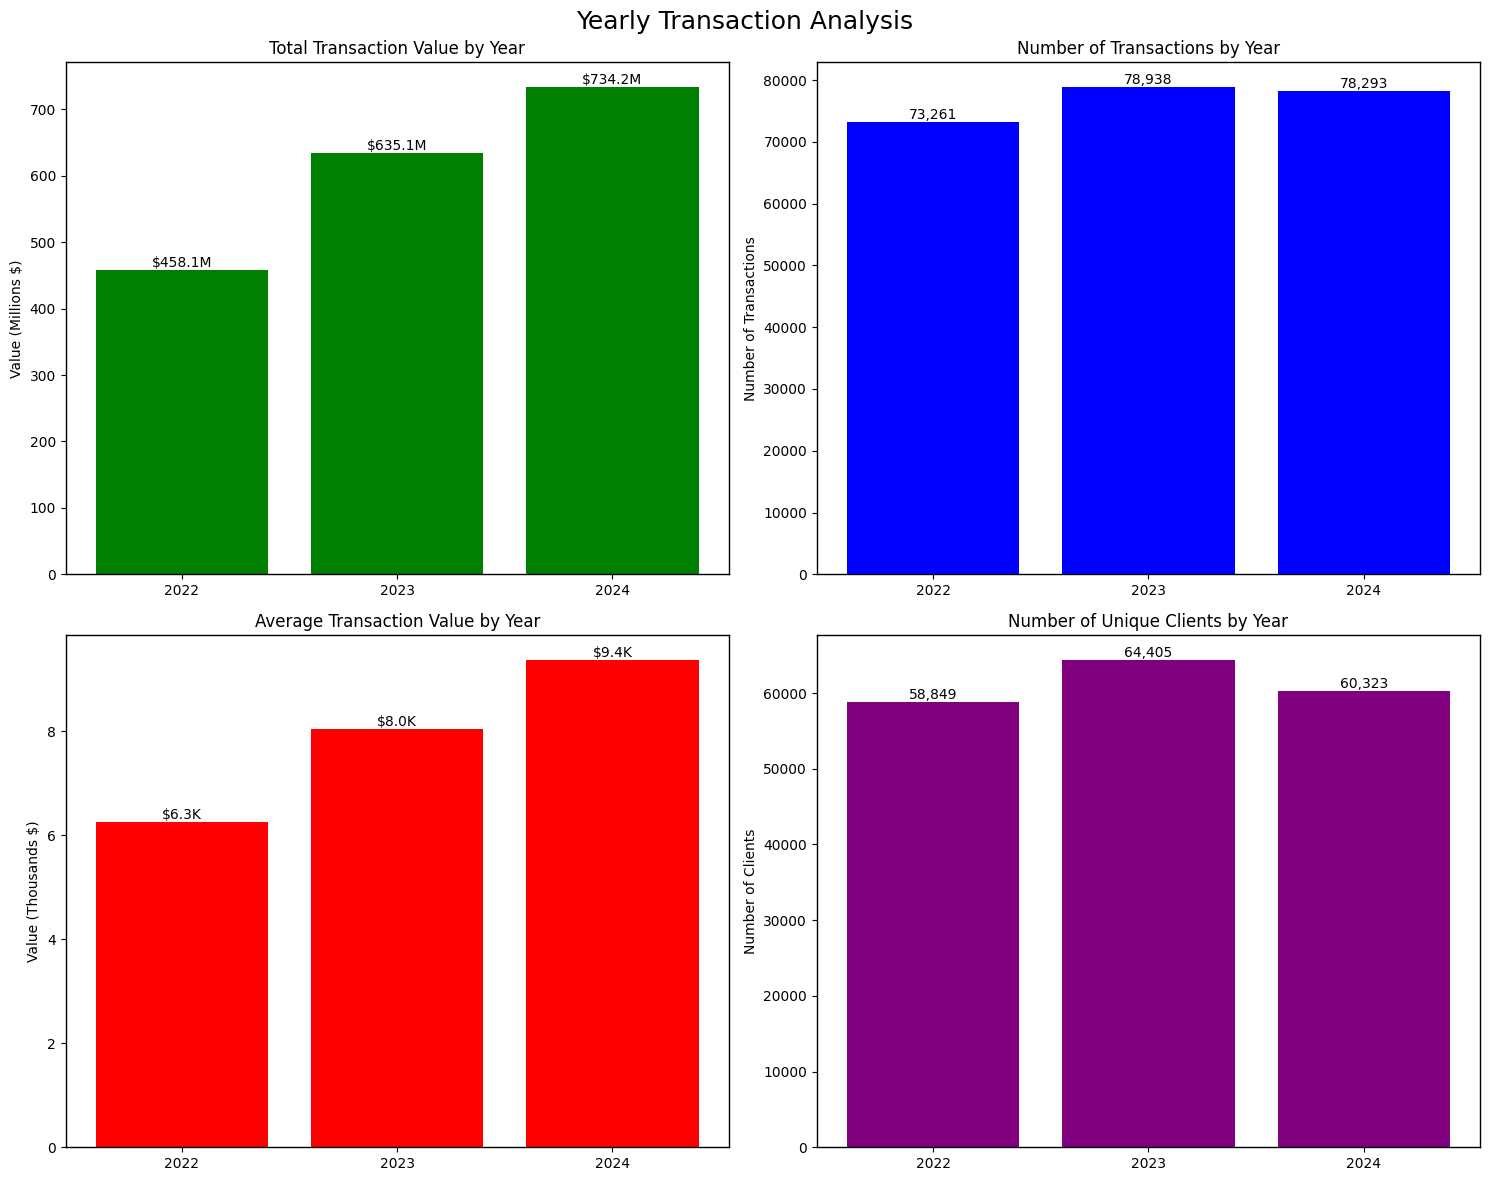


Yearly Transaction Analysis

Detailed Statistics by Year:
                         Total Value  Number of Transactions  Average Transaction Value  Unique Clients
FolderConfirmationDate                                                                                 
2022                    4.580735e+08                   73261                    6252.62           58849
2023                    6.350525e+08                   78938                    8044.95           64405
2024                    7.342428e+08                   78293                    9378.14           60323

Year-over-Year Growth:
------------------------------

Total Value:
2023: +38.6%
2024: +15.6%

Number of Transactions:
2023: +7.7%
2024: -0.8%

Average Transaction Value:
2023: +28.7%
2024: +16.6%

Unique Clients:
2023: +9.4%
2024: -6.3%


In [42]:
# Get yearly transactions, excluding 2025
yearly_transactions = merged_df[merged_df['FolderConfirmationDate'].dt.year != 2025]

 # Get yearly transactions, excluding 2025
yearly_transactions = merged_df[merged_df['FolderConfirmationDate'].dt.year != 2025]

yearly_transactions = yearly_transactions.groupby(yearly_transactions['FolderConfirmationDate'].dt.year).agg({
    'FolderValue': ['sum', 'count', 'mean'],
    'ClientID': 'nunique'
}).round(2)

# Rename columns for clarity
yearly_transactions.columns = ['Total Value', 'Number of Transactions', 'Average Transaction Value', 'Unique Clients']

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Yearly Transaction Analysis', fontsize=18, y=0.98)
fig.patch.set_facecolor('white')  # Set plain white background

# Function to apply fixed black square box around each chart
def format_ax(ax):
    ax.set_facecolor('white')  # Ensure each subplot has a white background
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)

# 1. Total Value by Year (Top Left)
values = yearly_transactions['Total Value'] / 1_000_000  # Convert to millions
ax1.bar(values.index, values.values, color='green')
ax1.set_title('Total Transaction Value by Year')
ax1.set_ylabel('Value (Millions $)')
ax1.set_xticks(values.index)
ax1.set_xticklabels([int(year) for year in values.index])
format_ax(ax1)  # Apply black box
# Add value labels
for i, v in enumerate(values):
    ax1.text(values.index[i], v, f'${v:.1f}M', ha='center', va='bottom')

# 2. Number of Transactions (Top Right)
transactions = yearly_transactions['Number of Transactions']
ax2.bar(transactions.index, transactions.values, color='blue')
ax2.set_title('Number of Transactions by Year')
ax2.set_ylabel('Number of Transactions')
ax2.set_xticks(transactions.index)
ax2.set_xticklabels([int(year) for year in transactions.index])
format_ax(ax2)  # Apply black box
# Add value labels
for i, v in enumerate(transactions):
    ax2.text(transactions.index[i], v, f'{v:,.0f}', ha='center', va='bottom')

# 3. Average Transaction Value (Bottom Left)
avg_values = yearly_transactions['Average Transaction Value'] / 1_000  # Convert to thousands
ax3.bar(avg_values.index, avg_values.values, color='red')
ax3.set_title('Average Transaction Value by Year')
ax3.set_ylabel('Value (Thousands $)')
ax3.set_xticks(avg_values.index)
ax3.set_xticklabels([int(year) for year in avg_values.index])
format_ax(ax3)  # Apply black box
# Add value labels
for i, v in enumerate(avg_values):
    ax3.text(avg_values.index[i], v, f'${v:.1f}K', ha='center', va='bottom')

# 4. Unique Clients (Bottom Right)
clients = yearly_transactions['Unique Clients']
ax4.bar(clients.index, clients.values, color='purple')
ax4.set_title('Number of Unique Clients by Year')
ax4.set_ylabel('Number of Clients')
ax4.set_xticks(clients.index)
ax4.set_xticklabels([int(year) for year in clients.index])
format_ax(ax4)  # Apply black box
# Add value labels
for i, v in enumerate(clients):
    ax4.text(clients.index[i], v, f'{v:,.0f}', ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nYearly Transaction Analysis")
print("=" * 50)
print("\nDetailed Statistics by Year:")
print(yearly_transactions.to_string())

# Calculate year-over-year growth
print("\nYear-over-Year Growth:")
print("-" * 30)
for column in yearly_transactions.columns:
    yoy_growth = yearly_transactions[column].pct_change() * 100
    print(f"\n{column}:")
    for year, growth in yoy_growth.items():
        if not np.isnan(growth):
            print(f"{year}: {growth:+.1f}%")


In [43]:
## Create domestic summary chart 
# Get yearly transactions for clients who only booked domestic NZ trips
# First get clients who booked any international trips
international_clients = merged_df[
    merged_df['Destination'] != 'New Zealand'
]['ClientID'].unique()

# Then filter for domestic-only clients and exclude 2025
yearly_transactions = merged_df[
    (merged_df['FolderConfirmationDate'].dt.year != 2025) &
    (merged_df['Destination'] == 'New Zealand') &
    (~merged_df['ClientID'].isin(international_clients))
]

# Check if any clients in yearly_transactions appear in international_clients
overlap_clients = set(yearly_transactions['ClientID']).intersection(set(international_clients))

if len(overlap_clients) > 0:
    print(f"WARNING: Found {len(overlap_clients)} clients that appear in both domestic-only and international sets")
    print("First few overlapping client IDs:", list(overlap_clients)[:5])
else:
    print("Validation passed: No overlap between domestic-only and international client sets")

# Get total number of clients in each set for context
print(f"\nTotal domestic-only clients: {len(yearly_transactions['ClientID'].unique())}")
print(f"Total international clients: {len(international_clients)}")


Validation passed: No overlap between domestic-only and international client sets

Total domestic-only clients: 23367
Total international clients: 126918


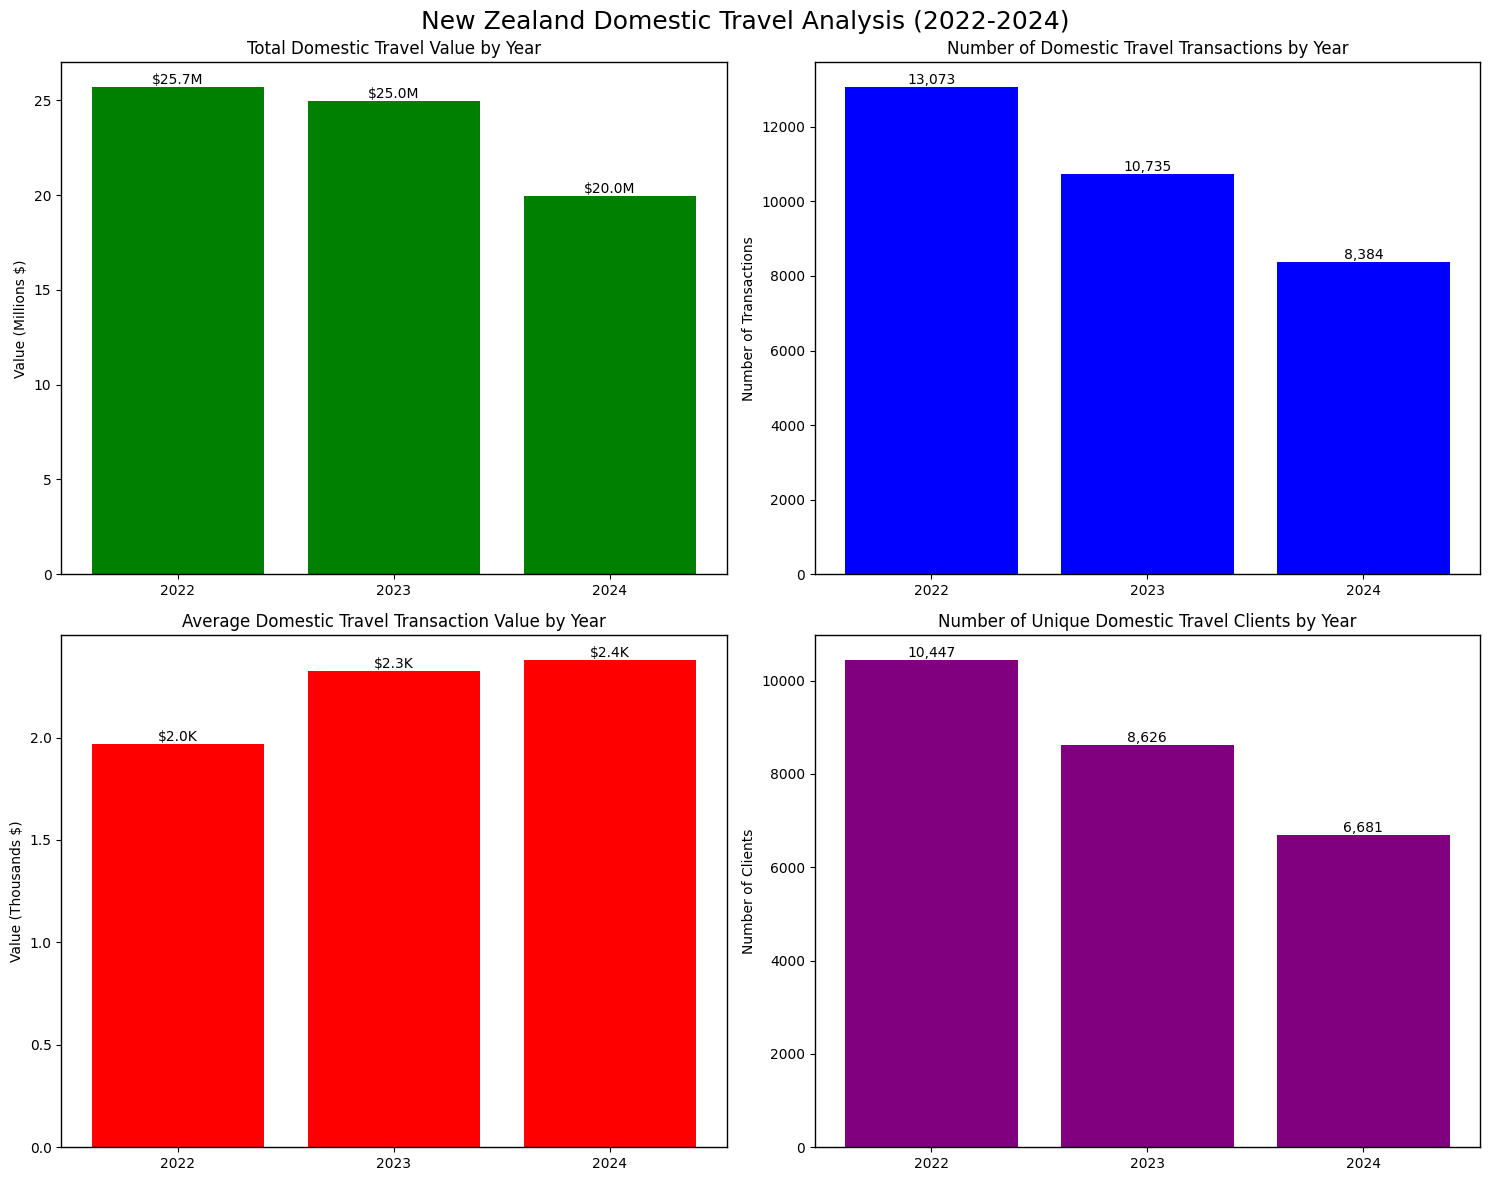


Domestic Travel Analysis (New Zealand Only)

Detailed Statistics by Year:
                        Total Value  Number of Transactions  Average Transaction Value  Unique Clients
FolderConfirmationDate                                                                                
2022                    25713682.71                   13073                    1966.93           10447
2023                    24966714.74                   10735                    2325.73            8626
2024                    19951156.47                    8384                    2379.67            6681

Year-over-Year Growth:
------------------------------

Total Value:
2023: -2.9%
2024: -20.1%

Number of Transactions:
2023: -17.9%
2024: -21.9%

Average Transaction Value:
2023: +18.2%
2024: +2.3%

Unique Clients:
2023: -17.4%
2024: -22.5%


In [44]:
## Create domestic summary chart 
# Get yearly transactions for clients who only booked domestic NZ trips
# First get clients who booked any international trips
international_clients = merged_df[
    merged_df['Destination'] != 'New Zealand'
]['ClientID'].unique()

# Then filter for domestic-only clients and exclude 2025
yearly_transactions = merged_df[
    (merged_df['Destination'] == 'New Zealand') &
    (~merged_df['ClientID'].isin(international_clients))
]

yearly_transactions = yearly_transactions.groupby(yearly_transactions['FolderConfirmationDate'].dt.year).agg({
    'FolderValue': ['sum', 'count', 'mean'],
    'ClientID': 'nunique'
}).round(2)

# Rename columns for clarity
yearly_transactions.columns = ['Total Value', 'Number of Transactions', 'Average Transaction Value', 'Unique Clients']

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('New Zealand Domestic Travel Analysis (2022-2024)', fontsize=18, y=0.98)
fig.patch.set_facecolor('white')  # Set plain white background

# Function to apply fixed black square box around each chart
def format_ax(ax):
    ax.set_facecolor('white')  # Ensure each subplot has a white background
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)

# 1. Total Value by Year (Top Left)
values = yearly_transactions['Total Value'] / 1_000_000  # Convert to millions
ax1.bar(values.index, values.values, color='green')
ax1.set_title('Total Domestic Travel Value by Year')
ax1.set_ylabel('Value (Millions $)')
ax1.set_xticks(values.index)
ax1.set_xticklabels([int(year) for year in values.index])
format_ax(ax1)  # Apply black box
# Add value labels
for i, v in enumerate(values):
    ax1.text(values.index[i], v, f'${v:.1f}M', ha='center', va='bottom')

# 2. Number of Transactions (Top Right)
transactions = yearly_transactions['Number of Transactions']
ax2.bar(transactions.index, transactions.values, color='blue')
ax2.set_title('Number of Domestic Travel Transactions by Year')
ax2.set_ylabel('Number of Transactions')
ax2.set_xticks(transactions.index)
ax2.set_xticklabels([int(year) for year in transactions.index])
format_ax(ax2)  # Apply black box
# Add value labels
for i, v in enumerate(transactions):
    ax2.text(transactions.index[i], v, f'{v:,.0f}', ha='center', va='bottom')

# 3. Average Transaction Value (Bottom Left)
avg_values = yearly_transactions['Average Transaction Value'] / 1_000  # Convert to thousands
ax3.bar(avg_values.index, avg_values.values, color='red')
ax3.set_title('Average Domestic Travel Transaction Value by Year')
ax3.set_ylabel('Value (Thousands $)')
ax3.set_xticks(avg_values.index)
ax3.set_xticklabels([int(year) for year in avg_values.index])
format_ax(ax3)  # Apply black box
# Add value labels
for i, v in enumerate(avg_values):
    ax3.text(avg_values.index[i], v, f'${v:.1f}K', ha='center', va='bottom')

# 4. Unique Clients (Bottom Right)
clients = yearly_transactions['Unique Clients']
ax4.bar(clients.index, clients.values, color='purple')
ax4.set_title('Number of Unique Domestic Travel Clients by Year')
ax4.set_ylabel('Number of Clients')
ax4.set_xticks(clients.index)
ax4.set_xticklabels([int(year) for year in clients.index])
format_ax(ax4)  # Apply black box
# Add value labels
for i, v in enumerate(clients):
    ax4.text(clients.index[i], v, f'{v:,.0f}', ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDomestic Travel Analysis (New Zealand Only)")
print("=" * 50)
print("\nDetailed Statistics by Year:")
print(yearly_transactions.to_string())

# Calculate year-over-year growth
print("\nYear-over-Year Growth:")
print("-" * 30)
for column in yearly_transactions.columns:
    yoy_growth = yearly_transactions[column].pct_change() * 100
    print(f"\n{column}:")
    for year, growth in yoy_growth.items():
        if not np.isnan(growth):
            print(f"{year}: {growth:+.1f}%")


In [45]:
# Get sets of clients who booked domestic and international trips
domestic_clients = set(merged_df[merged_df['Destination'] == 'New Zealand']['ClientID'].unique())
international_clients = set(merged_df[merged_df['Destination'] != 'New Zealand']['ClientID'].unique())

# Get clients who booked both domestic and international
both_clients = domestic_clients.intersection(international_clients)

# Get domestic-only clients by removing those who also booked international
domestic_only_clients = domestic_clients - international_clients

# Get international-only clients by removing those who also booked domestic  
international_only_clients = international_clients - domestic_clients

# Create dataframes for each category
domestic_only_df = merged_df[
    (merged_df['Destination'] == 'New Zealand') & 
    (merged_df['ClientID'].isin(domestic_only_clients))
]

international_only_df = merged_df[
    (merged_df['Destination'] != 'New Zealand') &
    (merged_df['ClientID'].isin(international_only_clients))
]

both_df = merged_df[merged_df['ClientID'].isin(both_clients)]

# Print summary statistics
print(f"Total domestic-only clients: {len(domestic_only_clients)}")
print(f"Total international-only clients: {len(international_only_clients)}")
print(f"Total clients who booked both: {len(both_clients)}")

# Validation check - clients should be in mutually exclusive groups
total_clients = len(domestic_only_clients) + len(international_only_clients) + len(both_clients)
print(f"\nTotal unique clients across all groups: {total_clients}")
print(f"Total unique clients in original data: {len(set(merged_df['ClientID']))}")


Total domestic-only clients: 23367
Total international-only clients: 119051
Total clients who booked both: 7867

Total unique clients across all groups: 150285
Total unique clients in original data: 150285


In [46]:
# Check number of unique clients
# Get number of unique clients
unique_clients = merged_df['ClientID'].nunique()
print(f"Number of unique clients: {unique_clients}")

Number of unique clients: 150285


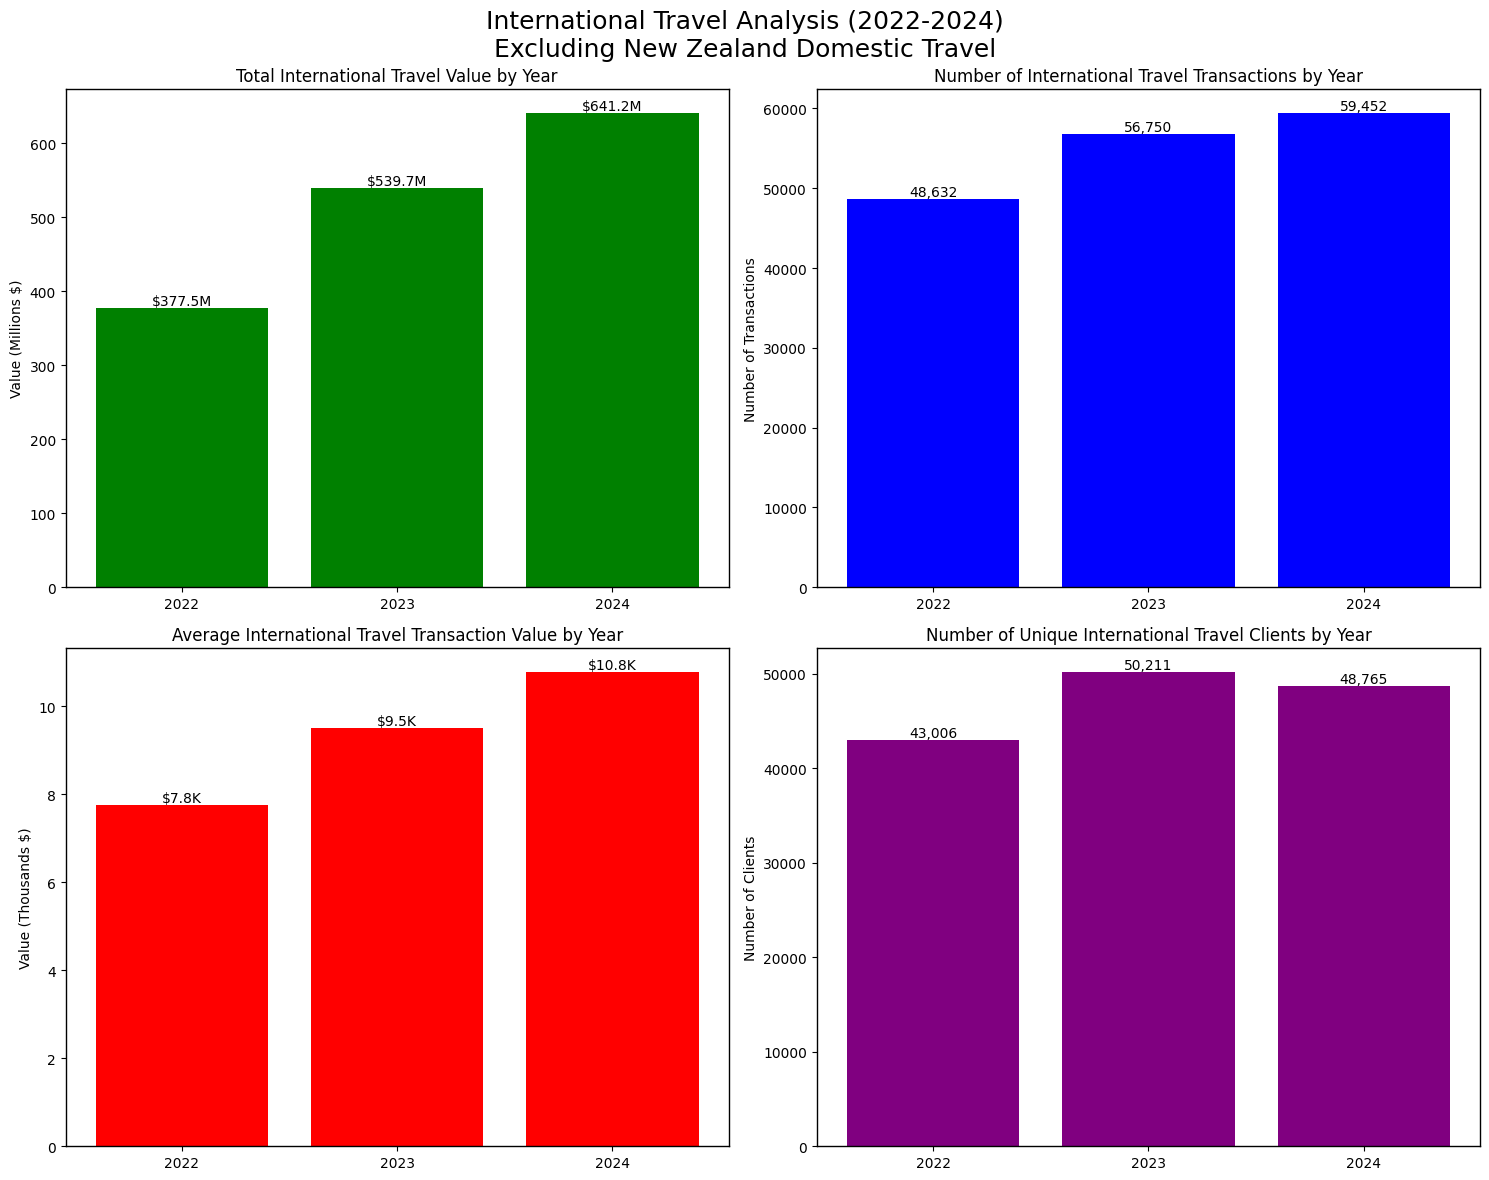


International Travel Analysis (Excluding New Zealand)

Detailed Statistics by Year:
                         Total Value  Number of Transactions  Average Transaction Value  Unique Clients
FolderConfirmationDate                                                                                 
2022                    3.775292e+08                   48632                    7762.98           43006
2023                    5.396808e+08                   56750                    9509.79           50211
2024                    6.412157e+08                   59452                   10785.43           48765

Year-over-Year Growth:
------------------------------

Total Value:
2023: +43.0%
2024: +18.8%

Number of Transactions:
2023: +16.7%
2024: +4.8%

Average Transaction Value:
2023: +22.5%
2024: +13.4%

Unique Clients:
2023: +16.8%
2024: -2.9%

Key Insights:
------------------------------
1. International travel shows strong recovery post-COVID with significant growth in total value and transact

In [47]:
## International Travel Analysis 
## Create international summary chart 
# Filter for only clients who exclusively booked international travel
international_bookings = merged_df[
    (merged_df['Destination'] != 'New Zealand') & 
    (merged_df['ClientID'].isin(international_only_clients))
].copy()

# Create yearly transactions dataframe for international-only bookings
yearly_transactions = international_bookings[
    (international_bookings['FolderConfirmationDate'].dt.year >= 2022) &
    (international_bookings['FolderConfirmationDate'].dt.year <= 2024)
]

yearly_transactions = yearly_transactions.groupby(yearly_transactions['FolderConfirmationDate'].dt.year).agg({
    'FolderValue': ['sum', 'count', 'mean'],
    'ClientID': 'nunique'
}).round(2)

# Rename columns for clarity
yearly_transactions.columns = ['Total Value', 'Number of Transactions', 'Average Transaction Value', 'Unique Clients']

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('International Travel Analysis (2022-2024)\nExcluding New Zealand Domestic Travel', fontsize=18, y=0.98)
fig.patch.set_facecolor('white')  # Set plain white background

# Function to apply fixed black square box around each chart
def format_ax(ax):
    ax.set_facecolor('white')  # Ensure each subplot has a white background
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)

# 1. Total Value by Year (Top Left)
values = yearly_transactions['Total Value'] / 1_000_000  # Convert to millions
ax1.bar(values.index, values.values, color='green')
ax1.set_title('Total International Travel Value by Year')
ax1.set_ylabel('Value (Millions $)')
ax1.set_xticks(values.index)
ax1.set_xticklabels([int(year) for year in values.index])
format_ax(ax1)  # Apply black box
# Add value labels
for i, v in enumerate(values):
    ax1.text(values.index[i], v, f'${v:.1f}M', ha='center', va='bottom')

# 2. Number of Transactions (Top Right)
transactions = yearly_transactions['Number of Transactions']
ax2.bar(transactions.index, transactions.values, color='blue')
ax2.set_title('Number of International Travel Transactions by Year')
ax2.set_ylabel('Number of Transactions')
ax2.set_xticks(transactions.index)
ax2.set_xticklabels([int(year) for year in transactions.index])
format_ax(ax2)  # Apply black box
# Add value labels
for i, v in enumerate(transactions):
    ax2.text(transactions.index[i], v, f'{v:,.0f}', ha='center', va='bottom')

# 3. Average Transaction Value (Bottom Left)
avg_values = yearly_transactions['Average Transaction Value'] / 1_000  # Convert to thousands
ax3.bar(avg_values.index, avg_values.values, color='red')
ax3.set_title('Average International Travel Transaction Value by Year')
ax3.set_ylabel('Value (Thousands $)')
ax3.set_xticks(avg_values.index)
ax3.set_xticklabels([int(year) for year in avg_values.index])
format_ax(ax3)  # Apply black box
# Add value labels
for i, v in enumerate(avg_values):
    ax3.text(avg_values.index[i], v, f'${v:.1f}K', ha='center', va='bottom')

# 4. Unique Clients (Bottom Right)
clients = yearly_transactions['Unique Clients']
ax4.bar(clients.index, clients.values, color='purple')
ax4.set_title('Number of Unique International Travel Clients by Year')
ax4.set_ylabel('Number of Clients')
ax4.set_xticks(clients.index)
ax4.set_xticklabels([int(year) for year in clients.index])
format_ax(ax4)  # Apply black box
# Add value labels
for i, v in enumerate(clients):
    ax4.text(clients.index[i], v, f'{v:,.0f}', ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nInternational Travel Analysis (Excluding New Zealand)")
print("=" * 50)
print("\nDetailed Statistics by Year:")
print(yearly_transactions.to_string())

# Calculate year-over-year growth
print("\nYear-over-Year Growth:")
print("-" * 30)
for column in yearly_transactions.columns:
    yoy_growth = yearly_transactions[column].pct_change() * 100
    print(f"\n{column}:")
    for year, growth in yoy_growth.items():
        if not np.isnan(growth):
            print(f"{year}: {growth:+.1f}%")

# Print summary insights
print("\nKey Insights:")
print("-" * 30)
print("1. International travel shows strong recovery post-COVID with significant growth in total value and transactions")
print("2. Average transaction values indicate changing travel patterns and possibly longer/more expensive trips")
print("3. The number of unique clients demonstrates rebuilding customer confidence in international travel")


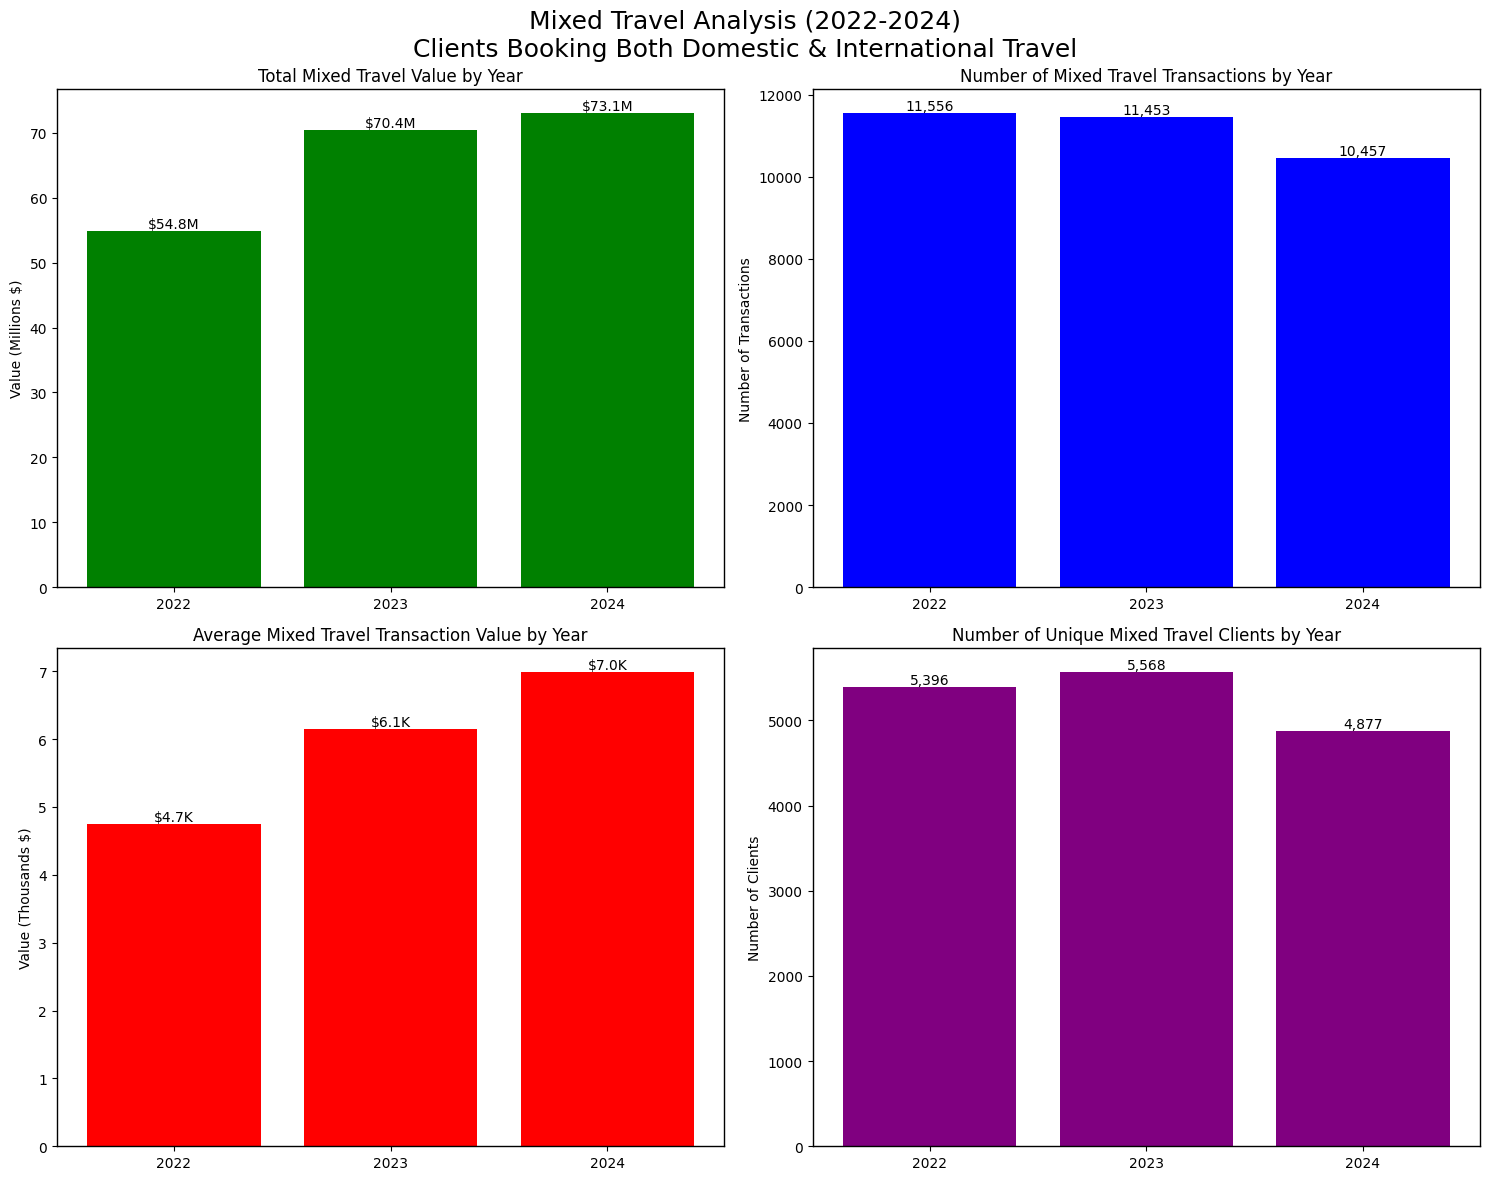


Mixed Travel Analysis (Domestic + International)

Detailed Statistics by Year:
                        Total Value  Number of Transactions  Average Transaction Value  Unique Clients
FolderConfirmationDate                                                                                
2022                    54830604.05                   11556                    4744.77            5396
2023                    70404974.70                   11453                    6147.30            5568
2024                    73076029.78                   10457                    6988.24            4877

Year-over-Year Growth:
------------------------------

Total Value:
2023: +28.4%
2024: +3.8%

Number of Transactions:
2023: -0.9%
2024: -8.7%

Average Transaction Value:
2023: +29.6%
2024: +13.7%

Unique Clients:
2023: +3.2%
2024: -12.4%

Key Insights:
------------------------------
1. Mixed travel clients show diverse travel patterns with both domestic and international bookings
2. The data reveals t

In [48]:
## Mixed Travel Analysis (Domestic + International)
## Create mixed travel summary chart 
# Filter for clients who booked both domestic and international travel
mixed_travel_clients = merged_df.groupby('ClientID').agg({
    'Destination': lambda x: (x == 'New Zealand').any() and (x != 'New Zealand').any()
})
mixed_travel_clients = mixed_travel_clients[mixed_travel_clients['Destination']].index

# Filter bookings for mixed travel clients
mixed_bookings = merged_df[merged_df['ClientID'].isin(mixed_travel_clients)].copy()

# Create yearly transactions dataframe for mixed travel bookings
yearly_transactions = mixed_bookings[
    (mixed_bookings['FolderConfirmationDate'].dt.year >= 2022) &
    (mixed_bookings['FolderConfirmationDate'].dt.year <= 2024)
]

yearly_transactions = yearly_transactions.groupby(yearly_transactions['FolderConfirmationDate'].dt.year).agg({
    'FolderValue': ['sum', 'count', 'mean'],
    'ClientID': 'nunique'
}).round(2)

# Rename columns for clarity
yearly_transactions.columns = ['Total Value', 'Number of Transactions', 'Average Transaction Value', 'Unique Clients']

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Mixed Travel Analysis (2022-2024)\nClients Booking Both Domestic & International Travel', fontsize=18, y=0.98)
fig.patch.set_facecolor('white')  # Set plain white background

# Function to apply fixed black square box around each chart
def format_ax(ax):
    ax.set_facecolor('white')  # Ensure each subplot has a white background
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)

# 1. Total Value by Year (Top Left)
values = yearly_transactions['Total Value'] / 1_000_000  # Convert to millions
ax1.bar(values.index, values.values, color='green')
ax1.set_title('Total Mixed Travel Value by Year')
ax1.set_ylabel('Value (Millions $)')
ax1.set_xticks(values.index)
ax1.set_xticklabels([int(year) for year in values.index])
format_ax(ax1)  # Apply black box
# Add value labels
for i, v in enumerate(values):
    ax1.text(values.index[i], v, f'${v:.1f}M', ha='center', va='bottom')

# 2. Number of Transactions (Top Right)
transactions = yearly_transactions['Number of Transactions']
ax2.bar(transactions.index, transactions.values, color='blue')
ax2.set_title('Number of Mixed Travel Transactions by Year')
ax2.set_ylabel('Number of Transactions')
ax2.set_xticks(transactions.index)
ax2.set_xticklabels([int(year) for year in transactions.index])
format_ax(ax2)  # Apply black box
# Add value labels
for i, v in enumerate(transactions):
    ax2.text(transactions.index[i], v, f'{v:,.0f}', ha='center', va='bottom')

# 3. Average Transaction Value (Bottom Left)
avg_values = yearly_transactions['Average Transaction Value'] / 1_000  # Convert to thousands
ax3.bar(avg_values.index, avg_values.values, color='red')
ax3.set_title('Average Mixed Travel Transaction Value by Year')
ax3.set_ylabel('Value (Thousands $)')
ax3.set_xticks(avg_values.index)
ax3.set_xticklabels([int(year) for year in avg_values.index])
format_ax(ax3)  # Apply black box
# Add value labels
for i, v in enumerate(avg_values):
    ax3.text(avg_values.index[i], v, f'${v:.1f}K', ha='center', va='bottom')

# 4. Unique Clients (Bottom Right)
clients = yearly_transactions['Unique Clients']
ax4.bar(clients.index, clients.values, color='purple')
ax4.set_title('Number of Unique Mixed Travel Clients by Year')
ax4.set_ylabel('Number of Clients')
ax4.set_xticks(clients.index)
ax4.set_xticklabels([int(year) for year in clients.index])
format_ax(ax4)  # Apply black box
# Add value labels
for i, v in enumerate(clients):
    ax4.text(clients.index[i], v, f'{v:,.0f}', ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nMixed Travel Analysis (Domestic + International)")
print("=" * 50)
print("\nDetailed Statistics by Year:")
print(yearly_transactions.to_string())

# Calculate year-over-year growth
print("\nYear-over-Year Growth:")
print("-" * 30)
for column in yearly_transactions.columns:
    yoy_growth = yearly_transactions[column].pct_change() * 100
    print(f"\n{column}:")
    for year, growth in yoy_growth.items():
        if not np.isnan(growth):
            print(f"{year}: {growth:+.1f}%")

# Print summary insights
print("\nKey Insights:")
print("-" * 30)
print("1. Mixed travel clients show diverse travel patterns with both domestic and international bookings")
print("2. The data reveals trends in how clients combine domestic and international travel")
print("3. Average transaction values reflect the mix of shorter domestic and longer international trips")

# Calculate domestic vs international transactions by year
yearly_domestic = mixed_bookings[mixed_bookings['Destination'] == 'New Zealand'].groupby(
    mixed_bookings['FolderConfirmationDate'].dt.year
).size()

yearly_international = mixed_bookings[mixed_bookings['Destination'] != 'New Zealand'].groupby(
    mixed_bookings['FolderConfirmationDate'].dt.year
).size()

print("\nTransaction Breakdown by Year:")
print("-" * 30)
for year in sorted(set(yearly_domestic.index) | set(yearly_international.index)):
    print(f"\nYear {year}:")
    print(f"Domestic Transactions: {yearly_domestic.get(year, 0):,}")
    print(f"International Transactions: {yearly_international.get(year, 0):,}")


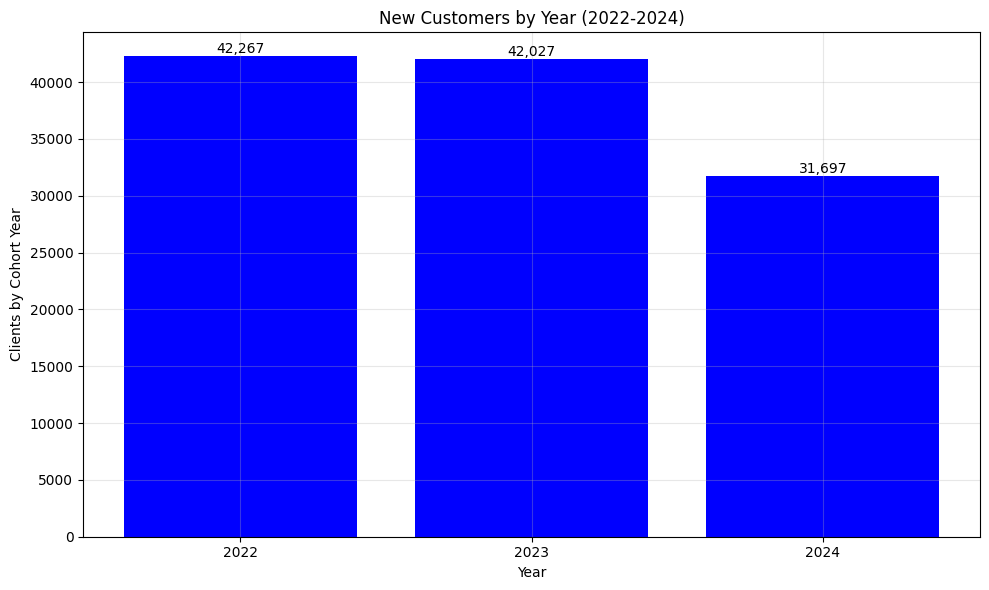


New Customer Analysis
        New Customers  First Year Value  Avg Value per Customer
2022.0          42267    272,437,859.87                6,445.64
2023.0          42027    347,129,884.23                8,259.69
2024.0          31697    334,661,716.20               10,558.15

Year-over-Year Growth in New Customers:
--------------------------------------------------
2023.0: -0.6%
2024.0: -24.6%


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#========================
# New Customer Analysis
#========================

# Convert FirstKnownBookingDate to datetime if not already
merged_df['FirstKnownBookingDate'] = pd.to_datetime(merged_df['FirstKnownBookingDate'])

# Get new customers by year (2022-2024)
new_customers = merged_df[
    merged_df['FirstKnownBookingDate'].dt.year.between(2022, 2025)
].groupby(merged_df['FirstKnownBookingDate'].dt.year)['ClientID'].nunique()

# Calculate the total value of transactions from new customers in their first year
new_customer_value = {}
for year in new_customers.index:
    # Get new customers for this year
    year_new_customers = merged_df[merged_df['FirstKnownBookingDate'].dt.year == year]['ClientID'].unique()
    
    # Get their transactions in their first year
    first_year_transactions = merged_df[
        (merged_df['ClientID'].isin(year_new_customers)) & 
        (merged_df['FolderConfirmationDate'].dt.year == year)
    ]['FolderValue'].sum()
    
    new_customer_value[year] = first_year_transactions

# Create a DataFrame with the results
new_customer_analysis = pd.DataFrame({
    'New Customers': new_customers,
    'First Year Value': new_customer_value
})

# Calculate average value per new customer
new_customer_analysis['Avg Value per Customer'] = (
    new_customer_analysis['First Year Value'] / new_customer_analysis['New Customers']
)

# Create bar chart with a white background for both the figure and axes
plt.figure(figsize=(10, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

# Define the color for the bars (if not already defined)
blue = 'blue'
bars = plt.bar(new_customers.index.astype(int), new_customers.values, color=blue)

plt.title('New Customers by Year (2022-2024)')
plt.xlabel('Year')
plt.ylabel('Clients by Cohort Year')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2., height,
        f'{int(height):,}',
        ha='center', va='bottom'
    )

plt.grid(True, alpha=0.3)
plt.xticks(new_customers.index.astype(int))
plt.tight_layout()
plt.show()

# Display the results
print("\nNew Customer Analysis")
print("=" * 50)
print(new_customer_analysis.to_string(float_format=lambda x: '{:,.2f}'.format(x)))

# Calculate year-over-year growth in new customers
print("\nYear-over-Year Growth in New Customers:")
print("-" * 50)
yoy_growth = new_customer_analysis['New Customers'].pct_change() * 100
for year, growth in yoy_growth.items():
    if not np.isnan(growth):
        print(f"{year}: {growth:+.1f}%")


In [50]:
import pandas as pd

# Convert to datetime if not already
merged_df['FirstKnownBookingDate'] = pd.to_datetime(merged_df['FirstKnownBookingDate'])

# Filter for 2022 only, then get the number of unique ClientIDs
num_clients_2022 = (
    merged_df[merged_df['FirstKnownBookingDate'].dt.year == 2022]['ClientID']
    .nunique()
)

print(f"Number of clients in 2022: {num_clients_2022}")

clients_2022 = merged_df[merged_df['FirstKnownBookingDate'].dt.year == 2022].drop_duplicates('ClientID')


Number of clients in 2022: 42267


In [51]:
# Filter the DataFrame to rows with FirstKnownBookingDate in 2022 and FolderConfirmationDate not in 2022,
# then get the number of unique ClientIDs.
num_clients_2022_confirm = merged_df[
    (merged_df['FirstKnownBookingDate'].dt.year == 2022) &
    (merged_df['FolderConfirmationDate'].dt.year == 2022)
]['ClientID'].nunique()

print(f"Number of clients in 2022 with confirmation date != 2022: {num_clients_2022_confirm}")


clients_2022_confirm_df = (
    merged_df[
        (merged_df['FirstKnownBookingDate'].dt.year == 2022) &
        (merged_df['FolderConfirmationDate'].dt.year == 2022)
    ]
    .drop_duplicates(subset='ClientID')
)

clients_2022_confirm_df.head()


Number of clients in 2022 with confirmation date != 2022: 38638


,ClientID,ProfileType,LinkedProfileIDs,HeadClientID,FirstName,LastName,EmailAddress,client_age,City,EmailFlag,...,CruiseVendor,TourVendor,HotelVendor,FolderValue,TotalFolderValue,FinalPaymentDue,FinalPaymentBalance,ArrivalAirport,FinancePayment,Year
0,1967108,Individual,NaN,-1.0,Gerard,Clarke,joe.clarke@northpower.com,0,Auckland,1,...,NaN,NaN,NaN,9836.00,9836.00,2022-07-14 00:00:00.000,0.0,BHX,NaN,2022
1,1976555,Head,3936415,1976555.0,John Clement,Harris,johnyhe@xtra.co.nz,74,Waihi,0,...,NaN,NaN,Ocean Pacific Resort,2474.52,8960.82,2022-09-08 00:00:00.000,0.0,OOL,NaN,2022
9,2013237,Head,1195306;3187033;788844,2013237.0,Alan,Berg,alancberg@hotmail.com,85,Christchurch,0,...,NaN,NaN,Noosa International Resort,7780.00,23425.00,2022-05-30 00:00:00.000,0.0,BNE,NaN,2022
14,1956750,Linked,NaN,1956748.0,Alicia Judith,Kidd,p@bilingual.co.nz,25,nan,0,...,NaN,NaN,NaN,1762.13,1762.13,2022-04-30 00:00:00.000,0.0,LAX,NaN,2022
16,2037685,Head,3672531,2037685.0,Arie,Day,Arie@allday.nz,33,LOWER HUTT,1,...,NaN,NaN,Edgewater Resort And Spa,5529.00,5529.00,2022-03-25 00:00:00.000,0.0,RAR,NaN,2022


In [52]:
# First, ensure both dataframes have unique ClientIDs (if not already deduplicated)
clients_2022_unique = clients_2022.drop_duplicates(subset='ClientID').copy()
clients_2022_confirm_df_unique = clients_2022_confirm_df.drop_duplicates(subset='ClientID').copy()

# Now filter out any rows in clients_2022 whose ClientID appears in clients_2022_confirm_df
diff_df = clients_2022_unique[
    ~clients_2022_unique['ClientID'].isin(clients_2022_confirm_df_unique['ClientID'])
].copy()

diff_df[['ClientID','FirstKnownBookingDate', 'FolderConfirmationDate','FolderValue']].head(20)


,ClientID,FirstKnownBookingDate,FolderConfirmationDate,FolderValue
91,1613781,2022-06-16,2024-10-19,21706.00
111,1039357,2022-08-30,2024-09-26,16620.00
160,1802233,2022-02-11,2024-11-19,8038.00
212,1578518,2022-03-16,2023-08-09,5575.00
334,3672580,2022-03-23,2024-04-23,6748.00
337,3727126,2022-06-08,2023-06-14,3188.75
342,3834895,2022-10-18,2023-09-21,300.00
478,610680,2022-12-03,2023-10-31,20211.00
507,1877155,2022-10-29,2023-02-03,4092.94
509,3744325,2022-06-28,2023-12-11,3835.00


In [53]:
#========================
# Cohort Analysis
#========================

# Convert dates to datetime if not already
merged_df['FolderConfirmationDate'] = pd.to_datetime(merged_df['FolderConfirmationDate'])
merged_df['FirstBookingDate'] = pd.to_datetime(merged_df['FirstKnownBookingDate'])

# Helper function to get transactions for a year
def get_year_transactions(client_ids, year):
    return merged_df[
        (merged_df['ClientID'].isin(client_ids)) & 
        (merged_df['FolderConfirmationDate'].dt.year == year)
       ]

# Create cohorts and analyze transactions
cohort_2022 = merged_df[merged_df['FirstBookingDate'].dt.year == 2022]['ClientID'].unique()
cohort_2023 = merged_df[merged_df['FirstBookingDate'].dt.year == 2023]['ClientID'].unique()

# Get transactions for each cohort and year
txn_2022_in_2022 = get_year_transactions(cohort_2022, 2022)
txn_2022_in_2023 = get_year_transactions(cohort_2022, 2023)
txn_2022_in_2024 = get_year_transactions(cohort_2022, 2024)
txn_2023_in_2023 = get_year_transactions(cohort_2023, 2023)
txn_2023_in_2024 = get_year_transactions(cohort_2023, 2024)
txn_2024 = merged_df[merged_df['FirstBookingDate'].dt.year == 2024]

# Calculate client segments
clients_2022_all = set(txn_2022_in_2022['ClientID']) & set(txn_2022_in_2023['ClientID']) & set(txn_2022_in_2024['ClientID'])
clients_2022_23 = set(txn_2022_in_2022['ClientID']) & set(txn_2022_in_2023['ClientID']) - set(txn_2022_in_2024['ClientID'])
clients_2022_24 = set(txn_2022_in_2022['ClientID']) & set(txn_2022_in_2024['ClientID']) - set(txn_2022_in_2023['ClientID'])
clients_2022_only = set(txn_2022_in_2022['ClientID']) - set(txn_2022_in_2023['ClientID']) - set(txn_2022_in_2024['ClientID'])
clients_2023_only = set(txn_2023_in_2023['ClientID']) - set(txn_2023_in_2024['ClientID'])
loyal_clients_2023 = set(txn_2023_in_2023['ClientID']) & set(txn_2023_in_2024['ClientID'])

# Calculate retention rates
retention_rate_2022 = (len(clients_2022_all) / len(cohort_2022)) * 100
retention_rate_2023 = (len(loyal_clients_2023) / len(cohort_2023)) * 100

# Create a pandas DataFrame for better display
data = {
    'Cohort/Metric': [
        '2022 COHORT', 
        '  Total Clients',
        '  Active All Years', 
        '  Active 2022-2023 Only',
        '  Active 2022,2024 Only',
        '  Active 2022 Only',
        '  2022 Transaction Value',
        '  2023 Transaction Value', 
        '  2024 Transaction Value',
        '  3-Year Retention Rate',
        '2023 COHORT',
        '  Total Clients',
        '  Active Both Years',
        '  Active 2023 Only',
        '  2023 Transaction Value',
        '  2024 Transaction Value',
        '  2-Year Retention Rate',
        '2024 OVERALL',
        '  Total Clients',
        '  Total Transaction Value'
    ],
    'Value': [
        '',
        f"{len(cohort_2022):,}",
        f"{len(clients_2022_all):,}",
        f"{len(clients_2022_23):,}",
        f"{len(clients_2022_24):,}",
        f"{len(clients_2022_only):,}",
        f"${txn_2022_in_2022['FolderValue'].sum():,.2f}",
        f"${txn_2022_in_2023['FolderValue'].sum():,.2f}",
        f"${txn_2022_in_2024['FolderValue'].sum():,.2f}",
        f"{retention_rate_2022:.1f}%",
        '',
        f"{len(cohort_2023):,}",
        f"{len(loyal_clients_2023):,}",
        f"{len(clients_2023_only):,}",
        f"${txn_2023_in_2023['FolderValue'].sum():,.2f}",
        f"${txn_2023_in_2024['FolderValue'].sum():,.2f}",
        f"{retention_rate_2023:.1f}%",
        '',
        f"{len(txn_2024['ClientID'].unique()):,}",
        f"${txn_2024['FolderValue'].sum():,.2f}"
    ],
    'Notes': [
        '',
        'Initial cohort',
        '2022-2024',
        'Dropped in 2024',
        'Skipped 2023',
        'Only active in 2022',
        '',
        '',
        '',
        '',
        '',
        'Initial cohort',
        '2023-2024',
        'Only active in 2023',
        '',
        '',
        '',
        '',
        'All clients',
        ''
    ]
}

# Create DataFrame and display
df = pd.DataFrame(data)
display(df.style.set_properties(**{
    'text-align': 'left',
    'white-space': 'pre-wrap'
}).hide(axis='index'))

Cohort/Metric,Value,Notes
2022 COHORT,,
Total Clients,"42,267",Initial cohort
Active All Years,"2,320",2022-2024
Active 2022-2023 Only,"4,158",Dropped in 2024
"Active 2022,2024 Only","3,146",Skipped 2023
Active 2022 Only,"29,014",Only active in 2022
2022 Transaction Value,"$272,437,859.87",
2023 Transaction Value,"$87,941,255.35",
2024 Transaction Value,"$97,391,393.19",
3-Year Retention Rate,5.5%,


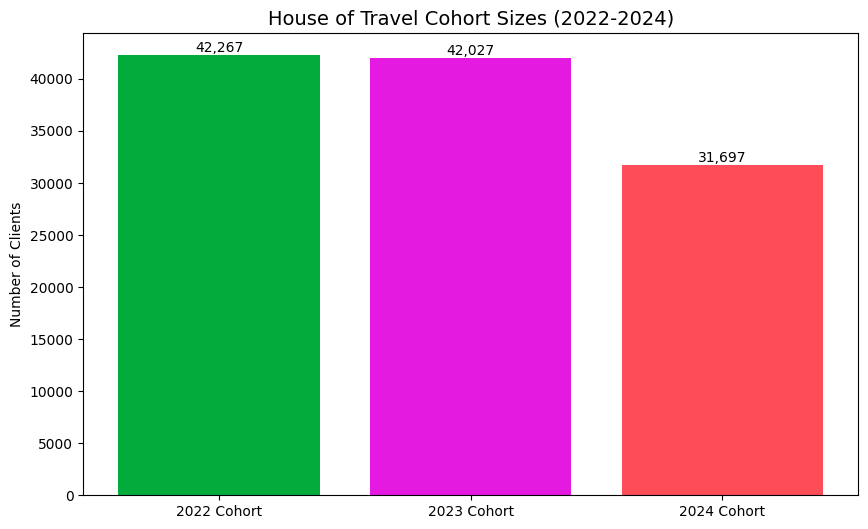


Summary Statistics:
--------------------------------------------------
Total Clients Analyzed: 115,991
Total Transaction Value: $899,273,056.65


<Figure size 1000x600 with 0 Axes>

In [54]:
#========================
# Cohort Analysis
#========================

import matplotlib.pyplot as plt
import numpy as np

# 1. Cohort Size Plot
# -----------------------------
plt.figure(figsize=(10, 6), facecolor='white')
cohort_sizes = {
    '2022 Cohort': len(cohort_2022),
    '2023 Cohort': len(cohort_2023), 
    '2024 Cohort': len(txn_2024['ClientID'].unique())
}

#plt.bar(cohort_sizes.keys(), cohort_sizes.values(), color=[green '#2ecc71', '#3498db', '#e74c3c'])
plt.bar(cohort_sizes.keys(), cohort_sizes.values(), color=[green, magenta, red])

plt.title('House of Travel Cohort Sizes (2022-2024)', fontsize=14)
plt.ylabel('Number of Clients')
# Add value labels on bars
for i, v in enumerate(cohort_sizes.values()):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')
plt.show()

# 2. Retention Rates Plot
# ---------------------------------
# plt.figure(figsize=(10, 6))
# retention_rates = {
#     '2022 Cohort\n(3-year)': retention_rate_2022,
#     '2023 Cohort\n(2-year)': retention_rate_2023
# }

# plt.bar(retention_rates.keys(), retention_rates.values(), color=['#2ecc71', '#3498db'])
# plt.title('House of Travel Retention Rates (2022-2024)', fontsize=14)
# plt.ylabel('Retention Rate (%)')
# plt.ylim(0, 100)  # Set y-axis from 0 to 100%
# # Add value labels on bars
# for i, v in enumerate(retention_rates.values()):
#     plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')
# plt.show()

# 3. Transaction Values Over Time
# ------------------------------------------
plt.figure(figsize=(10, 6))
years = ['2022', '2023', '2024']
cohort_2022_values = [
    txn_2022_in_2022['FolderValue'].sum() / 1_000_000,
    txn_2022_in_2023['FolderValue'].sum() / 1_000_000,
    txn_2022_in_2024['FolderValue'].sum() / 1_000_000
]
cohort_2023_values = [
    0,
    txn_2023_in_2023['FolderValue'].sum() / 1_000_000,
    txn_2023_in_2024['FolderValue'].sum() / 1_000_000
]


# Print summary statistics
print("\nSummary Statistics:")
print("-" * 50)
print(f"Total Clients Analyzed: {len(cohort_2022) + len(cohort_2023) + len(txn_2024['ClientID'].unique()):,}")
print(f"Total Transaction Value: ${(txn_2022_in_2022['FolderValue'].sum() + txn_2022_in_2023['FolderValue'].sum() + txn_2022_in_2024['FolderValue'].sum() + txn_2023_in_2023['FolderValue'].sum() + txn_2023_in_2024['FolderValue'].sum()):,.2f}")

C:\Users\DavidAirehrourTogeth\AppData\Local\Temp\ipykernel_28912\1937566030.py:50: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


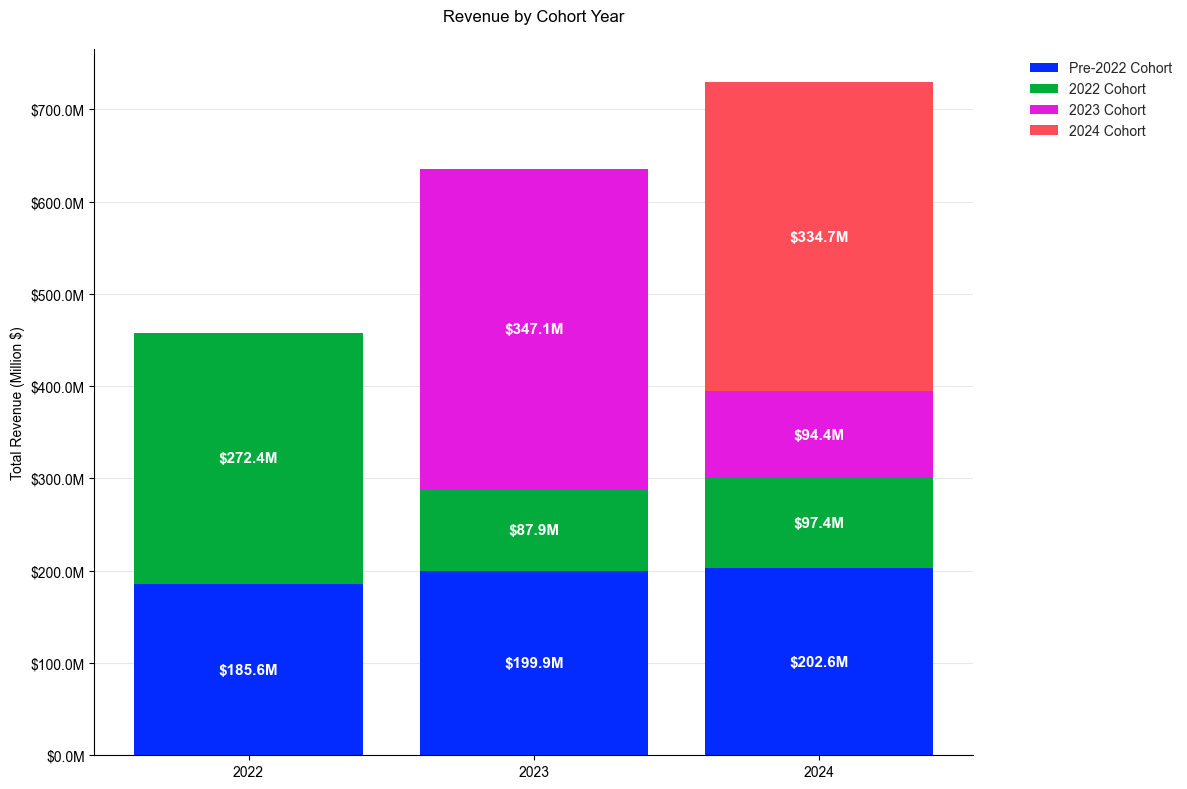

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Define colors for cohorts
cohort_colors = {
    'pre_2022': '#032BFF',  # Blue
    '2022': '#03AB3D',      # Green  
    '2023': '#E51AE0',     # Teal
    '2024': '#FC4D59'       # Red
}


# Define the years for x-axis
years = ['2022', '2023', '2024']

# Pre-2022 cohort (FirstKnownBookingDate < 2022)
pre_2022_mask = merged_df['FirstKnownBookingDate'].dt.year < 2022
values_pre_2022 = [
    merged_df[pre_2022_mask & (merged_df['FolderConfirmationDate'].dt.year == 2022)]['FolderValue'].sum() / 1_000_000,
    merged_df[pre_2022_mask & (merged_df['FolderConfirmationDate'].dt.year == 2023)]['FolderValue'].sum() / 1_000_000,
    merged_df[pre_2022_mask & (merged_df['FolderConfirmationDate'].dt.year == 2024)]['FolderValue'].sum() / 1_000_000
]

# 2022 cohort
cohort_2022_mask = merged_df['FirstKnownBookingDate'].dt.year == 2022
values_2022 = [
    merged_df[cohort_2022_mask & (merged_df['FolderConfirmationDate'].dt.year == 2022)]['FolderValue'].sum() / 1_000_000,
    merged_df[cohort_2022_mask & (merged_df['FolderConfirmationDate'].dt.year == 2023)]['FolderValue'].sum() / 1_000_000,
    merged_df[cohort_2022_mask & (merged_df['FolderConfirmationDate'].dt.year == 2024)]['FolderValue'].sum() / 1_000_000
]

# 2023 cohort
cohort_2023_mask = merged_df['FirstKnownBookingDate'].dt.year == 2023
values_2023 = [
    0,  # No 2022 value
    merged_df[cohort_2023_mask & (merged_df['FolderConfirmationDate'].dt.year == 2023)]['FolderValue'].sum() / 1_000_000,
    merged_df[cohort_2023_mask & (merged_df['FolderConfirmationDate'].dt.year == 2024)]['FolderValue'].sum() / 1_000_000
]

# 2024 cohort
cohort_2024_mask = merged_df['FirstKnownBookingDate'].dt.year == 2024
values_2024 = [
    0,  # No 2022 value
    0,  # No 2023 value
    merged_df[cohort_2024_mask & (merged_df['FolderConfirmationDate'].dt.year == 2024)]['FolderValue'].sum() / 1_000_000
]

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
plt.style.use('seaborn')

# Create bars
bars0 = ax.bar(years, values_pre_2022, label='Pre-2022 Cohort', color=cohort_colors['pre_2022'])
bars1 = ax.bar(years, values_2022, bottom=values_pre_2022, label='2022 Cohort', color=cohort_colors['2022'])
bars2 = ax.bar(years, values_2023, 
               bottom=np.array(values_pre_2022) + np.array(values_2022), 
               label='2023 Cohort', color=cohort_colors['2023'])
bars3 = ax.bar(years, values_2024, 
               bottom=np.array(values_pre_2022) + np.array(values_2022) + np.array(values_2023), 
               label='2024 Cohort', color=cohort_colors['2024'])

# Function to add value labels
def add_value_labels(bars, values, bottom=None):
    for i, (bar, value) in enumerate(zip(bars, values)):
        if value > 0:  # Only show non-zero values
            height = bar.get_height()
            y_pos = height/2
            if bottom is not None:
                y_pos += bottom[i]
            ax.text(bar.get_x() + bar.get_width()/2., y_pos,
                   f'${value:.1f}M',
                   ha='center', va='center',
                   color='white',
                   fontweight='bold',
                   fontsize=11)

# Add value labels
add_value_labels(bars0, values_pre_2022)
add_value_labels(bars1, values_2022, np.array(values_pre_2022))
add_value_labels(bars2, values_2023, np.array(values_pre_2022) + np.array(values_2022))
add_value_labels(bars3, values_2024, np.array(values_pre_2022) + np.array(values_2022) + np.array(values_2023))

# Customize the chart
ax.set_title('Revenue by Cohort Year', pad=20)
ax.set_ylabel('Total Revenue (Million $)')

# Format y-axis to show millions
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:.1f}M'))

# Move legend outside to the right
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add light gridlines
ax.grid(True, axis='y', alpha=0.3)
ax.set_axisbelow(True)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

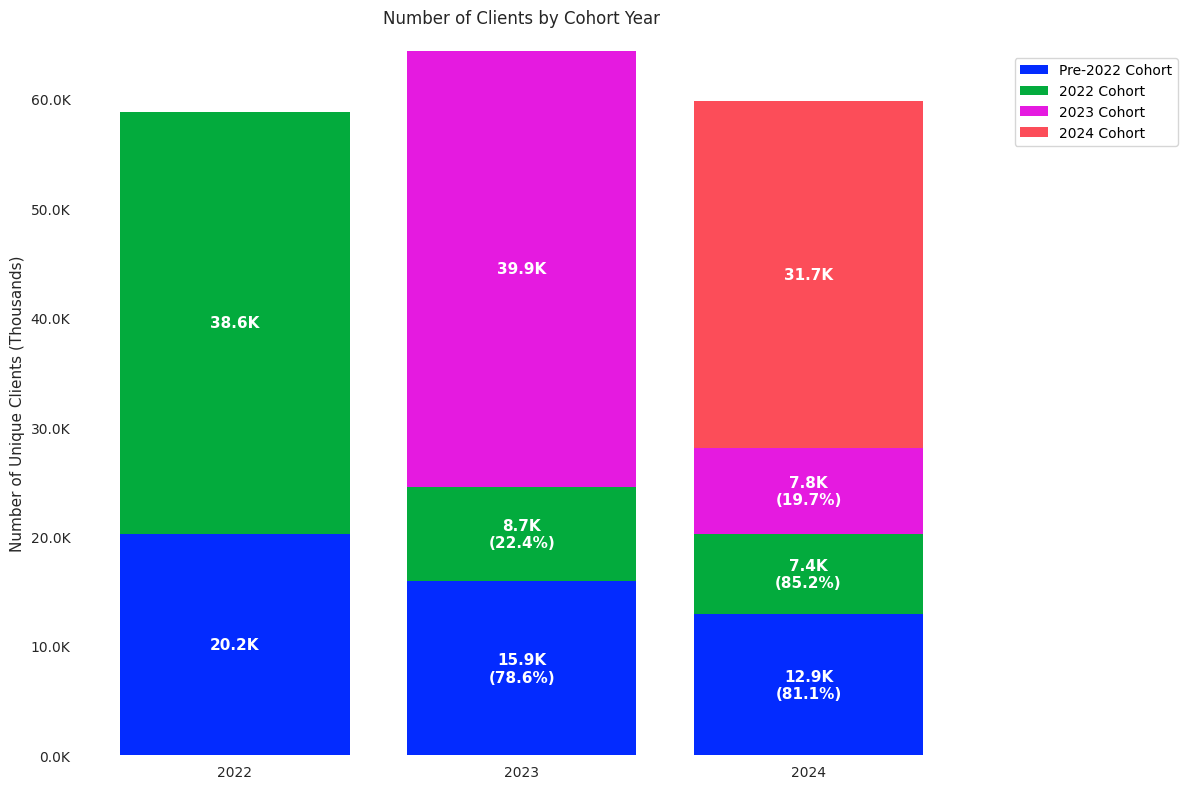


Number of Unique Clients by Cohort and Year:

Year 2022:
Pre-2022 Cohort: 20.2K
2022 Cohort: 38.6K
2023 Cohort: 0.0K
2024 Cohort: 0.0K

Year 2023:
Pre-2022 Cohort: 15.9K
Retention from previous year: 78.6%
2022 Cohort: 8.7K
Retention from previous year: 22.4%
2023 Cohort: 39.9K
2024 Cohort: 0.0K

Year 2024:
Pre-2022 Cohort: 12.9K
Retention from previous year: 81.1%
2022 Cohort: 7.4K
Retention from previous year: 85.2%
2023 Cohort: 7.8K
Retention from previous year: 19.7%
2024 Cohort: 31.7K

Number of clients from pre-2022 cohorts active in 2024:
Clients from 2018 cohort: 166
Clients from 2019 cohort: 5187
Clients from 2020 cohort: 4663
Clients from 2021 cohort: 2814


In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Define the years for x-axis
years = ['2022', '2023', '2024']

# Pre-2022 cohort (FirstKnownBookingDate < 2022)
pre_2022_mask = merged_df['FirstKnownBookingDate'].dt.year < 2022
values_pre_2022 = [
    merged_df[pre_2022_mask & (merged_df['FolderConfirmationDate'].dt.year == 2022)]['ClientID'].nunique() / 1000,
    merged_df[pre_2022_mask & (merged_df['FolderConfirmationDate'].dt.year == 2023)]['ClientID'].nunique() / 1000,
    merged_df[pre_2022_mask & (merged_df['FolderConfirmationDate'].dt.year == 2024)]['ClientID'].nunique() / 1000
]

# 2022 cohort
cohort_2022_mask = merged_df['FirstKnownBookingDate'].dt.year == 2022
values_2022 = [
    merged_df[cohort_2022_mask & (merged_df['FolderConfirmationDate'].dt.year == 2022)]['ClientID'].nunique() / 1000,
    merged_df[cohort_2022_mask & (merged_df['FolderConfirmationDate'].dt.year == 2023)]['ClientID'].nunique() / 1000,
    merged_df[cohort_2022_mask & (merged_df['FolderConfirmationDate'].dt.year == 2024)]['ClientID'].nunique() / 1000
]

# 2023 cohort
cohort_2023_mask = merged_df['FirstKnownBookingDate'].dt.year == 2023
values_2023 = [
    0,  # No 2022 value
    merged_df[cohort_2023_mask & (merged_df['FolderConfirmationDate'].dt.year == 2023)]['ClientID'].nunique() / 1000,
    merged_df[cohort_2023_mask & (merged_df['FolderConfirmationDate'].dt.year == 2024)]['ClientID'].nunique() / 1000
]

# 2024 cohort
cohort_2024_mask = merged_df['FirstKnownBookingDate'].dt.year == 2024
values_2024 = [
    0,  # No 2022 value
    0,  # No 2023 value
    merged_df[cohort_2024_mask & (merged_df['FolderConfirmationDate'].dt.year == 2024)]['ClientID'].nunique() / 1000
]

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
plt.style.use('default')  # Use default style instead of seaborn

# Set white background
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Create bars
bars0 = ax.bar(years, values_pre_2022, label='Pre-2022 Cohort', color=cohort_colors['pre_2022'])
bars1 = ax.bar(years, values_2022, bottom=values_pre_2022, label='2022 Cohort', color=cohort_colors['2022'])
bars2 = ax.bar(years, values_2023, 
               bottom=np.array(values_pre_2022) + np.array(values_2022), 
               label='2023 Cohort', color=cohort_colors['2023'])
bars3 = ax.bar(years, values_2024, 
               bottom=np.array(values_pre_2022) + np.array(values_2022) + np.array(values_2023), 
               label='2024 Cohort', color=cohort_colors['2024'])

# Function to add value labels with retention percentage
def add_value_labels(bars, values, bottom=None, prev_year_values=None):
    for i, (bar, value) in enumerate(zip(bars, values)):
        if value > 0:  # Only show non-zero values
            height = bar.get_height()
            y_pos = height/2
            if bottom is not None:
                y_pos += bottom[i]
                
            # Calculate retention percentage if previous year values exist
            if prev_year_values is not None and i > 0 and prev_year_values[i-1] > 0:
                retention_pct = (value / prev_year_values[i-1]) * 100
                label = f'{value:.1f}K\n({retention_pct:.1f}%)'
            else:
                label = f'{value:.1f}K'
                
            ax.text(bar.get_x() + bar.get_width()/2., y_pos,
                   label,
                   ha='center', va='center',
                   color='white',
                   fontweight='bold',
                   fontsize=11)

# Add value labels with retention percentages
add_value_labels(bars0, values_pre_2022, prev_year_values=values_pre_2022)
add_value_labels(bars1, values_2022, np.array(values_pre_2022), prev_year_values=values_2022)
add_value_labels(bars2, values_2023, np.array(values_pre_2022) + np.array(values_2022), prev_year_values=values_2023)
add_value_labels(bars3, values_2024, np.array(values_pre_2022) + np.array(values_2022) + np.array(values_2023), prev_year_values=values_2024)

# Customize the chart
ax.set_title('Number of Clients by Cohort Year', pad=20)
ax.set_ylabel('Number of Unique Clients (Thousands)')

# Format y-axis to show thousands with K
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}K'))

# Move legend outside to the right
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add light gridlines
ax.grid(True, axis='y', alpha=0.3)
ax.set_axisbelow(True)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

# Print the values for verification
print("\nNumber of Unique Clients by Cohort and Year:")
for i, year in enumerate(years):
    print(f"\nYear {year}:")
    print(f"Pre-2022 Cohort: {values_pre_2022[i]:.1f}K")
    if i > 0 and values_pre_2022[i-1] > 0:
        retention = (values_pre_2022[i] / values_pre_2022[i-1]) * 100
        print(f"Retention from previous year: {retention:.1f}%")
    
    print(f"2022 Cohort: {values_2022[i]:.1f}K")
    if i > 0 and values_2022[i-1] > 0:
        retention = (values_2022[i] / values_2022[i-1]) * 100
        print(f"Retention from previous year: {retention:.1f}%")
        
    print(f"2023 Cohort: {values_2023[i]:.1f}K")
    if i > 0 and values_2023[i-1] > 0:
        retention = (values_2023[i] / values_2023[i-1]) * 100
        print(f"Retention from previous year: {retention:.1f}%")
        
    print(f"2024 Cohort: {values_2024[i]:.1f}K")
    if i > 0 and values_2024[i-1] > 0:
        retention = (values_2024[i] / values_2024[i-1]) * 100
        print(f"Retention from previous year: {retention:.1f}%")

# Get counts for each cohort year active in 2024
print("\nNumber of clients from pre-2022 cohorts active in 2024:")

for year in [2018, 2019, 2020, 2021]:
    mask_year_in_2024 = (
        (merged_df['FirstKnownBookingDate'].dt.year == year) & 
        (merged_df['FolderConfirmationDate'].dt.year == 2024)
    )
    clients_year_in_2024 = merged_df[mask_year_in_2024]['ClientID'].nunique()
    print(f"Clients from {year} cohort: {clients_year_in_2024}")

Data Preprocessing and Feature Engineering for Customer Analysis

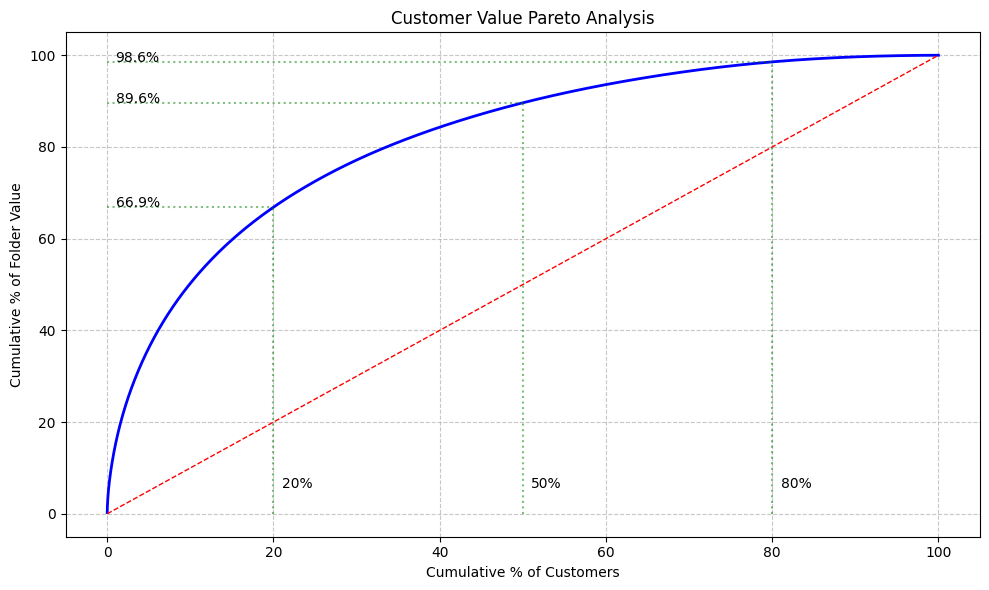


Customer Value Analysis
Total Customers: 150,285
Total Value: $1,827,368,866.87

Value Thresholds:
Top 10%: $27,230.60
Top 10-20%: $15,274.10
Middle 30%: $5,574.00
Bottom 50%: $0.01

Top Customer Analysis:
Top 1% of customers (>105,167.80$) contribute: $277,651,299.10 (15.2%)
Top 5% of customers (>44,127.33$) contribute: $660,976,524.08 (36.2%)
Top 10% of customers (>27,230.60$) contribute: $918,363,190.13 (50.3%)
Top 20% of customers (>15,274.10$) contribute: $1,221,799,147.45 (66.9%)


In [57]:
# ================================
# 3. Value-Based Customer Segmentation Analysis
# ================================
# Instead of equal-sized deciles, we'll create a Pareto curve using FolderValue 

import numpy as np
import matplotlib.pyplot as plt

# 1. Aggregate client values
client_values = merged_df.groupby('ClientID')['FolderValue'].sum().sort_values(ascending=False)

# 2. Calculate cumulative metrics
total_value = client_values.sum()
total_clients = len(client_values)

cumulative_value = client_values.cumsum()
cumulative_value_pct = (cumulative_value / total_value) * 100

# Create figure with Pareto curve
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, 100, len(client_values)), cumulative_value_pct.values, 'b-', linewidth=2)
plt.plot([0, 100], [0, 100], 'r--', linewidth=1)  # diagonal line

# Add reference points
pareto_points = [20, 50, 80]
for point in pareto_points:
    idx = int(point * len(cumulative_value_pct) / 100)
    value_at_point = cumulative_value_pct.iloc[idx]
    
    plt.plot([point, point], [0, value_at_point], 'g:', alpha=0.5)
    plt.plot([0, point], [value_at_point, value_at_point], 'g:', alpha=0.5)
    plt.text(point + 1, 5, f'{point}%', verticalalignment='bottom')
    plt.text(1, value_at_point, f'{value_at_point:.1f}%', horizontalalignment='left')

plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Customer Value Pareto Analysis')
plt.xlabel('Cumulative % of Customers')
plt.ylabel('Cumulative % of Folder Value')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nCustomer Value Analysis")
print("=" * 50)
print(f"Total Customers: {total_clients:,}")
print(f"Total Value: ${total_value:,.2f}")

# Calculate value thresholds
value_thresholds = {
    'Top 10%': client_values.quantile(0.9),
    'Top 10-20%': client_values.quantile(0.8),
    'Middle 30%': client_values.quantile(0.5),
    'Bottom 50%': client_values.min()
}

print("\nValue Thresholds:")
for segment, threshold in value_thresholds.items():
    print(f"{segment}: ${threshold:,.2f}")

# Print additional statistics about top customers
top_percentiles = [1, 5, 10, 20]
print("\nTop Customer Analysis:")
print("=" * 50)
for p in top_percentiles:
    threshold = client_values.quantile(1 - p/100)
    value_sum = client_values[client_values >= threshold].sum()
    value_pct = (value_sum / total_value) * 100
    print(f"Top {p}% of customers (>{threshold:,.2f}$) contribute: ${value_sum:,.2f} ({value_pct:.1f}%)")

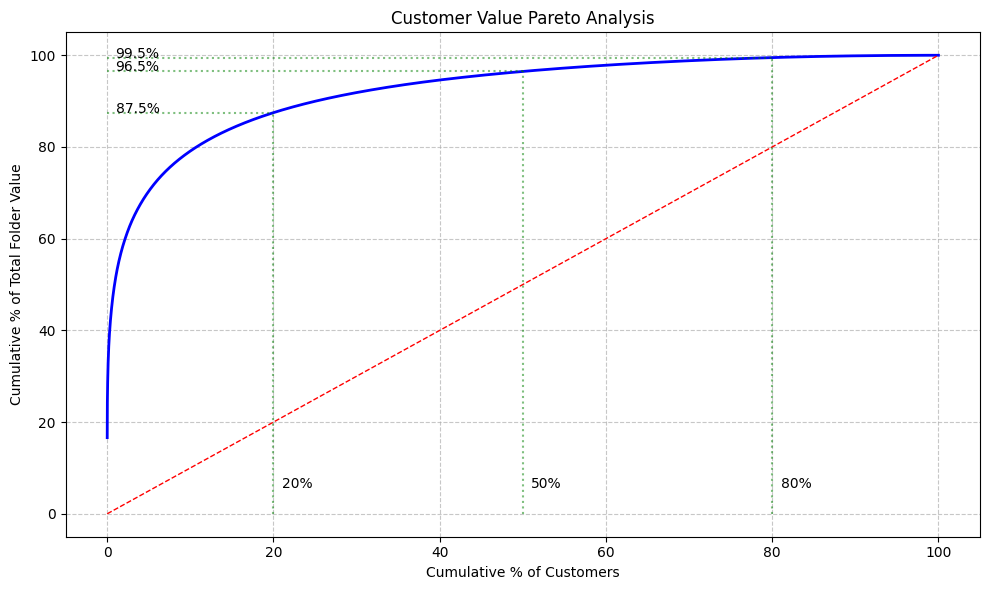


Customer Value Analysis
Total Customers: 150,285
Total Value: $6,313,477,577.08

Value Thresholds:
Top 10%: $52,479.60
Top 10-20%: $24,066.77
Middle 30%: $6,650.00
Bottom 50%: $-17,364.80

Top Customer Analysis:
Top 1% of customers (>456,207.84$) contribute: $3,240,973,571.72 (51.3%)
Top 5% of customers (>106,730.80$) contribute: $4,442,165,789.36 (70.4%)
Top 10% of customers (>52,479.60$) contribute: $4,994,811,749.32 (79.1%)
Top 20% of customers (>24,066.77$) contribute: $5,523,199,314.73 (87.5%)


In [58]:

# create a Pareto curve using TotalFolderValue 

import numpy as np
import matplotlib.pyplot as plt

# 1. Aggregate client values
client_values = merged_df.groupby('ClientID')['TotalFolderValue'].sum().sort_values(ascending=False)

# 2. Calculate cumulative metrics
total_value = client_values.sum()
total_clients = len(client_values)

cumulative_value = client_values.cumsum()
cumulative_value_pct = (cumulative_value / total_value) * 100

# Create figure with Pareto curve
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, 100, len(client_values)), cumulative_value_pct.values, 'b-', linewidth=2)
plt.plot([0, 100], [0, 100], 'r--', linewidth=1)  # diagonal line

# Add reference points
pareto_points = [20, 50, 80]
for point in pareto_points:
    idx = int(point * len(cumulative_value_pct) / 100)
    value_at_point = cumulative_value_pct.iloc[idx]
    
    plt.plot([point, point], [0, value_at_point], 'g:', alpha=0.5)
    plt.plot([0, point], [value_at_point, value_at_point], 'g:', alpha=0.5)
    plt.text(point + 1, 5, f'{point}%', verticalalignment='bottom')
    plt.text(1, value_at_point, f'{value_at_point:.1f}%', horizontalalignment='left')

plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Customer Value Pareto Analysis')
plt.xlabel('Cumulative % of Customers')
plt.ylabel('Cumulative % of Total Folder Value')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nCustomer Value Analysis")
print("=" * 50)
print(f"Total Customers: {total_clients:,}")
print(f"Total Value: ${total_value:,.2f}")

# Calculate value thresholds
value_thresholds = {
    'Top 10%': client_values.quantile(0.9),
    'Top 10-20%': client_values.quantile(0.8),
    'Middle 30%': client_values.quantile(0.5),
    'Bottom 50%': client_values.min()
}

print("\nValue Thresholds:")
for segment, threshold in value_thresholds.items():
    print(f"{segment}: ${threshold:,.2f}")

# Print additional statistics about top customers
top_percentiles = [1, 5, 10, 20]
print("\nTop Customer Analysis:")
print("=" * 50)
for p in top_percentiles:
    threshold = client_values.quantile(1 - p/100)
    value_sum = client_values[client_values >= threshold].sum()
    value_pct = (value_sum / total_value) * 100
    print(f"Top {p}% of customers (>{threshold:,.2f}$) contribute: ${value_sum:,.2f} ({value_pct:.1f}%)")

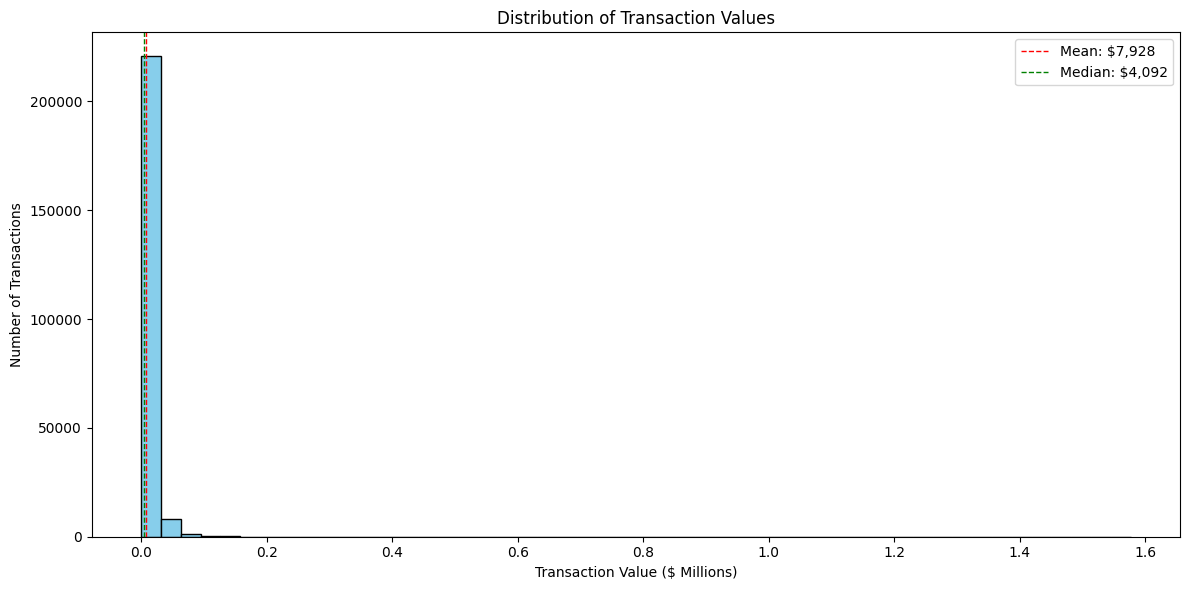


Transaction Value Statistics
Mean: $7,928.12
Median: $4,091.73
Min: $0.01
Max: $1,576,456.16

Top 10% of transactions (>$18,546.08):
Total value: $837,874,292.50
Percentage of total value: 45.9%

Top 5% of transactions (>$28,815.49):
Total value: $573,201,960.33
Percentage of total value: 31.4%

Top 1% of transactions (>$58,137.62):
Total value: $210,871,633.54
Percentage of total value: 11.5%

Highest Value Transaction Details:
Client Name: Zespri Grower Tour
Client ID: 317178
Folder ID: 44992
Value: $1,576,456.16
Outlet: TRGA
Date: 2022-08-11 00:00:00.000


In [59]:
####
# Transaction Value Distribution
####

plt.figure(figsize=(12,6))
plt.hist(merged_df['FolderValue']/1e6, bins=50, edgecolor='black', color='skyblue')
plt.title('Distribution of Transaction Values')
plt.xlabel('Transaction Value ($ Millions)')
plt.ylabel('Number of Transactions')

# Add vertical line for mean and median
plt.axvline(merged_df['FolderValue'].mean()/1e6, color='red', linestyle='dashed', linewidth=1, label=f'Mean: ${merged_df["FolderValue"].mean():,.0f}')
plt.axvline(merged_df['FolderValue'].median()/1e6, color='green', linestyle='dashed', linewidth=1, label=f'Median: ${merged_df["FolderValue"].median():,.0f}')

plt.legend()
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nTransaction Value Statistics")
print("=" * 50)
print(f"Mean: ${merged_df['FolderValue'].mean():,.2f}")
print(f"Median: ${merged_df['FolderValue'].median():,.2f}")
print(f"Min: ${merged_df['FolderValue'].min():,.2f}")
print(f"Max: ${merged_df['FolderValue'].max():,.2f}")

# Calculate percentiles
percentiles = [90, 95, 99]
for p in percentiles:
    threshold = merged_df['FolderValue'].quantile(p/100)
    value_sum = merged_df[merged_df['FolderValue'] >= threshold]['FolderValue'].sum()
    total_value = merged_df['FolderValue'].sum()
    value_pct = (value_sum / total_value) * 100
    print(f"\nTop {100-p}% of transactions (>${threshold:,.2f}):")
    print(f"Total value: ${value_sum:,.2f}")
    print(f"Percentage of total value: {value_pct:.1f}%")

# Get details of max transaction
max_transaction = merged_df.loc[merged_df['FolderValue'].idxmax()]
print("\nHighest Value Transaction Details:")
print("=" * 50)
print(f"Client Name: {max_transaction['FirstName']} {max_transaction['LastName']}")
print(f"Client ID: {max_transaction['ClientID']}")
print(f"Folder ID: {max_transaction['FolderID']}")
print(f"Value: ${max_transaction['FolderValue']:,.2f}")
print(f"Outlet: {max_transaction['FolderOutletCode']}")
print(f"Date: {max_transaction['FolderCreationDate']}")
if pd.notna(max_transaction['CruiseVendor']):
    print(f"Cruise Vendor: {max_transaction['CruiseVendor']}")
if pd.notna(max_transaction['TourVendor']):
    print(f"Tour Vendor: {max_transaction['TourVendor']}")
if pd.notna(max_transaction['HotelVendor']):
    print(f"Hotel Vendor: {max_transaction['HotelVendor']}")


In [60]:
merged_df[merged_df['ClientID']==317178] [['ClientID', 'FolderID', 'FolderValue','FirstName','LastName','FolderConfirmationDate']]

,ClientID,FolderID,FolderValue,FirstName,LastName,FolderConfirmationDate
203490,317178,49163,682770.85,Zespri,Grower Tour,2024-05-01
203491,317178,44992,1576456.16,Zespri,Grower Tour,2022-08-11


In [61]:
#### Andy's Request #####
# Top 10 Highest Value Transactions
####

print("\nTop 10 Highest Value Transactions")
print("=" * 80)

# Get top 10 transactions by folder value
top_10_transactions = merged_df.nlargest(10, 'FolderValue')[['ClientID', 'PaxNumber', 'FirstName', 'LastName', 'FolderID', 'FolderValue', 'FolderOutletCode', 'FolderCreationDate','FolderConfirmationDate', 'CruiseVendor', 'TourVendor', 'HotelVendor']]

# Print details for each transaction
for idx, transaction in top_10_transactions.iterrows():
    print(f"\nRank {top_10_transactions.index.get_loc(idx) + 1}")
    print(f"Client Name: {transaction['FirstName']} {transaction['LastName']}")
    print(f"Client ID: {transaction['ClientID']}")
    print(f"PaxNumber: {transaction['PaxNumber']}")
    print(f"Folder ID: {transaction['FolderID']}")
    print(f"Value: ${transaction['FolderValue']:,.2f}")
    print(f"Outlet: {transaction['FolderOutletCode']}")
    #print(f"Date: {transaction['FolderCreationDate']}")
    print(f"Date: {transaction['FolderConfirmationDate']}") 
    if pd.notna(transaction['CruiseVendor']):
        print(f"Cruise Vendor: {transaction['CruiseVendor']}")
    if pd.notna(transaction['TourVendor']):
        print(f"Tour Vendor: {transaction['TourVendor']}")
    if pd.notna(transaction['HotelVendor']):
        print(f"Hotel Vendor: {transaction['HotelVendor']}")
    print("-" * 40)



Top 10 Highest Value Transactions

Rank 1
Client Name: Zespri Grower Tour
Client ID: 317178
PaxNumber: 54
Folder ID: 44992
Value: $1,576,456.16
Outlet: TRGA
Date: 2022-08-11 00:00:00
----------------------------------------

Rank 2
Client Name: nan NZOC Paris Master
Client ID: 4111550
PaxNumber: 1
Folder ID: 52317
Value: $1,240,569.03
Outlet: CHC9
Date: 2023-09-21 00:00:00
----------------------------------------

Rank 3
Client Name: Trudy Geddes
Client ID: 734215
PaxNumber: 1
Folder ID: 29808
Value: $825,942.33
Outlet: WELS
Date: 2023-11-15 00:00:00
----------------------------------------

Rank 4
Client Name: Trudy Geddes
Client ID: 734215
PaxNumber: 1
Folder ID: 29808
Value: $824,819.50
Outlet: WELS
Date: 2023-11-15 00:00:00
----------------------------------------

Rank 5
Client Name: Matthew Clark
Client ID: 651164
PaxNumber: 85
Folder ID: 32384
Value: $754,499.03
Outlet: GIL3
Date: 2022-12-14 00:00:00
----------------------------------------

Rank 6
Client Name: Zespri Grower To

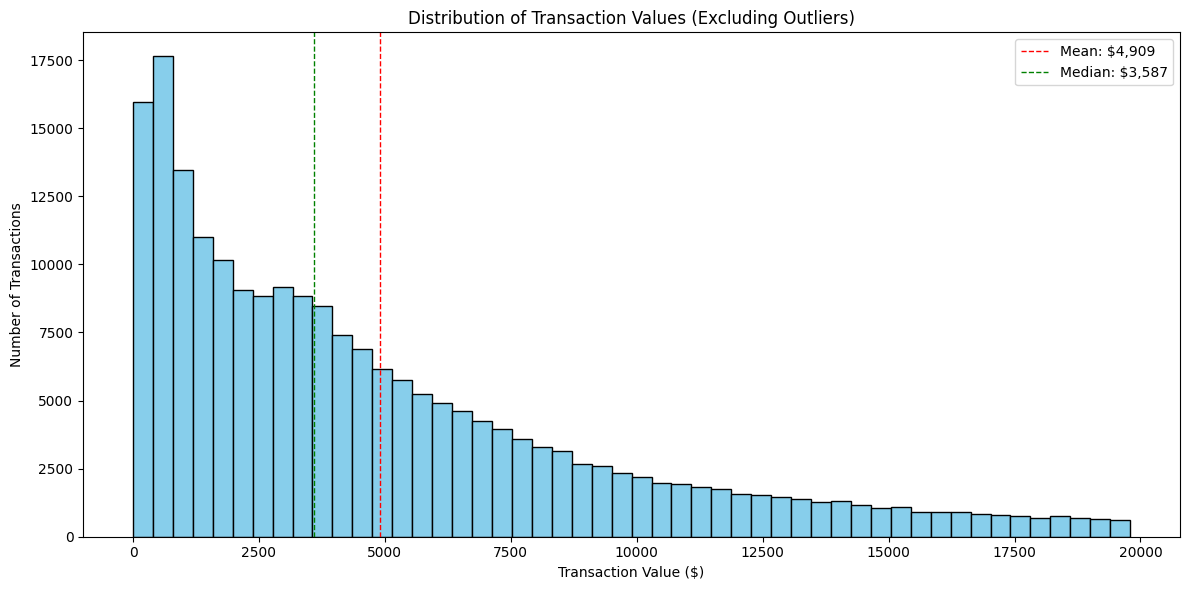


Transaction Value Statistics (Excluding Outliers)
Mean: $4,908.88
Median: $3,587.00
Min: $0.01
Max: $19,795.00
Number of outliers removed: 21027
Percentage of outliers: 9.1%

Top 10% of transactions (>$11,728.00):
Total value: $315,588,490.26
Percentage of total value: 30.7%

Top 5% of transactions (>$14,706.83):
Total value: $178,055,998.85
Percentage of total value: 17.3%

Top 1% of transactions (>$18,515.65):
Total value: $40,079,043.20
Percentage of total value: 3.9%

Highest Value Transaction Details:
Client ID: 1421029
Folder ID: 39543
Value: $19,795.00
Outlet: NMKT
Date: 2022-10-12 00:00:00.000
Hotel Vendor: Fairmont Mayakoba Riviera Maya;Grand Hotel Canc£n managed by Kempinski;Kore Tulum Retreat Wellness Resort All Inclusive

Outlier Transactions Summary Statistics:
Number of outliers: 21027
Mean value: $38,004.92
Median value: $30,347.00
Min value: $19,796.00
Max value: $1,576,456.16
Total value of outliers: $799,129,532.60
Percentage of total value: 43.7%
Percentage of total

In [62]:
####
# Transaction Value Distribution (Excluding Outliers)
####

# Calculate outlier thresholds using IQR method
Q1 = merged_df['FolderValue'].quantile(0.25)
Q3 = merged_df['FolderValue'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = merged_df[merged_df['FolderValue'] <= upper_bound]

fig, ax = plt.subplots(figsize=(12,6))
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

plt.hist(filtered_df['FolderValue'], bins=50, edgecolor='black', color='skyblue') 
plt.title('Distribution of Transaction Values (Excluding Outliers)')
plt.xlabel('Transaction Value ($)')
plt.ylabel('Number of Transactions')

# Add black border around plot
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black') 
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

# Add vertical line for mean and median of filtered data
plt.axvline(filtered_df['FolderValue'].mean(), color='red', linestyle='dashed', linewidth=1, 
            label=f'Mean: ${filtered_df["FolderValue"].mean():,.0f}')
plt.axvline(filtered_df['FolderValue'].median(), color='green', linestyle='dashed', linewidth=1,
            label=f'Median: ${filtered_df["FolderValue"].median():,.0f}')

plt.legend()
plt.tight_layout()
plt.show()

# Print summary statistics for filtered data
print("\nTransaction Value Statistics (Excluding Outliers)")
print("=" * 50)
print(f"Mean: ${filtered_df['FolderValue'].mean():,.2f}")
print(f"Median: ${filtered_df['FolderValue'].median():,.2f}") 
print(f"Min: ${filtered_df['FolderValue'].min():,.2f}")
print(f"Max: ${filtered_df['FolderValue'].max():,.2f}")
print(f"Number of outliers removed: {len(merged_df) - len(filtered_df)}")
print(f"Percentage of outliers: {((len(merged_df) - len(filtered_df)) / len(merged_df) * 100):.1f}%")


# Calculate percentiles
percentiles = [90, 95, 99]
for p in percentiles:
    threshold = filtered_df['FolderValue'].quantile(p/100)
    value_sum = filtered_df[filtered_df['FolderValue'] >= threshold]['FolderValue'].sum()
    total_value = filtered_df['FolderValue'].sum()
    value_pct = (value_sum / total_value) * 100
    print(f"\nTop {100-p}% of transactions (>${threshold:,.2f}):")
    print(f"Total value: ${value_sum:,.2f}")
    print(f"Percentage of total value: {value_pct:.1f}%")

# Get details of max transaction
max_transaction = filtered_df.loc[filtered_df['FolderValue'].idxmax()]
print("\nHighest Value Transaction Details:")
print("=" * 50)
print(f"Client ID: {max_transaction['ClientID']}")
print(f"Folder ID: {max_transaction['FolderID']}")
print(f"Value: ${max_transaction['FolderValue']:,.2f}")
print(f"Outlet: {max_transaction['FolderOutletCode']}")
print(f"Date: {max_transaction['FolderCreationDate']}")
if pd.notna(max_transaction['CruiseVendor']):
    print(f"Cruise Vendor: {max_transaction['CruiseVendor']}")
if pd.notna(max_transaction['TourVendor']):
    print(f"Tour Vendor: {max_transaction['TourVendor']}")
if pd.notna(max_transaction['HotelVendor']):
    print(f"Hotel Vendor: {max_transaction['HotelVendor']}")

# Get outlier transactions
outliers_df = merged_df[merged_df['FolderValue'] > upper_bound].sort_values('FolderValue', ascending=False)

print("\nOutlier Transactions Summary Statistics:")
print("=" * 50)
print(f"Number of outliers: {len(outliers_df)}")
print(f"Mean value: ${outliers_df['FolderValue'].mean():,.2f}")
print(f"Median value: ${outliers_df['FolderValue'].median():,.2f}")
print(f"Min value: ${outliers_df['FolderValue'].min():,.2f}")
print(f"Max value: ${outliers_df['FolderValue'].max():,.2f}")
print(f"Total value of outliers: ${outliers_df['FolderValue'].sum():,.2f}")
print(f"Percentage of total value: {(outliers_df['FolderValue'].sum() / merged_df['FolderValue'].sum() * 100):.1f}%")
print(f"Percentage of total transactions: {(len(outliers_df) / len(merged_df) * 100):.1f}%")

print("\nTop 10 Outlier Transactions:")
print("=" * 50)
for _, row in outliers_df.head(10).iterrows():
    print(f"\nClient ID: {row['ClientID']}")
    print(f"Folder ID: {row['FolderID']}")
    print(f"Value: ${row['FolderValue']:,.2f}")
    print(f"Outlet: {row['FolderOutletCode']}")
    print(f"Date: {row['FolderCreationDate']}")
    if pd.notna(row['CruiseVendor']):
        print(f"Cruise Vendor: {row['CruiseVendor']}")
    if pd.notna(row['TourVendor']):
        print(f"Tour Vendor: {row['TourVendor']}")
    if pd.notna(row['HotelVendor']):
        print(f"Hotel Vendor: {row['HotelVendor']}")

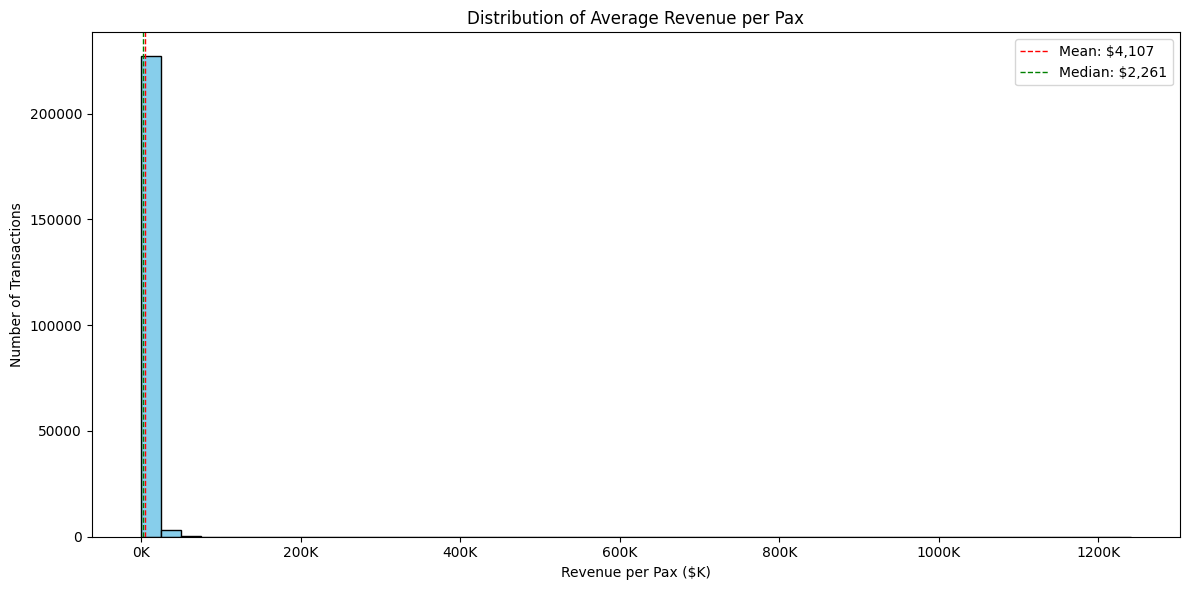


Revenue per Pax Statistics
Mean: $4,107.09
Median: $2,261.00
Min: $0.01
Max: $1,240,569.03

Top 10% of transactions (>$9,592.98 per pax):
Total value: $425,005,825.61
Percentage of total value: 44.9%

Top 5% of transactions (>$14,628.04 per pax):
Total value: $288,199,363.72
Percentage of total value: 30.4%

Top 1% of transactions (>$28,545.18 per pax):
Total value: $107,892,418.40
Percentage of total value: 11.4%

Highest Revenue per Pax Transaction Details:
Client ID: 4111550
Folder ID: 52317
Value per Pax: $1,240,569.03
Total Value: $1,240,569.03
Number of Pax: 1
Outlet: CHC9
Date: 2023-09-21 00:00:00.000

Top 10 Transactions by Revenue per Pax:

Client ID: 4111550
Folder ID: 52317
Value per Pax: $1,240,569.03
Total Value: $1,240,569.03
Number of Pax: 1
Outlet: CHC9
Date: 2023-09-21 00:00:00.000

Client ID: 734215
Folder ID: 29808
Value per Pax: $825,942.33
Total Value: $825,942.33
Number of Pax: 1
Outlet: WELS
Date: 2023-11-15 00:00:00.000

Client ID: 734215
Folder ID: 29808
Value

In [63]:
####
# Transaction Value Distribution by Average Revenue per Pax
####

# Calculate average revenue per pax
merged_df['RevenuePerPax'] = merged_df['FolderValue'] / merged_df['PaxNumber']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

plt.hist(merged_df['RevenuePerPax'], bins=50, edgecolor='black',color='skyblue')
plt.title('Distribution of Average Revenue per Pax')
plt.xlabel('Revenue per Pax ($K)')
plt.ylabel('Number of Transactions')

# Format x-axis ticks to show thousands with K
def format_func(x, p):
    return f"{x/1000:.0f}K"
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

# Add black border around plot
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

# Add vertical line for mean and median
plt.axvline(merged_df['RevenuePerPax'].mean(), color='red', linestyle='dashed', linewidth=1,
            label=f'Mean: ${merged_df["RevenuePerPax"].mean():,.0f}')
plt.axvline(merged_df['RevenuePerPax'].median(), color='green', linestyle='dashed', linewidth=1,
            label=f'Median: ${merged_df["RevenuePerPax"].median():,.0f}')

plt.legend()
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nRevenue per Pax Statistics")
print("=" * 50)
print(f"Mean: ${merged_df['RevenuePerPax'].mean():,.2f}")
print(f"Median: ${merged_df['RevenuePerPax'].median():,.2f}")
print(f"Min: ${merged_df['RevenuePerPax'].min():,.2f}")
print(f"Max: ${merged_df['RevenuePerPax'].max():,.2f}")

# Calculate percentiles
percentiles = [90, 95, 99]
for p in percentiles:
    threshold = merged_df['RevenuePerPax'].quantile(p/100)
    value_sum = merged_df[merged_df['RevenuePerPax'] >= threshold]['RevenuePerPax'].sum()
    total_value = merged_df['RevenuePerPax'].sum()
    value_pct = (value_sum / total_value) * 100
    print(f"\nTop {100-p}% of transactions (>${threshold:,.2f} per pax):")
    print(f"Total value: ${value_sum:,.2f}")
    print(f"Percentage of total value: {value_pct:.1f}%")

# Get details of max revenue per pax transaction
max_transaction = merged_df.loc[merged_df['RevenuePerPax'].idxmax()]
print("\nHighest Revenue per Pax Transaction Details:")
print("=" * 50)
print(f"Client ID: {max_transaction['ClientID']}")
print(f"Folder ID: {max_transaction['FolderID']}")
print(f"Value per Pax: ${max_transaction['RevenuePerPax']:,.2f}")
print(f"Total Value: ${max_transaction['FolderValue']:,.2f}")
print(f"Number of Pax: {max_transaction['PaxNumber']}")
print(f"Outlet: {max_transaction['FolderOutletCode']}")
print(f"Date: {max_transaction['FolderCreationDate']}")
if pd.notna(max_transaction['CruiseVendor']):
    print(f"Cruise Vendor: {max_transaction['CruiseVendor']}")
if pd.notna(max_transaction['TourVendor']):
    print(f"Tour Vendor: {max_transaction['TourVendor']}")
if pd.notna(max_transaction['HotelVendor']):
    print(f"Hotel Vendor: {max_transaction['HotelVendor']}")

# Print top 10 transactions by revenue per pax
print("\nTop 10 Transactions by Revenue per Pax:")
print("=" * 50)
top_10_df = merged_df.nlargest(10, 'RevenuePerPax')
for _, row in top_10_df.iterrows():
    print(f"\nClient ID: {row['ClientID']}")
    print(f"Folder ID: {row['FolderID']}")
    print(f"Value per Pax: ${row['RevenuePerPax']:,.2f}")
    print(f"Total Value: ${row['FolderValue']:,.2f}")
    print(f"Number of Pax: {row['PaxNumber']}")
    print(f"Outlet: {row['FolderOutletCode']}")
    print(f"Date: {row['FolderCreationDate']}")
    if pd.notna(row['CruiseVendor']):
        print(f"Cruise Vendor: {row['CruiseVendor']}")
    if pd.notna(row['TourVendor']):
        print(f"Tour Vendor: {row['TourVendor']}")
    if pd.notna(row['HotelVendor']):
        print(f"Hotel Vendor: {row['HotelVendor']}")

In [64]:
merged_df[merged_df['ClientID'] == 4111550] [['FolderID', 'FirstName', 'LastName', 'FolderValue', 'FolderOutletCode', 'FolderStatus', 'FolderConfirmationDate']]

,FolderID,FirstName,LastName,FolderValue,FolderOutletCode,FolderStatus,FolderConfirmationDate
223955,52317,nan,NZOC Paris Master,1240569.03,CHC9,Invoiced,2023-09-21


In [65]:
merged_df[merged_df['ClientID'] == 4111550] [['ClientID','FirstName', 'LastName', 'FolderValue', 'PaxNumber']]


,ClientID,FirstName,LastName,FolderValue,PaxNumber
223955,4111550,nan,NZOC Paris Master,1240569.03,1


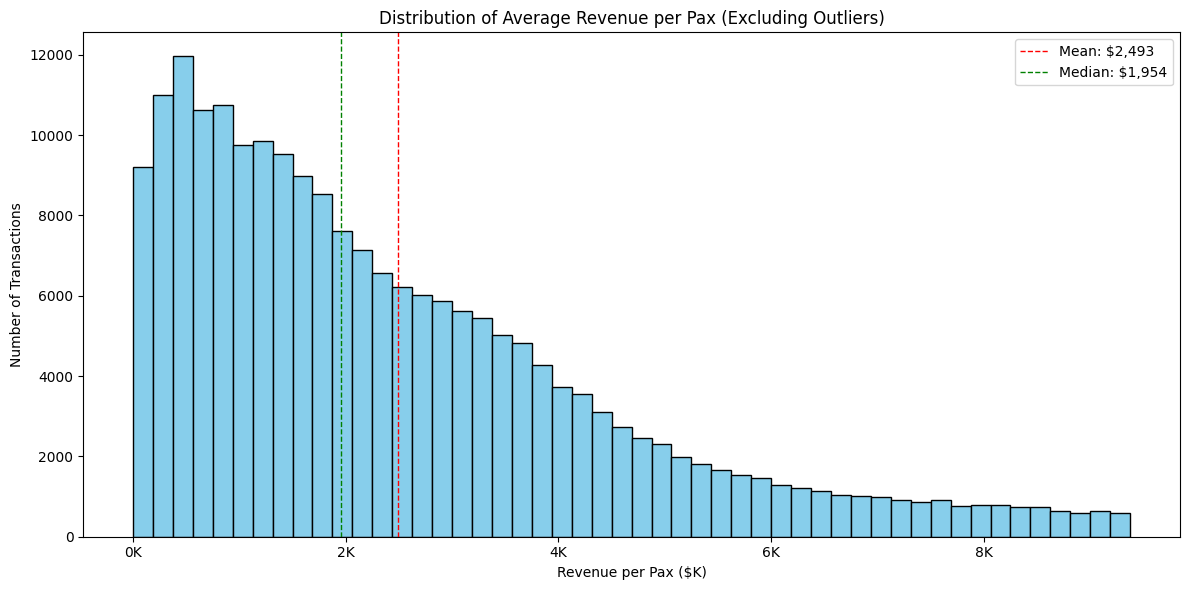


Revenue per Pax Statistics (Excluding Outliers)
Mean: $2,492.55
Median: $1,953.87
Min: $0.01
Max: $9,379.00

Top 10% of transactions (>$5,400.00 per pax):
Total value: $145,598,292.75
Percentage of total value: 28.2%

Top 5% of transactions (>$6,875.00 per pax):
Total value: $82,854,679.27
Percentage of total value: 16.1%

Top 1% of transactions (>$8,744.32 per pax):
Total value: $18,735,725.17
Percentage of total value: 3.6%

Highest Revenue per Pax Transaction Details (Excluding Outliers):
Client ID: 572973
Folder ID: 22323
Value per Pax: $9,379.00
Total Value: $9,379.00
Number of Pax: 1
Outlet: PMRA
Date: 2023-07-31 00:00:00.000
Hotel Vendor: Adina Apartment Hotel Adelaide Treasury;Heartland Hotel Auckland Airport;Mercure Alice Springs Resort;Ramada Suites By Wyndham Zen Quarter Darwin

Top 10 Transactions by Revenue per Pax (Excluding Outliers):

Client ID: 572973
Folder ID: 22323
Value per Pax: $9,379.00
Total Value: $9,379.00
Number of Pax: 1
Outlet: PMRA
Date: 2023-07-31 00:00:

In [66]:
## Chart plot to exclude outliers 
#  
####
# Transaction Value Distribution by Average Revenue per Pax (Excluding Outliers)
####

# Calculate average revenue per pax
merged_df['RevenuePerPax'] = merged_df['FolderValue'] / merged_df['PaxNumber']

# Calculate outlier thresholds using IQR method
Q1 = merged_df['RevenuePerPax'].quantile(0.25)
Q3 = merged_df['RevenuePerPax'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = merged_df[merged_df['RevenuePerPax'] <= upper_bound]

fig, ax = plt.subplots(figsize=(12,6))
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

plt.hist(df_no_outliers['RevenuePerPax'], bins=50, edgecolor='black',color='skyblue')
plt.title('Distribution of Average Revenue per Pax (Excluding Outliers)')
plt.xlabel('Revenue per Pax ($K)')
plt.ylabel('Number of Transactions')

# Format x-axis ticks to show thousands with K
def format_func(x, p):
    return f"{x/1000:.0f}K"
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

# Add black border around plot
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

# Add vertical line for mean and median
plt.axvline(df_no_outliers['RevenuePerPax'].mean(), color='red', linestyle='dashed', linewidth=1,
            label=f'Mean: ${df_no_outliers["RevenuePerPax"].mean():,.0f}')
plt.axvline(df_no_outliers['RevenuePerPax'].median(), color='green', linestyle='dashed', linewidth=1,
            label=f'Median: ${df_no_outliers["RevenuePerPax"].median():,.0f}')

plt.legend()
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nRevenue per Pax Statistics (Excluding Outliers)")
print("=" * 50)
print(f"Mean: ${df_no_outliers['RevenuePerPax'].mean():,.2f}")
print(f"Median: ${df_no_outliers['RevenuePerPax'].median():,.2f}")
print(f"Min: ${df_no_outliers['RevenuePerPax'].min():,.2f}")
print(f"Max: ${df_no_outliers['RevenuePerPax'].max():,.2f}")

# Calculate percentiles
percentiles = [90, 95, 99]
for p in percentiles:
    threshold = df_no_outliers['RevenuePerPax'].quantile(p/100)
    value_sum = df_no_outliers[df_no_outliers['RevenuePerPax'] >= threshold]['RevenuePerPax'].sum()
    total_value = df_no_outliers['RevenuePerPax'].sum()
    value_pct = (value_sum / total_value) * 100
    print(f"\nTop {100-p}% of transactions (>${threshold:,.2f} per pax):")
    print(f"Total value: ${value_sum:,.2f}")
    print(f"Percentage of total value: {value_pct:.1f}%")

# Get details of max revenue per pax transaction
max_transaction = df_no_outliers.loc[df_no_outliers['RevenuePerPax'].idxmax()]
print("\nHighest Revenue per Pax Transaction Details (Excluding Outliers):")
print("=" * 50)
print(f"Client ID: {max_transaction['ClientID']}")
print(f"Folder ID: {max_transaction['FolderID']}")
print(f"Value per Pax: ${max_transaction['RevenuePerPax']:,.2f}")
print(f"Total Value: ${max_transaction['FolderValue']:,.2f}")
print(f"Number of Pax: {max_transaction['PaxNumber']}")
print(f"Outlet: {max_transaction['FolderOutletCode']}")
print(f"Date: {max_transaction['FolderCreationDate']}")
if pd.notna(max_transaction['CruiseVendor']):
    print(f"Cruise Vendor: {max_transaction['CruiseVendor']}")
if pd.notna(max_transaction['TourVendor']):
    print(f"Tour Vendor: {max_transaction['TourVendor']}")
if pd.notna(max_transaction['HotelVendor']):
    print(f"Hotel Vendor: {max_transaction['HotelVendor']}")

# Print top 10 transactions by revenue per pax
print("\nTop 10 Transactions by Revenue per Pax (Excluding Outliers):")
print("=" * 50)
top_10_df = df_no_outliers.nlargest(10, 'RevenuePerPax')
for _, row in top_10_df.iterrows():
    print(f"\nClient ID: {row['ClientID']}")
    print(f"Folder ID: {row['FolderID']}")
    print(f"Value per Pax: ${row['RevenuePerPax']:,.2f}")
    print(f"Total Value: ${row['FolderValue']:,.2f}")
    print(f"Number of Pax: {row['PaxNumber']}")
    print(f"Outlet: {row['FolderOutletCode']}")
    print(f"Date: {row['FolderCreationDate']}")
    if pd.notna(row['CruiseVendor']):
        print(f"Cruise Vendor: {row['CruiseVendor']}")
    if pd.notna(row['TourVendor']):
        print(f"Tour Vendor: {row['TourVendor']}")
    if pd.notna(row['HotelVendor']):
        print(f"Hotel Vendor: {row['HotelVendor']}")

# Get outlier transactions
outliers_df = merged_df[merged_df['RevenuePerPax'] > upper_bound].sort_values('RevenuePerPax', ascending=False)

print("\nOutlier Transactions Summary Statistics:")
print("=" * 50)
print(f"Number of outliers: {len(outliers_df)}")
print(f"Mean value: ${outliers_df['RevenuePerPax'].mean():,.2f}")
print(f"Median value: ${outliers_df['RevenuePerPax'].median():,.2f}")
print(f"Min value: ${outliers_df['RevenuePerPax'].min():,.2f}")
print(f"Max value: ${outliers_df['RevenuePerPax'].max():,.2f}")
print(f"Total value of outliers: ${outliers_df['RevenuePerPax'].sum():,.2f}")
print(f"Percentage of total value: {(outliers_df['RevenuePerPax'].sum() / merged_df['RevenuePerPax'].sum() * 100):.1f}%")
print(f"Percentage of total transactions: {(len(outliers_df) / len(merged_df) * 100):.1f}%")


Decile Analysis

C:\Users\DavidAirehrourTogeth\AppData\Local\Temp\ipykernel_28912\1008190311.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'Total Value': client_total_value.groupby(deciles).sum(),
C:\Users\DavidAirehrourTogeth\AppData\Local\Temp\ipykernel_28912\1008190311.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'Total Transactions': client_transactions.groupby(deciles).sum()
C:\Users\DavidAirehrourTogeth\AppData\Local\Temp\ipykernel_28912\1008190311.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr


             Customers      Total Value  Total Transactions  \
FolderValue                                                   
D1               15029    $6,365,865.57               16038   
D2               15028   $19,998,583.92               17320   
D3               15030   $36,803,792.50               17965   
D4               15027   $53,694,750.10               17924   
D5               15029   $72,605,001.11               18632   
D6               15032   $97,115,027.17               19986   
D7               15024  $130,964,853.87               22009   
D8               15029  $188,021,845.18               24600   
D9               15028  $303,435,957.32               29389   
D10              15029  $918,363,190.13               46629   

            Avg Value per Customer Avg Transactions per Customer  \
FolderValue                                                        
D1                         $423.57                           1.1   
D2                       $1,330.75    

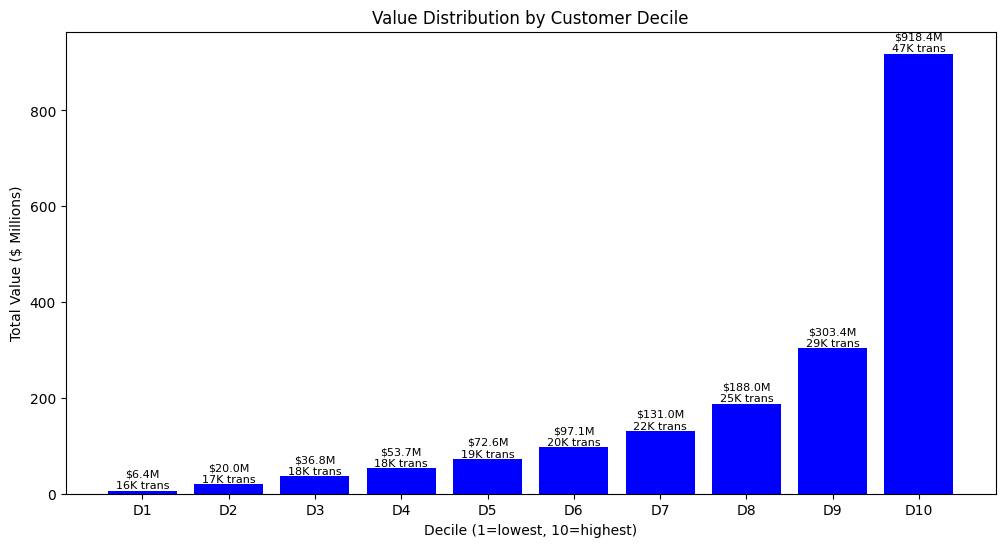

In [67]:
####
# Decile Analysis FolderValue
####

# Calculate total value per client
client_total_value = merged_df.groupby('ClientID')['FolderValue'].sum().sort_values(ascending=False)

# Calculate number of transactions per client
client_transactions = merged_df.groupby('ClientID').size()

# Create deciles
deciles = pd.qcut(client_total_value, q=10, labels=['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10'])

# Create summary dataframe
decile_summary = pd.DataFrame({
    'Customers': deciles.value_counts().sort_index(),
    'Total Value': client_total_value.groupby(deciles).sum(),
    'Total Transactions': client_transactions.groupby(deciles).sum()
})

# Calculate additional metrics
decile_summary['Avg Value per Customer'] = decile_summary['Total Value'] / decile_summary['Customers']
decile_summary['Avg Transactions per Customer'] = decile_summary['Total Transactions'] / decile_summary['Customers']
# Calculate average transaction value by dividing total value by total transactions for each decile
decile_summary['Avg Transaction Value'] = decile_summary['Total Value'] / decile_summary['Total Transactions']
decile_summary['Pct of Total Value'] = (decile_summary['Total Value'] / decile_summary['Total Value'].sum()) * 100
decile_summary['Cumulative Pct Value'] = decile_summary['Pct of Total Value'].cumsum()
decile_summary['Pct of Customers'] = (decile_summary['Customers'] / decile_summary['Customers'].sum()) * 100
decile_summary['Cumulative Pct Customers'] = decile_summary['Pct of Customers'].cumsum()

# Format the values for display
decile_summary['Total Value'] = decile_summary['Total Value'].map('${:,.2f}'.format)
decile_summary['Avg Value per Customer'] = decile_summary['Avg Value per Customer'].map('${:,.2f}'.format)
decile_summary['Avg Transactions per Customer'] = decile_summary['Avg Transactions per Customer'].map('{:.1f}'.format)
decile_summary['Avg Transaction Value'] = decile_summary['Avg Transaction Value'].map('${:,.2f}'.format)
decile_summary['Pct of Total Value'] = decile_summary['Pct of Total Value'].map('{:.1f}%'.format)
decile_summary['Cumulative Pct Value'] = decile_summary['Cumulative Pct Value'].map('{:.1f}%'.format)
decile_summary['Pct of Customers'] = decile_summary['Pct of Customers'].map('{:.1f}%'.format)
decile_summary['Cumulative Pct Customers'] = decile_summary['Cumulative Pct Customers'].map('{:.1f}%'.format)

# Display the summary
print("\nDecile Analysis")
print("=" * 100)
print(decile_summary)

# Calculate and display key insights
print("\nKey Insights:")
print("=" * 100)
top_decile_value = client_total_value.groupby(deciles).sum().iloc[-1]
total_value = client_total_value.sum()
top_decile_transactions = client_transactions.groupby(deciles).sum().iloc[-1]
total_transactions = client_transactions.sum()

print(f"Top 10% of customers (Decile 10):")
print(f"- Value: ${top_decile_value:,.2f} ({(top_decile_value/total_value)*100:.1f}%) of total value")
print(f"- Transactions: {top_decile_transactions:,.0f} ({(top_decile_transactions/total_transactions)*100:.1f}%) of total transactions")

top_two_deciles_value = client_total_value.groupby(deciles).sum().iloc[-2:].sum()
top_two_deciles_transactions = client_transactions.groupby(deciles).sum().iloc[-2:].sum()

print(f"\nTop 20% of customers (Deciles 9-10):")
print(f"- Value: ${top_two_deciles_value:,.2f} ({(top_two_deciles_value/total_value)*100:.1f}%) of total value")
print(f"- Transactions: {top_two_deciles_transactions:,.0f} ({(top_two_deciles_transactions/total_transactions)*100:.1f}%) of total transactions")

# Visualize the decile distribution
plt.figure(figsize=(12, 6))
values_by_decile = client_total_value.groupby(deciles).sum() / 1e6  # Convert to millions
plt.bar(range(10), values_by_decile.values, color=blue)
plt.title('Value Distribution by Customer Decile')
plt.xlabel('Decile (1=lowest, 10=highest)')
plt.ylabel('Total Value ($ Millions)')
plt.xticks(range(10), ['D'+str(i+1) for i in range(10)])

# Add value labels on top of bars
for i, v in enumerate(values_by_decile):
    plt.text(i, v, f'${v:.1f}M\n{client_transactions.groupby(deciles).sum()[i]/1000:.0f}K trans', 
             ha='center', va='bottom', fontsize=8)

plt.show()


In [68]:
decile_summary = decile_summary.drop(['Cumulative Pct Value', 'Pct of Customers', 'Cumulative Pct Customers'], axis=1)
decile_summary_final = decile_summary.reindex(columns=[
    'Customers', 
    'Total Value',
    'Total Transactions',
    'Avg Transaction Value',
    'Avg Value per Customer',
    'Avg Transactions per Customer',
    'Pct of Total Value'
])
decile_summary_final

,Customers,Total Value,Total Transactions,Avg Transaction Value,Avg Value per Customer,Avg Transactions per Customer,Pct of Total Value
FolderValue,,,,,,,
D1,15029,"$6,365,865.57",16038,$396.92,$423.57,1.1,0.3%
D2,15028,"$19,998,583.92",17320,"$1,154.65","$1,330.75",1.2,1.1%
D3,15030,"$36,803,792.50",17965,"$2,048.64","$2,448.69",1.2,2.0%
D4,15027,"$53,694,750.10",17924,"$2,995.69","$3,573.22",1.2,2.9%
D5,15029,"$72,605,001.11",18632,"$3,896.79","$4,830.99",1.2,4.0%
D6,15032,"$97,115,027.17",19986,"$4,859.15","$6,460.55",1.3,5.3%
D7,15024,"$130,964,853.87",22009,"$5,950.51","$8,717.04",1.5,7.2%
D8,15029,"$188,021,845.18",24600,"$7,643.16","$12,510.60",1.6,10.3%
D9,15028,"$303,435,957.32",29389,"$10,324.81","$20,191.37",2.0,16.6%


In [69]:
len(merged_df)

230492

##### Calculate the total across the  FolderOutletCode 

In [77]:
# Calculate aggregated metrics by FolderOutletCode
outlet_summary = merged_df.groupby('FolderOutletCode').agg({
    'FolderValue': 'sum',
    'FolderID': 'count'     # Count transactions (using FolderID as proxy)
}).reset_index()

# Calculate unique clients per outlet code separately to avoid double counting
# clients that appear across multiple outlet codes
unique_client_outlet = merged_df[['ClientID', 'FolderOutletCode']].drop_duplicates()
client_counts_by_outlet = unique_client_outlet.groupby('FolderOutletCode')['ClientID'].count().reset_index()
client_counts_by_outlet.columns = ['FolderOutletCode', 'Number_of_Clients']

# Merge the client counts with the outlet summary
outlet_summary = outlet_summary.merge(client_counts_by_outlet, on='FolderOutletCode', how='left')

# Rename columns for clarity
outlet_summary.columns = ['FolderOutletCode', 'Total_FolderValue', 'Number_of_Transactions', 'Number_of_Clients']

# Reorder columns
outlet_summary = outlet_summary[['FolderOutletCode', 'Total_FolderValue', 'Number_of_Clients', 'Number_of_Transactions']]

# Sort by Total_FolderValue in descending order
outlet_summary = outlet_summary.sort_values('Total_FolderValue', ascending=False)

# Add analysis of clients appearing across multiple outlet codes
print("Analysis of clients across outlet codes:")
client_outlet_counts = unique_client_outlet.groupby('ClientID')['FolderOutletCode'].count()
multi_outlet_clients = client_outlet_counts[client_outlet_counts > 1]
print(f"Total unique clients: {len(client_outlet_counts)}")
print(f"Clients appearing in multiple outlet codes: {len(multi_outlet_clients)}")
print(f"Percentage of clients with multi-outlet activity: {(len(multi_outlet_clients)/len(client_outlet_counts))*100:.1f}%")

# Display the summary
print("\nFolderOutletCode Summary:")
print(outlet_summary)


Analysis of clients across outlet codes:
Total unique clients: 150285
Clients appearing in multiple outlet codes: 4853
Percentage of clients with multi-outlet activity: 3.2%

FolderOutletCode Summary:
   FolderOutletCode  Total_FolderValue  Number_of_Clients  \
48             PAPA        58082352.41               4046   
18             GILY        52796057.51               4532   
9              CHCH        51138723.39               4380   
41             MUZA        50308162.14               3896   
56             RHIN        47123361.98               3794   
..              ...                ...                ...   
74             WLGN          247085.74                 43   
72             WLG5          212980.88                 58   
4              CA11            2240.00                  1   
5              CA12            1667.96                  2   
37             MERI            1372.00                  1   

    Number_of_Transactions  
48                    6223  
18      

In [ ]:
outlet_summary.to_csv('d:/downloads/hoT-outletcode-summary.csv', index=False)
outlet_summary.head()

,FolderOutletCode,Total_FolderValue,Number_of_Clients,Number_of_Transactions
48,PAPA,58082352.41,4046,6223
18,GILY,52796057.51,4532,6684
9,CHCH,51138723.39,4380,6895
41,MUZA,50308162.14,3896,5382
56,RHIN,47123361.98,3794,5624
...,...,...,...,...
74,WLGN,247085.74,43,45
72,WLG5,212980.88,58,61
4,CA11,2240.00,1,1
5,CA12,1667.96,2,2


Get SME_Corporate which is LinkedTocompany = 1

In [84]:
# get SME_Corporate which is LinkedTocompany = 1
SME_Corporate_df = merged_df[merged_df['LinkedToCompany'] == 1]
SME_Corporate_df.to_csv('d:/downloads/hoT-SME_Corporate.csv', index=False)
SME_Corporate_df.head()


,ClientID,ProfileType,LinkedProfileIDs,HeadClientID,FirstName,LastName,EmailAddress,client_age,City,EmailFlag,...,HotelVendor,FolderValue,TotalFolderValue,FinalPaymentDue,FinalPaymentBalance,ArrivalAirport,FinancePayment,Year,FirstBookingDate,RevenuePerPax
21,1569063,Individual,NaN,-1.0,Kerri Anne,Hancock,kerri.hancock@kaupare.co.nz,0,Rotorua,1,...,NaN,437.0,437.0,2023-07-05 00:00:00.000,0.0,WLG,NaN,2023,2023-04-11,437.00
31,867542,Individual,NaN,-1.0,Allen Wallace,Clampitt,alclampitt@gmail.com,51,nan,1,...,NaN,3107.0,7212.0,2023-04-20 00:00:00.000,0.0,CNS,NaN,2023,2022-04-26,3107.00
32,867542,Individual,NaN,-1.0,Allen Wallace,Clampitt,alclampitt@gmail.com,51,nan,1,...,NaN,898.0,7212.0,2022-07-20 00:00:00.000,0.0,BNE,NaN,2022,2022-04-26,898.00
33,867542,Individual,NaN,-1.0,Allen Wallace,Clampitt,alclampitt@gmail.com,51,nan,1,...,NaN,3207.0,7212.0,2022-05-20 00:00:00.000,0.0,CNS,NaN,2022,2022-04-26,3207.00
34,867542,Individual,NaN,-1.0,Allen Wallace,Clampitt,alclampitt@gmail.com,51,nan,1,...,NaN,3997.0,11209.0,2025-01-20 00:00:00.000,0.0,SYD,NaN,2024,2022-04-26,999.25


In [ ]:
### End of FolderOutlet Calculation ###

In [70]:
####
# Assign deciles to each client
####

# Create a mapping of ClientID to decile
client_decile_mapping = pd.Series(deciles, index=client_total_value.index)

# Add decile column to merged_df
merged_df['CustomerDecile'] = merged_df['ClientID'].map(client_decile_mapping)


In [71]:
# Check for ClientIDs with multiple decile assignments
decile_counts = merged_df.groupby('ClientID')['CustomerDecile'].nunique()
multiple_deciles = decile_counts[decile_counts > 1]

if len(multiple_deciles) > 0:
    print(f"Found {len(multiple_deciles)} ClientIDs with multiple decile assignments:")
    print("\nExample clients with multiple deciles:")
    for client_id in multiple_deciles.index[:5]:  # Show first 5 examples
        print(f"\nClientID: {client_id}")
        print(merged_df[merged_df['ClientID'] == client_id][['ClientID', 'CustomerDecile']].to_string())
else:
    print("No ClientIDs found with multiple decile assignments")
    print("\nFirst few rows of merged_df:")
    print(merged_df.head())

No ClientIDs found with multiple decile assignments

First few rows of merged_df:
   ClientID ProfileType LinkedProfileIDs  HeadClientID     FirstName LastName  \
0   1967108  Individual              NaN          -1.0        Gerard   Clarke   
1   1976555        Head          3936415     1976555.0  John Clement   Harris   
2   1976555        Head          3936415     1976555.0  John Clement   Harris   
3   1989051        Head  1989055;1989059     1989051.0    Susan Mary    Quinn   
4   1989051        Head  1989055;1989059     1989051.0    Susan Mary    Quinn   

                EmailAddress  client_age      City  EmailFlag  ...  \
0  joe.clarke@northpower.com           0  Auckland          1  ...   
1         johnyhe@xtra.co.nz          74     Waihi          0  ...   
2         johnyhe@xtra.co.nz          74     Waihi          0  ...   
3    quinnsusan.nz@gmail.com          64  Auckland          1  ...   
4    quinnsusan.nz@gmail.com          64  Auckland          1  ...   

   FolderV

In [72]:
####
# Decile Analysis TotalFolderValue
####

# Calculate total value per client
client_total_value = merged_df.groupby('ClientID')['TotalFolderValue'].sum().sort_values(ascending=False)

# Calculate number of transactions per client
client_transactions = merged_df.groupby('ClientID').size()

# Create deciles
deciles = pd.qcut(client_total_value, q=10, labels=['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10'])

# Create summary dataframe
TFV_decile_summary = pd.DataFrame({
    'Customers': deciles.value_counts().sort_index(),
    'Total Value': client_total_value.groupby(deciles).sum(),
    'Total Transactions': client_transactions.groupby(deciles).sum()
})

# Calculate additional metrics
TFV_decile_summary['Avg Value per Customer'] = TFV_decile_summary['Total Value'] / TFV_decile_summary['Customers']
TFV_decile_summary['Avg Transactions per Customer'] = TFV_decile_summary['Total Transactions'] / TFV_decile_summary['Customers']
TFV_decile_summary['Avg Transaction Value'] = TFV_decile_summary['Total Value'] / TFV_decile_summary['Total Transactions']
TFV_decile_summary['Pct of Total Value'] = (TFV_decile_summary['Total Value'] / TFV_decile_summary['Total Value'].sum()) * 100

# Format the values for display
TFV_decile_summary['Total Value'] = TFV_decile_summary['Total Value'].map('${:,.2f}'.format)
TFV_decile_summary['Avg Value per Customer'] = TFV_decile_summary['Avg Value per Customer'].map('${:,.2f}'.format)
TFV_decile_summary['Avg Transactions per Customer'] = TFV_decile_summary['Avg Transactions per Customer'].map('{:.1f}'.format)
TFV_decile_summary['Avg Transaction Value'] = TFV_decile_summary['Avg Transaction Value'].map('${:,.2f}'.format)
TFV_decile_summary['Pct of Total Value'] = TFV_decile_summary['Pct of Total Value'].map('{:.1f}%'.format)

# Reorder columns
TFV_decile_summary = TFV_decile_summary[['Customers', 'Total Value', 'Total Transactions', 'Avg Transaction Value', 
                                'Avg Value per Customer', 'Avg Transactions per Customer', 'Pct of Total Value']]

TFV_decile_summary

C:\Users\DavidAirehrourTogeth\AppData\Local\Temp\ipykernel_47472\2731797102.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'Total Value': client_total_value.groupby(deciles).sum(),
C:\Users\DavidAirehrourTogeth\AppData\Local\Temp\ipykernel_47472\2731797102.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'Total Transactions': client_transactions.groupby(deciles).sum()


,Customers,Total Value,Total Transactions,Avg Transaction Value,Avg Value per Customer,Avg Transactions per Customer,Pct of Total Value
TotalFolderValue,,,,,,,
D1,15031,"$7,641,574.52",15298,$499.51,$508.39,1.0,0.1%
D2,15027,"$24,320,553.01",15848,"$1,534.61","$1,618.46",1.1,0.4%
D3,15028,"$43,141,419.25",15955,"$2,703.94","$2,870.74",1.1,0.7%
D4,15028,"$61,926,845.69",16083,"$3,850.45","$4,120.76",1.1,1.0%
D5,15031,"$85,581,805.31",16512,"$5,183.01","$5,693.69",1.1,1.4%
D6,15028,"$118,075,248.16",17538,"$6,732.54","$7,857.02",1.2,1.9%
D7,15028,"$172,818,832.41",19343,"$8,934.44","$11,499.79",1.3,2.7%
D8,15027,"$276,771,984.00",23142,"$11,959.73","$18,418.31",1.5,4.4%
D9,15028,"$528,387,565.41",30020,"$17,601.18","$35,160.21",2.0,8.4%


In [123]:
# Check for missing values in FirstBookingDate
print("Missing values in FirstBookingDate:")
print(merged_df['FirstBookingDate'].isnull().sum())

# Convert to datetime if not already
merged_df['FirstBookingDate'] = pd.to_datetime(merged_df['FirstBookingDate'])

# Get clients with FirstBookingDate before 2022
clients_before_2022 = merged_df[merged_df['FirstBookingDate'] < pd.to_datetime('2022-01-01')]

print(f"\nClients with FirstBookingDate before 2022: {len(clients_before_2022)}")
print("\nSample of clients with FirstBookingDate before 2022:")
print(clients_before_2022[['ClientID', 'FirstBookingDate']].head(10))

Missing values in FirstBookingDate:
538

Clients with FirstBookingDate before 2022: 73374

Sample of clients with FirstBookingDate before 2022:
    ClientID FirstBookingDate
11   2004889       2020-01-07
12   2004889       2020-01-07
13   2004889       2020-01-07
17    199762       2019-11-28
23   1540911       2020-09-14
30   1528866       2019-08-05
35    993268       2019-07-30
37    993498       2020-01-27
38    993498       2020-01-27
39    993498       2020-01-27


Cohort Summary (Frequency & Value) for Cohorts from 2022 Onward:
   AcquisitionCohort       AOV  Median Order Value    Spend_Mean  Spend_Median
0             2022Q1  1.649382                 1.0   9792.108103       4429.00
1             2022Q2  1.598289                 1.0  10896.889342       4951.04
2             2022Q3  1.512527                 1.0  11214.247042       5177.00
3             2022Q4  1.424290                 1.0  11004.325625       5432.00
4             2023Q1  1.356747                 1.0  11066.702276       5927.00
5             2023Q2  1.308217                 1.0  10003.943126       5297.40
6             2023Q3  1.251436                 1.0  10437.560753       5344.80
7             2023Q4  1.219283                 1.0  10371.287794       5429.00
8             2024Q1  1.163925                 1.0  10689.338321       5836.90
9             2024Q2  1.145503                 1.0   9907.570217       5014.00
10            2024Q3  1.173482                 1.0  10781.562114  

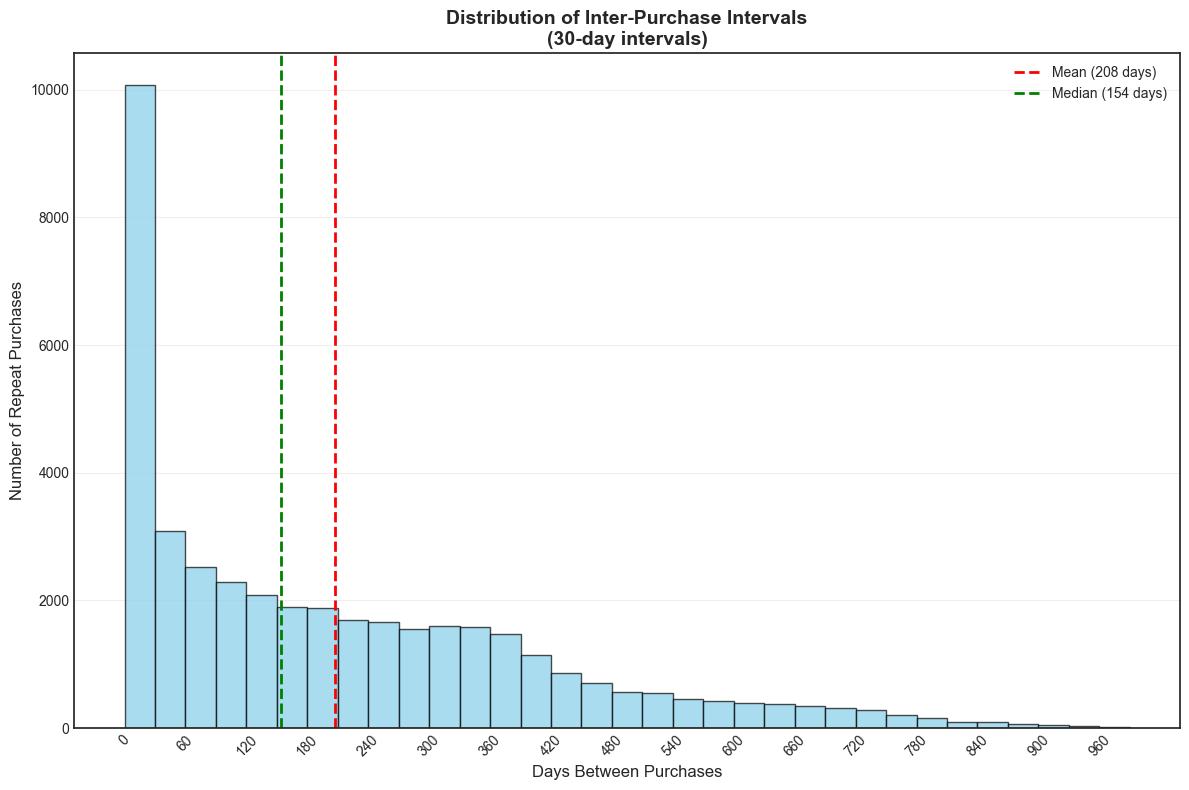


REPEAT CUSTOMER SUMMARY
Total customers (2022 onward): 115,991
Customers with repeat transactions: 25,085
Percentage of customers with repeat purchases: 21.6%

Total transactions (2022 onward): 156,580
Transactions from repeat customers: 65,674
Percentage of transactions from repeat customers: 41.9%

Average transactions per repeat customer: 2.6

MAXIMUM TIME BETWEEN TRANSACTIONS ANALYSIS
Maximum interval between transactions: 1043 days (2.9 years)
Client ID: 1734515

Transaction Details:
First Transaction (Earlier):
  - Folder Creation Date: 2022-02-09
  - Folder Value: $1,513.00
  - Folder ID: 10544

Second Transaction (Later):
  - Folder Creation Date: 2024-12-18
  - Folder Value: $64,680.80
  - Folder ID: 16372

Customer Profile:
  - Total transactions: 2
  - Total spend: $66,193.80
  - First booking date: 2022-02-09
  - Last booking date: 2024-12-18
  - Customer lifetime span: 1043 days

All Transactions for Client 1734515:
--------------------------------------------------------

In [117]:
# ================================
# 4. Cohort Analysis (2022-2024)
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==============================================================================
# STEP 0: Filter the Data to Include Only Clients Acquired from 2022 Onward
# ==============================================================================
# Convert the date columns to datetime.
merged_df['FirstBookingDate'] = pd.to_datetime(merged_df['FirstBookingDate'])
merged_df['LastBookingDate'] = pd.to_datetime(merged_df['LastBookingDate'])
merged_df['FolderCreationDate'] = pd.to_datetime(merged_df['FolderCreationDate'])

# Keep only records where the first booking occurred on or after January 1, 2022.
filtered_df = merged_df[merged_df['FirstBookingDate'] >= pd.to_datetime('2022-01-01')].copy()
#filtered_df = merged_df[merged_df['FolderConfirmationDate'] >= pd.to_datetime('2022-01-01')].copy()


# ==============================================================================
# STEP 1: Aggregate Transaction Data to the Client Level
# ==============================================================================
# Roll up transactions so that each client is represented once.
client_df = filtered_df.groupby('ClientID').agg({
    'FirstBookingDate': 'min',      # The earliest booking date is the acquisition date.
    'LastBookingDate': 'max',       # The most recent booking date.
    'FolderCreationDate': 'count',  # Count of transactions (frequency).
    'FolderValue': 'sum'            # Total spend across all transactions.
}).rename(columns={
    'FirstBookingDate': 'AcquisitionDate',
    'FolderCreationDate': 'TransactionCount',
    'FolderValue': 'TotalSpend'
}).reset_index()

# Calculate the average spend per transaction.
client_df['AvgSpend'] = client_df['TotalSpend'] / client_df['TransactionCount']

# Assign each client to a quarterly cohort based on their acquisition date.
client_df['AcquisitionCohort'] = client_df['AcquisitionDate'].dt.to_period('Q')

# ==============================================================================
# STEP 2: Frequency and Value Decomposition (Behavior Evolution)
# ==============================================================================
# For each acquisition cohort (quarter), calculate the average (mean and median) transaction count and total spend.
cohort_summary = client_df.groupby('AcquisitionCohort').agg({
    'TransactionCount': ['mean', 'median'],
    'TotalSpend': ['mean', 'median']
})
# Flatten the MultiIndex columns.
cohort_summary.columns = ['AOV', 'Median Order Value', 'Spend_Mean', 'Spend_Median']
cohort_summary = cohort_summary.reset_index()

print("Cohort Summary (Frequency & Value) for Cohorts from 2022 Onward:")
print(cohort_summary)

# ==============================================================================
# STEP 3: Repeat Purchase Behavior (Inter-Purchase Intervals)
# ==============================================================================
# Instead of using groupby apply (which can be slow on large datasets), we use a vectorized approach.
# First, sort the filtered dataframe by ClientID and FolderCreationDate.
filtered_df = filtered_df.sort_values(['ClientID', 'FolderCreationDate'])

# Compute the difference in FolderCreationDate for each client.
filtered_df['InterPurchaseInterval'] = filtered_df.groupby('ClientID')['FolderCreationDate'].diff().dt.days

# Drop the NaN values (which occur for clients with only one transaction).
intervals_series = filtered_df['InterPurchaseInterval'].dropna()

# Calculate mean and median
mean_interval = intervals_series.mean()
median_interval = intervals_series.median()

# Output overall summary statistics for inter-purchase intervals.
print("\nRepeat Purchase Behavior (Inter-Purchase Intervals) for Cohorts from 2022 Onward:")
print("Mean Interval (days):", mean_interval)
print("Median Interval (days):", median_interval)
print("Standard Deviation (days):", intervals_series.std())

# Create histogram with explicit bins and calculate proportions
plt.figure(figsize=(12, 8))

# Define explicit bin edges for better control
bin_edges = np.arange(0, 1001, 30)  # 30-day intervals from 0 to 1000 days
counts, bins, patches = plt.hist(intervals_series, bins=bin_edges, edgecolor='black', alpha=0.7, color='skyblue')

# Calculate total number of intervals for percentage calculations
total_intervals = len(intervals_series)

# Add vertical lines for mean and median
plt.axvline(x=mean_interval, color='r', linestyle='--', linewidth=2, 
           label=f'Mean ({mean_interval:.0f} days)')
plt.axvline(x=median_interval, color='g', linestyle='--', linewidth=2, 
           label=f'Median ({median_interval:.0f} days)')

plt.title("Distribution of Inter-Purchase Intervals\n(30-day intervals)", fontsize=14, fontweight='bold')
plt.xlabel("Days Between Purchases", fontsize=12)
plt.ylabel("Number of Repeat Purchases", fontsize=12)
plt.legend(fontsize=10)

# Set x-axis ticks at bin edges for clarity
x_ticks = np.arange(0, 1001, 60)  # Every 60 days for readability
plt.xticks(x_ticks, [f'{int(x)}' for x in x_ticks], rotation=45)

# Add grid for better readability
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# # Print summary of the first few bins for quantification
# print(f"\nBin Analysis (30-day intervals):")
# print(f"Total repeat purchases analyzed: {total_intervals:,}")
# print("\nTop interval bands:")
# for i in range(min(5, len(counts))):  # Show first 5 bins or fewer if less data
#     if counts[i] > 0:
#         bin_start = int(bins[i])
#         bin_end = int(bins[i+1])
#         percentage = (counts[i] / total_intervals) * 100
#         print(f"  {bin_start}-{bin_end} days: {int(counts[i]):,} purchases ({percentage:.1f}%)")

# # ==============================================================================
# # EXPLANATION: How Repeat Purchase Analysis Works
# # ==============================================================================
# print("\n" + "="*80)
# print("REPEAT PURCHASE ANALYSIS METHODOLOGY")
# print("="*80)
# print("""
# This analysis calculates inter-purchase intervals to understand customer repeat buying behavior:

# 1. DATA PREPARATION:
#    - Filter to clients acquired from 2022 onward (based on FirstBookingDate)
#    - Sort all transactions by ClientID and FolderCreationDate chronologically

# 2. INTERVAL CALCULATION:
#    - For each client, calculate the time difference between consecutive purchases
#    - Use pandas .diff() function to get days between each transaction and the previous one
#    - First transaction for each client results in NaN (no previous purchase) - these are excluded

# 3. ANALYSIS SCOPE:
#    - Only includes clients who made multiple purchases (repeat customers)
#    - Single-purchase clients don't contribute to interval analysis
#    - Each interval represents the gap between two consecutive bookings for the same client

# 4. INTERPRETATION:
#    - Mean interval: Average time between repeat purchases across all customers
#    - Median interval: Middle value, less affected by extreme outliers
#    - Distribution shows purchasing patterns (e.g., seasonal travelers vs frequent bookers)
#    - Shorter intervals suggest higher engagement and loyalty
#    - Longer intervals may indicate occasional/seasonal travel patterns

# 5. BUSINESS INSIGHTS:
#    - Helps identify optimal timing for marketing campaigns and follow-ups
#    - Reveals customer lifecycle patterns and retention opportunities
#    - Supports segmentation based on purchase frequency behavior
#    - Informs inventory and capacity planning based on repeat purchase cycles
# """)

# ==============================================================================
# STEP 4: Repeat Customer Analysis Summary
# ==============================================================================
# Calculate how many customers had repeat transactions
repeat_customers = client_df[client_df['TransactionCount'] > 1]
num_repeat_customers = len(repeat_customers)
total_customers = len(client_df)

# Calculate how many transactions this covers
repeat_transactions = repeat_customers['TransactionCount'].sum()
total_transactions = client_df['TransactionCount'].sum()

print("\n" + "="*80)
print("REPEAT CUSTOMER SUMMARY")
print("="*80)
print(f"Total customers (2022 onward): {total_customers:,}")
print(f"Customers with repeat transactions: {num_repeat_customers:,}")
print(f"Percentage of customers with repeat purchases: {(num_repeat_customers/total_customers)*100:.1f}%")
print(f"\nTotal transactions (2022 onward): {total_transactions:,}")
print(f"Transactions from repeat customers: {repeat_transactions:,}")
print(f"Percentage of transactions from repeat customers: {(repeat_transactions/total_transactions)*100:.1f}%")
print(f"\nAverage transactions per repeat customer: {repeat_transactions/num_repeat_customers:.1f}")

# ==============================================================================
# STEP 5: Maximum Time Between Transactions Analysis
# ==============================================================================
# Find the maximum inter-purchase interval and get details
max_interval_idx = filtered_df['InterPurchaseInterval'].idxmax()
max_interval_days = filtered_df.loc[max_interval_idx, 'InterPurchaseInterval']

# Get the client ID for the maximum interval
max_interval_client = filtered_df.loc[max_interval_idx, 'ClientID']

# Get all transactions for this client to find the two specific folders
client_transactions = filtered_df[filtered_df['ClientID'] == max_interval_client].sort_values('FolderCreationDate')

# Find the position of the transaction with max interval
max_interval_position = client_transactions.index.get_loc(max_interval_idx)

# Get the previous transaction (the one before the max interval)
previous_transaction = client_transactions.iloc[max_interval_position - 1]
current_transaction = client_transactions.iloc[max_interval_position]

print("\n" + "="*80)
print("MAXIMUM TIME BETWEEN TRANSACTIONS ANALYSIS")
print("="*80)
print(f"Maximum interval between transactions: {max_interval_days:.0f} days ({max_interval_days/365.25:.1f} years)")
print(f"Client ID: {max_interval_client}")
print(f"\nTransaction Details:")
print(f"First Transaction (Earlier):")
print(f"  - Folder Creation Date: {previous_transaction['FolderCreationDate'].strftime('%Y-%m-%d')}")
print(f"  - Folder Value: ${previous_transaction['FolderValue']:,.2f}")
if 'FolderID' in previous_transaction.index:
    print(f"  - Folder ID: {previous_transaction['FolderID']}")

print(f"\nSecond Transaction (Later):")
print(f"  - Folder Creation Date: {current_transaction['FolderCreationDate'].strftime('%Y-%m-%d')}")
print(f"  - Folder Value: ${current_transaction['FolderValue']:,.2f}")
if 'FolderID' in current_transaction.index:
    print(f"  - Folder ID: {current_transaction['FolderID']}")

print(f"\nCustomer Profile:")
print(f"  - Total transactions: {len(client_transactions)}")
print(f"  - Total spend: ${client_transactions['FolderValue'].sum():,.2f}")
print(f"  - First booking date: {client_transactions['FolderCreationDate'].min().strftime('%Y-%m-%d')}")
print(f"  - Last booking date: {client_transactions['FolderCreationDate'].max().strftime('%Y-%m-%d')}")
print(f"  - Customer lifetime span: {(client_transactions['FolderCreationDate'].max() - client_transactions['FolderCreationDate'].min()).days} days")

# Show all transactions for this customer for complete context
print(f"\nAll Transactions for Client {max_interval_client}:")
print("-" * 60)
for idx, transaction in client_transactions.iterrows():
    folder_id = transaction.get('FolderID', 'N/A')
    print(f"  {transaction['FolderCreationDate'].strftime('%Y-%m-%d')} | ${transaction['FolderValue']:>8,.2f} | Folder: {folder_id}")

# ==============================================================================
# STEP 6: Additional Repeat Customer Analysis
# ==============================================================================
# How many customers had repeat transactions (using ClientID to track customers)
print("\n" + "="*80)
print("ADDITIONAL REPEAT CUSTOMER ANALYSIS")
print("="*80)

# Count customers with repeat transactions
customers_with_repeats = client_df[client_df['TransactionCount'] > 1]['ClientID'].nunique()
total_unique_customers = client_df['ClientID'].nunique()

print(f"How many customers had repeat transactions:")
print(f"  - Customers with repeat transactions: {customers_with_repeats:,}")
print(f"  - Total unique customers: {total_unique_customers:,}")
print(f"  - Repeat customer rate: {(customers_with_repeats/total_unique_customers)*100:.1f}%")

# How many transactions does this cover?
transactions_from_repeat_customers = client_df[client_df['TransactionCount'] > 1]['TransactionCount'].sum()
total_all_transactions = client_df['TransactionCount'].sum()

print(f"\nHow many transactions does this cover:")
print(f"  - Transactions from repeat customers: {transactions_from_repeat_customers:,}")
print(f"  - Total transactions: {total_all_transactions:,}")
print(f"  - Percentage of transactions from repeat customers: {(transactions_from_repeat_customers/total_all_transactions)*100:.1f}%")

# Additional breakdown by transaction frequency
print(f"\nBreakdown by transaction frequency:")
transaction_frequency = client_df['TransactionCount'].value_counts().sort_index()
for freq, count in transaction_frequency.items():
    percentage = (count / total_unique_customers) * 100
    total_trans_for_freq = freq * count
    print(f"  - {freq} transaction{'s' if freq > 1 else ''}: {count:,} customers ({percentage:.1f}%) = {total_trans_for_freq:,} total transactions")



Insights:

A significant portion of customers make repeat purchases within 100 days. 
The gap between mean and median suggests some customers have very long intervals between purchases, pulling the average higher


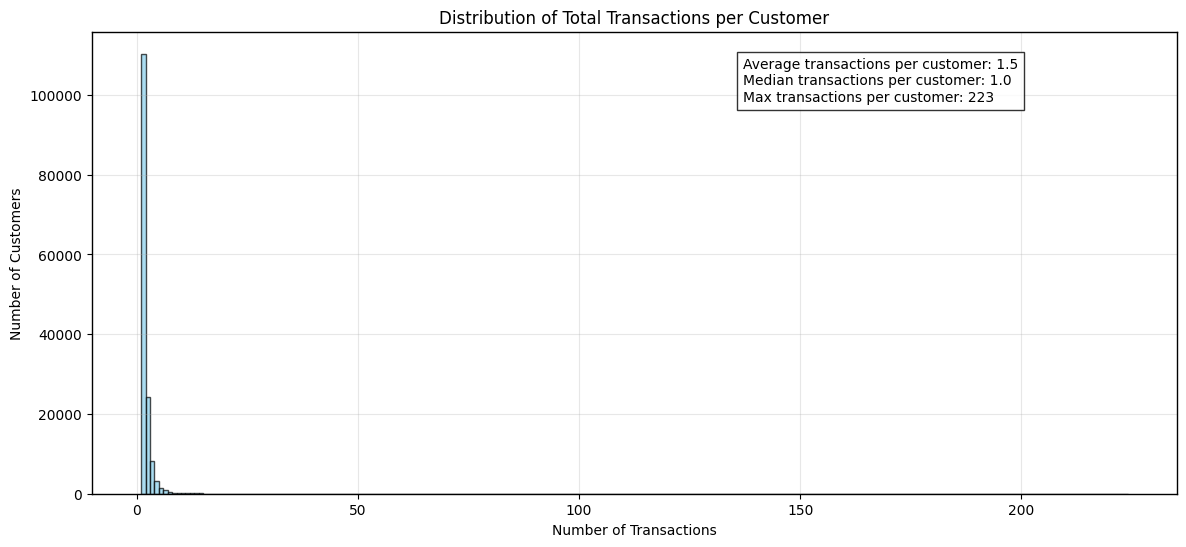


Transaction Distribution Summary:
Total Customers: 150285
Mean Transactions per Customer: 1.5
Median Transactions per Customer: 1.0

Customer with Most Transactions:
ClientID: 884978
Name: Sandra Elizabeth Fallows
Number of Transactions: 223
Total Value of Transactions: $1,048,472,775.74


In [74]:
# ================================
# 4. Cohort Analysis (2022-2024)
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==============================================================================
# STEP 0: Filter the Data to Include Only Clients Acquired from 2022 Onward
# ==============================================================================
# Convert the date columns to datetime.
merged_df['FirstBookingDate'] = pd.to_datetime(merged_df['FirstBookingDate'])
merged_df['LastBookingDate'] = pd.to_datetime(merged_df['LastBookingDate'])
merged_df['FolderCreationDate'] = pd.to_datetime(merged_df['FolderCreationDate'])

# Keep only records where the first booking occurred on or after January 1, 2022.
filtered_df = merged_df[merged_df['FolderConfirmationDate'] >= pd.to_datetime('2022-01-01')].copy()

# ==============================================================================
# STEP 1: Analyze Transaction Distribution per Customer
# ==============================================================================
# Count transactions per customer
transactions_per_customer = filtered_df.groupby('ClientID').size()

# Plot histogram of transactions per customer
fig = plt.figure(figsize=(14, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')
plt.hist(transactions_per_customer, bins=range(1, max(transactions_per_customer) + 2), 
         edgecolor='black',color='skyblue', alpha=0.7, rwidth=1.1)  # Increased rwidth from default 0.8 to 0.9
plt.title("Distribution of Total Transactions per Customer")
plt.xlabel("Number of Transactions")
plt.ylabel("Number of Customers")
plt.grid(True, alpha=0.3)

# Add black rectangle border with width 1
ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_color('black') 
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1) 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(1)

# Add summary statistics as text
plt.text(0.6, 0.85, 
         f'Average transactions per customer: {transactions_per_customer.mean():.1f}\n'
         f'Median transactions per customer: {transactions_per_customer.median():.1f}\n'
         f'Max transactions per customer: {transactions_per_customer.max()}',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

# Print summary statistics
print("\nTransaction Distribution Summary:")
print(f"Total Customers: {len(transactions_per_customer)}")
print(f"Mean Transactions per Customer: {transactions_per_customer.mean():.1f}")
print(f"Median Transactions per Customer: {transactions_per_customer.median():.1f}")

# Get details of customer with most transactions
max_trans_customer_id = transactions_per_customer.idxmax()
max_trans_customer_data = filtered_df[filtered_df['ClientID'] == max_trans_customer_id]
max_trans_customer = max_trans_customer_data.iloc[0]
total_value = max_trans_customer_data['TotalFolderValue'].sum()

print(f"\nCustomer with Most Transactions:")
print(f"ClientID: {max_trans_customer_id}")
print(f"Name: {max_trans_customer['FirstName']} {max_trans_customer['LastName']}")
print(f"Number of Transactions: {transactions_per_customer.max()}")
print(f"Total Value of Transactions: ${total_value:,.2f}")


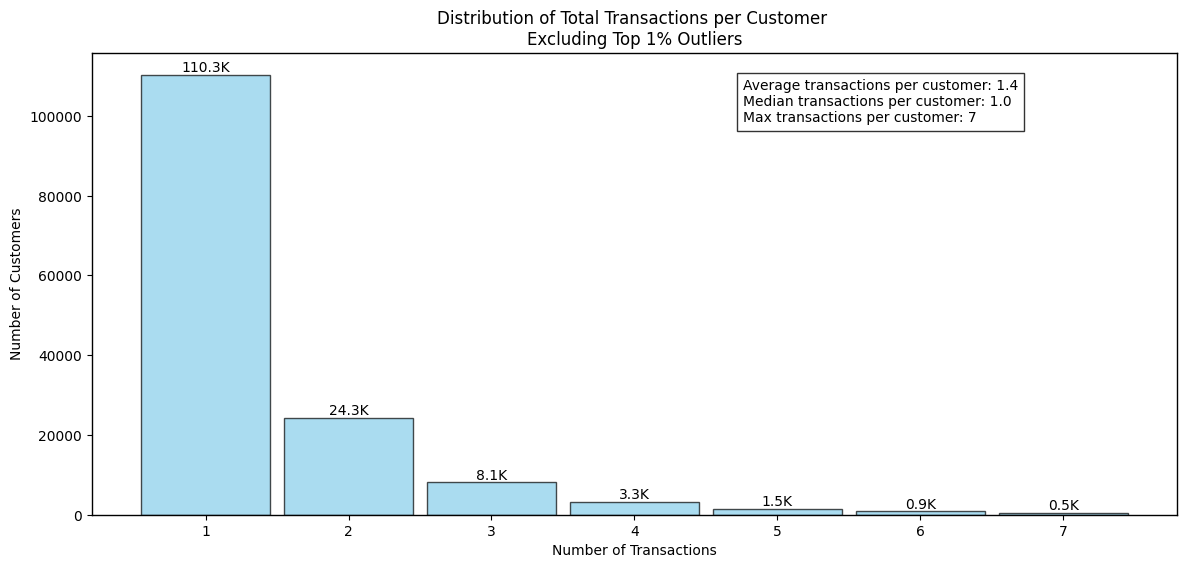


Transaction Distribution Summary (Excluding Outliers):
Total Customers: 148997
Mean Transactions per Customer: 1.4
Median Transactions per Customer: 1.0
Max Transactions by a Single Customer: 7

Outlier Summary (Top 1% of Customers):
Number of Outlier Customers: 1288
Mean Transactions for Outliers: 13.6
Median Transactions for Outliers: 10.0
Max Transactions by an Outlier: 223


In [75]:
# ================================
# 4. Cohort Analysis (2022-2024)
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==============================================================================
# STEP 0: Filter the Data to Include Only Clients Acquired from 2022 Onward
# ==============================================================================
# Convert the date columns to datetime.
merged_df['FirstBookingDate'] = pd.to_datetime(merged_df['FirstBookingDate'])
merged_df['LastBookingDate'] = pd.to_datetime(merged_df['LastBookingDate'])
merged_df['FolderCreationDate'] = pd.to_datetime(merged_df['FolderCreationDate'])

# Keep only records where the first booking occurred on or after January 1, 2022.
filtered_df = merged_df[merged_df['FolderConfirmationDate'] >= pd.to_datetime('2022-01-01')].copy()

# ==============================================================================
# STEP 1: Analyze Transaction Distribution per Customer
# ==============================================================================
# Count transactions per customer
transactions_per_customer = filtered_df.groupby('ClientID').size()

# Remove outliers (customers with extremely high transaction counts)
# Calculate 99th percentile as cutoff
cutoff = np.percentile(transactions_per_customer, 99)
transactions_per_customer_filtered = transactions_per_customer[transactions_per_customer <= cutoff]

# Plot histogram of transactions per customer
plt.figure(figsize=(14, 6))
ax = plt.gca()
ax.set_facecolor('white')
hist, bins, patches = plt.hist(transactions_per_customer_filtered, bins=range(1, int(cutoff) + 2),
                               color = 'skyblue', edgecolor='black', alpha=0.7, rwidth=0.9)
plt.title("Distribution of Total Transactions per Customer \nExcluding Top 1% Outliers")
plt.xlabel("Number of Transactions") 
plt.ylabel("Number of Customers")
#plt.grid(True, alpha=0.3)

# Center x-axis labels under bars
ax = plt.gca()
ax.set_xticks(bins[:-1] + 0.5)
ax.set_xticklabels(range(1, len(bins)))

# Add transaction count at top of each bar in K format
for i in range(len(hist)):
    plt.text(bins[i] + 0.5, hist[i],  # Position text at top of bar
             f'{hist[i]/1000:.1f}K',  # Convert count to K format
             ha='center', va='bottom')

# Add summary statistics as text
plt.text(0.6, 0.85, 
         f'Average transactions per customer: {transactions_per_customer_filtered.mean():.1f}\n'
         f'Median transactions per customer: {transactions_per_customer_filtered.median():.1f}\n'
         f'Max transactions per customer: {transactions_per_customer_filtered.max()}',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

# Add black rectangle border with width 1
ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_color('black') 
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1) 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(1)

plt.show()

# Print summary statistics
print("\nTransaction Distribution Summary (Excluding Outliers):")
print(f"Total Customers: {len(transactions_per_customer_filtered)}")
print(f"Mean Transactions per Customer: {transactions_per_customer_filtered.mean():.1f}")
print(f"Median Transactions per Customer: {transactions_per_customer_filtered.median():.1f}")
print(f"Max Transactions by a Single Customer: {transactions_per_customer_filtered.max()}")

# Print summary of outliers (top 1%)
outliers = transactions_per_customer[transactions_per_customer > cutoff]
print("\nOutlier Summary (Top 1% of Customers):")
print(f"Number of Outlier Customers: {len(outliers)}")
print(f"Mean Transactions for Outliers: {outliers.mean():.1f}")
print(f"Median Transactions for Outliers: {outliers.median():.1f}")
print(f"Max Transactions by an Outlier: {outliers.max()}")


C:\Users\DavidAirehrourTogeth\AppData\Local\Temp\ipykernel_47472\4154458217.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{int(x)}K' for x in xticks])


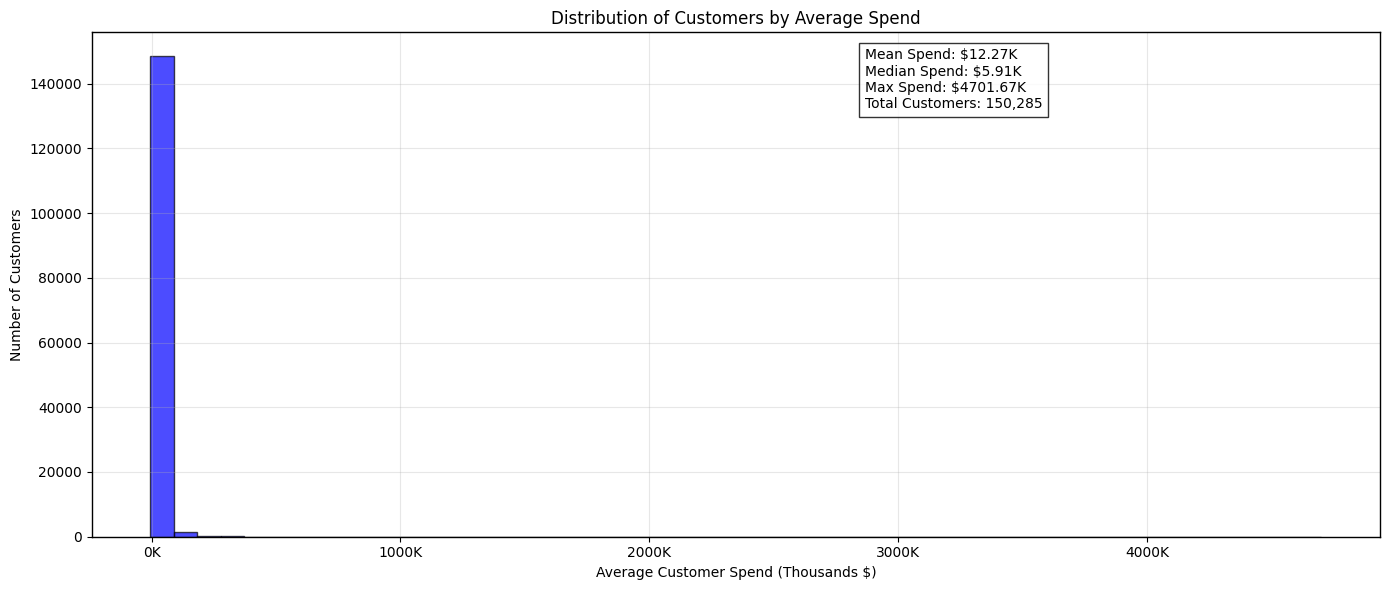

In [76]:
## Distribution of customers by total folder value ##

# Calculate average spend per customer (since TotalFolderValue may differ across transactions)
customer_avg_spend = merged_df.groupby('ClientID')['TotalFolderValue'].mean().reset_index()

# Convert to thousands for better readability
customer_avg_spend.loc[:,'TotalFolderValue_K'] = customer_avg_spend['TotalFolderValue'] / 1_000

# Create figure
plt.figure(figsize=(14, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

# Plot histogram in thousands
plt.hist(customer_avg_spend['TotalFolderValue_K'], bins=50,
         edgecolor='black', color='blue', alpha=0.7, rwidth=1.1)

# Set labels and title
plt.title("Distribution of Customers by Average Spend")
plt.xlabel("Average Customer Spend (Thousands $)")
plt.ylabel("Number of Customers")
plt.grid(True, alpha=0.3)

# Format x-axis labels to include K
ax = plt.gca()
xticks = ax.get_xticks()
ax.set_xticklabels([f'{int(x)}K' for x in xticks])

# Add black border
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1)

# Add summary statistics
plt.text(0.6, 0.85,
         f'Mean Spend: ${customer_avg_spend["TotalFolderValue"].mean()/1_000:.2f}K\n'
         f'Median Spend: ${customer_avg_spend["TotalFolderValue"].median()/1_000:.2f}K\n'
         f'Max Spend: ${customer_avg_spend["TotalFolderValue"].max()/1_000:.2f}K\n'
         f'Total Customers: {len(customer_avg_spend):,}',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()



Outlier Analysis:
Removed 1,503 customers (1.0% of total)
Outlier threshold: $456,207.84
Mean spend of removed outliers: $2,156,336.38


C:\Users\DavidAirehrourTogeth\AppData\Local\Temp\ipykernel_47472\2834535323.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_total_spend_filtered.loc[:,'TotalFolderValue_K'] = customer_total_spend_filtered['TotalFolderValue'] / 1_000
C:\Users\DavidAirehrourTogeth\AppData\Local\Temp\ipykernel_47472\2834535323.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{int(x)}K' for x in xticks])


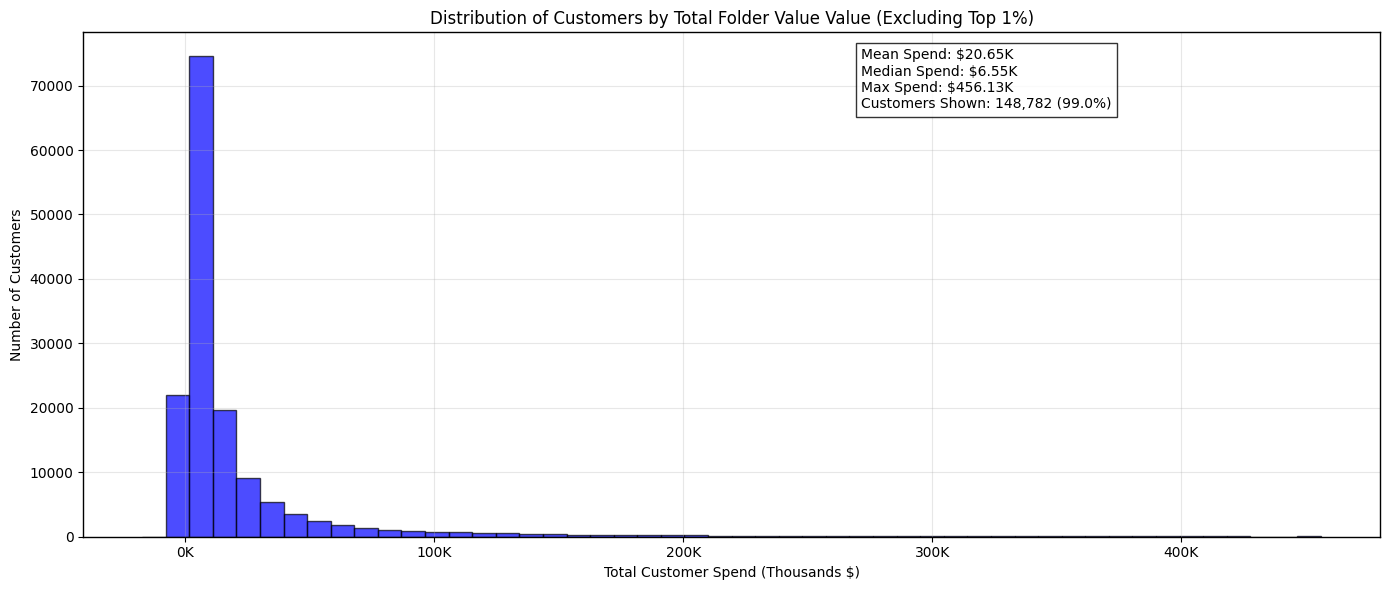

In [77]:
## Distribution of customers by total folder value and removing 1% outlier ##

# Calculate total spend per customer
customer_total_spend = merged_df.groupby('ClientID')['TotalFolderValue'].sum().reset_index()
# Calculate total spend per customer
customer_total_spend = merged_df.groupby('ClientID')['TotalFolderValue'].sum().reset_index()

# Calculate outlier threshold (99th percentile)
outlier_threshold = customer_total_spend['TotalFolderValue'].quantile(0.99)

# Filter out outliers
customer_total_spend_filtered = customer_total_spend[customer_total_spend['TotalFolderValue'] <= outlier_threshold]

# Print outlier information
outliers_removed = len(customer_total_spend) - len(customer_total_spend_filtered)
print(f"\nOutlier Analysis:")
print(f"Removed {outliers_removed:,} customers ({outliers_removed/len(customer_total_spend)*100:.1f}% of total)")
print(f"Outlier threshold: ${outlier_threshold:,.2f}")
print(f"Mean spend of removed outliers: ${customer_total_spend[customer_total_spend['TotalFolderValue'] > outlier_threshold]['TotalFolderValue'].mean():,.2f}")

# Convert to thousands for better readability 
customer_total_spend_filtered.loc[:,'TotalFolderValue_K'] = customer_total_spend_filtered['TotalFolderValue'] / 1_000

# Create figure
plt.figure(figsize=(14, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

# Plot histogram in thousands
plt.hist(customer_total_spend_filtered['TotalFolderValue_K'], bins=50,
         edgecolor='black', color='blue', alpha=0.7, rwidth=1.1)

# Set labels and title
plt.title("Distribution of Customers by Total Folder Value Value (Excluding Top 1%)")
plt.xlabel("Total Customer Spend (Thousands $)")
plt.ylabel("Number of Customers")
plt.grid(True, alpha=0.3)

# Format x-axis labels to include K
ax = plt.gca()
xticks = ax.get_xticks()
ax.set_xticklabels([f'{int(x)}K' for x in xticks])

# Add black border
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1)

# Add summary statistics for filtered data
plt.text(0.6, 0.85,
         f'Mean Spend: ${customer_total_spend_filtered["TotalFolderValue"].mean()/1_000:.2f}K\n'
         f'Median Spend: ${customer_total_spend_filtered["TotalFolderValue"].median()/1_000:.2f}K\n'
         f'Max Spend: ${customer_total_spend_filtered["TotalFolderValue"].max()/1_000:.2f}K\n'
         f'Customers Shown: {len(customer_total_spend_filtered):,} ({len(customer_total_spend_filtered)/len(customer_total_spend)*100:.1f}%)',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


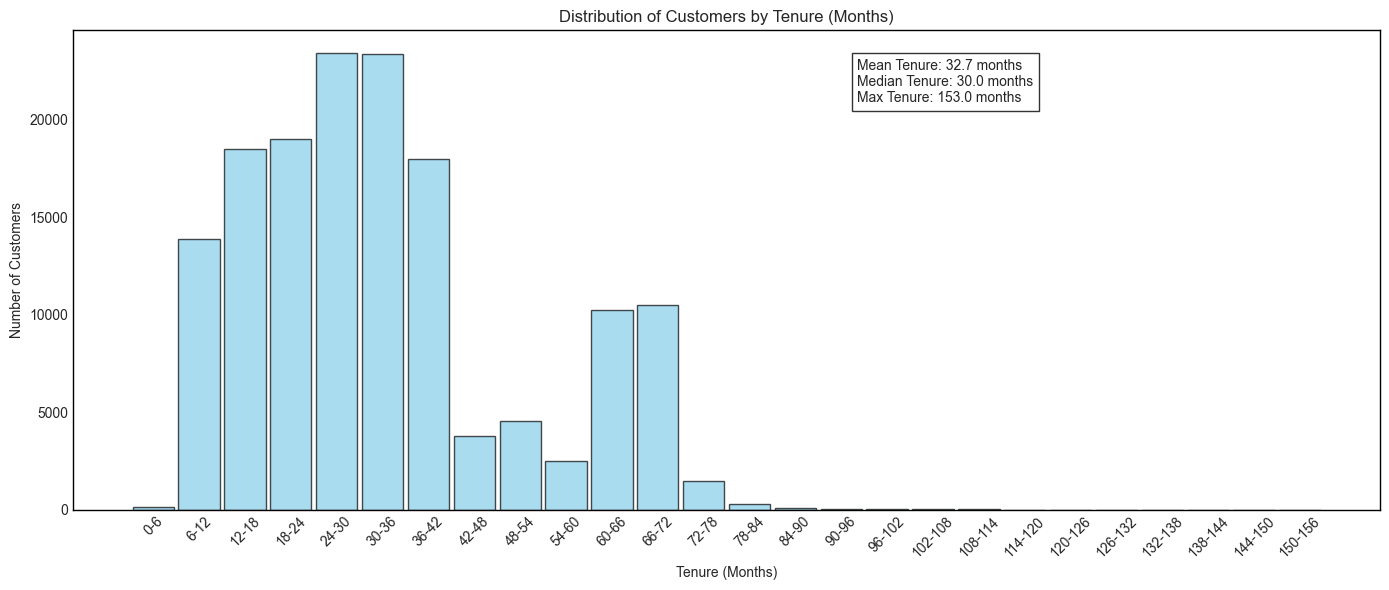


Customer Tenure Summary Statistics:
Total Customers: 150,285
Mean Tenure: 32.7 months
Median Tenure: 30.0 months
Standard Deviation: 18.1 months
Min Tenure: 5.0 months
Max Tenure: 153.0 months

Tenure Quartiles (months):
25th percentile: 19.0
50th percentile: 30.0
75th percentile: 39.0

Tenure Distribution:
0-12 months: 16,740 customers (11.1%)
13-24 months: 38,445 customers (25.6%)
25-36 months: 47,499 customers (31.6%)
37-48 months: 18,579 customers (12.4%)
48+ months: 28,486 customers (19.0%)

Note on Distribution Total:
There are 536 customers (0.4%) with null tenure bands.
These represent customers with missing or invalid booking dates, accounting for the remaining percentage in the distribution.

CUSTOMER WITH LONGEST TENURE - DETAILED PROFILE

Basic Information:
Client ID: 573981
Name: Kevin Whiteside
Email: Not available
Profile Type: Head

Tenure Details:
First Known Booking Date: 2012-09-05
Tenure in Days: 4,649.0 days
Tenure in Months: 153.0 months
Tenure in Years: 12.7 yea

In [130]:
## Customer distribution by tenure 
# Since merged_df is at transaction level, we need to get the earliest FirstKnownBookingDate per customer
# to accurately calculate customer tenure
customer_first_booking = merged_df.groupby('ClientID')['FirstKnownBookingDate'].min().reset_index()

# Calculate customer tenure in months
extraction_date = pd.to_datetime('2025-05-29')
customer_first_booking['FirstKnownBookingDate'] = pd.to_datetime(customer_first_booking['FirstKnownBookingDate'])
customer_first_booking['tenure_months'] = ((extraction_date - customer_first_booking['FirstKnownBookingDate']).dt.days / 30.44).round()
customer_first_booking['tenure_days'] = (extraction_date - customer_first_booking['FirstKnownBookingDate']).dt.days

# Create tenure bands plot
plt.figure(figsize=(14, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

# Calculate bin width and edges for better interpretability
bin_width = 6  # 6 month bins
max_tenure = customer_first_booking['tenure_months'].max()
bins = np.arange(0, max_tenure + bin_width, bin_width)

# Plot histogram with defined bins
n, bins, patches = plt.hist(customer_first_booking['tenure_months'], bins=bins,
                          edgecolor='black', color='skyblue' , alpha=0.7, rwidth=0.9)

# Set labels and title
plt.title("Distribution of Customers by Tenure (Months)")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
#plt.grid(True, alpha=0.3)

# Format x-axis to show bin ranges
ax.set_xticks(bins[:-1] + bin_width/2)
ax.set_xticklabels([f'{int(b)}-{int(b+bin_width)}' for b in bins[:-1]], rotation=45)

# Add black rectangle border with width 1
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1)

# Add summary statistics as text
plt.text(0.6, 0.85,
         f'Mean Tenure: {customer_first_booking["tenure_months"].mean():.1f} months\n'
         f'Median Tenure: {customer_first_booking["tenure_months"].median():.1f} months\n'
         f'Max Tenure: {customer_first_booking["tenure_months"].max():.1f} months',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print detailed summary statistics
print("\nCustomer Tenure Summary Statistics:")
print(f"Total Customers: {len(customer_first_booking):,}")
print(f"Mean Tenure: {customer_first_booking['tenure_months'].mean():.1f} months")
print(f"Median Tenure: {customer_first_booking['tenure_months'].median():.1f} months")
print(f"Standard Deviation: {customer_first_booking['tenure_months'].std():.1f} months")
print(f"Min Tenure: {customer_first_booking['tenure_months'].min():.1f} months")
print(f"Max Tenure: {customer_first_booking['tenure_months'].max():.1f} months")

# Calculate and print tenure quartiles
quartiles = customer_first_booking['tenure_months'].quantile([0.25, 0.5, 0.75])
print("\nTenure Quartiles (months):")
print(f"25th percentile: {quartiles[0.25]:.1f}")
print(f"50th percentile: {quartiles[0.5]:.1f}")
print(f"75th percentile: {quartiles[0.75]:.1f}")

# Calculate and print tenure distribution
print("\nTenure Distribution:")
tenure_bins = [0, 12, 24, 36, 48, float('inf')]
tenure_labels = ['0-12 months', '13-24 months', '25-36 months', '37-48 months', '48+ months']
customer_first_booking['tenure_band'] = pd.cut(customer_first_booking['tenure_months'], 
                                             bins=tenure_bins, 
                                             labels=tenure_labels)
tenure_distribution = customer_first_booking['tenure_band'].value_counts().sort_index()
for band, count in tenure_distribution.items():
    print(f"{band}: {count:,} customers ({count/len(customer_first_booking)*100:.1f}%)")

# Check for missing/null values that could explain the 0.3% discrepancy
null_count = customer_first_booking['tenure_band'].isnull().sum()
print(f"\nNote on Distribution Total:")
print(f"There are {null_count:,} customers ({null_count/len(customer_first_booking)*100:.1f}%) with null tenure bands.")
print("These represent customers with missing or invalid booking dates, accounting for the remaining percentage in the distribution.")

# Find customer with longest tenure
longest_tenure_customer = customer_first_booking.loc[customer_first_booking['tenure_days'].idxmax()]
longest_tenure_client_id = longest_tenure_customer['ClientID']

# Get detailed information about the longest tenure customer from merged_df
longest_tenure_details = merged_df[merged_df['ClientID'] == longest_tenure_client_id].iloc[0]

# Calculate transaction count and total value for this customer
customer_transactions_summary = merged_df[merged_df['ClientID'] == longest_tenure_client_id].groupby('ClientID').agg({
    'FolderID': 'nunique',  # Count unique FolderIDs as TransactionCount
    'TotalFolderValue': 'first'  # Get the TotalFolderValue (should be same for all rows of this customer)
}).reset_index()

transaction_count = customer_transactions_summary['FolderID'].iloc[0]
total_value = customer_transactions_summary['TotalFolderValue'].iloc[0]

print("\n" + "="*60)
print("CUSTOMER WITH LONGEST TENURE - DETAILED PROFILE")
print("="*60)

print(f"\nBasic Information:")
print(f"Client ID: {longest_tenure_client_id}")
print(f"Name: {longest_tenure_details['FirstName']} {longest_tenure_details['LastName']}")
print(f"Email: {longest_tenure_details.get('Email', 'Not available')}")
print(f"Profile Type: {longest_tenure_details['ProfileType']}")

print(f"\nTenure Details:")
print(f"First Known Booking Date: {longest_tenure_customer['FirstKnownBookingDate'].strftime('%Y-%m-%d')}")
print(f"Tenure in Days: {longest_tenure_customer['tenure_days']:,} days")
print(f"Tenure in Months: {longest_tenure_customer['tenure_months']:.1f} months")
print(f"Tenure in Years: {longest_tenure_customer['tenure_days']/365.25:.1f} years")

print(f"\nDemographic Information:")
print(f"Age Band: {longest_tenure_details.get('age_band', 'Not available')}")
print(f"Country: {longest_tenure_details.get('Country', 'Not available')}")
print(f"City: {longest_tenure_details.get('City', 'Not available')}")

print(f"\nBooking & Value Information:")
print(f"Total Folder Value: ${total_value:,.2f}")
print(f"Total Transactions: {transaction_count:,}")
print(f"Average Transaction Value: ${total_value/transaction_count:,.2f}")

print(f"\nTravel Preferences:")
print(f"Value Segment: {longest_tenure_details.get('ValueSegment', 'Not available')}")
print(f"Customer Decile: {longest_tenure_details.get('CustomerDecile', 'Not available')}")
print(f"Curated Segments: {longest_tenure_details.get('CuratedSegments', 'Not available')}")
print(f"Travel Segments: {longest_tenure_details.get('TravelSegments', 'Not available')}")

print(f"\nService Preferences:")
print(f"Has Air: {'Yes' if longest_tenure_details.get('Has_Air', 0) == 1 else 'No'}")
print(f"Has Cruise: {'Yes' if longest_tenure_details.get('Has_Cruise', 0) == 1 else 'No'}")
print(f"Has Hotel: {'Yes' if longest_tenure_details.get('Has_Hotel', 0) == 1 else 'No'}")
print(f"Has Rail: {'Yes' if longest_tenure_details.get('Has_Rail', 0) == 1 else 'No'}")
print(f"Has Tour: {'Yes' if longest_tenure_details.get('Has_Tour', 0) == 1 else 'No'}")
print(f"Has Insurance: {'Yes' if longest_tenure_details.get('Has_Insurance', 0) == 1 else 'No'}")

print(f"\nEmail Marketing:")
print(f"Email Flag: {'Yes' if longest_tenure_details.get('EmailFlag', 0) == 1 else 'No'}")
print(f"MM Email Flag: {'Yes' if longest_tenure_details.get('MMEmailFlag', 0) == 1 else 'No'}")
print(f"HOOT Email Flag: {'Yes' if longest_tenure_details.get('HOOTEmailFlag', 0) == 1 else 'No'}")

# Get all transactions for this customer to show booking history
customer_transactions = merged_df[merged_df['ClientID'] == longest_tenure_client_id][
    ['FolderID', 'FolderValue', 'FolderConfirmationDate', 'FolderStatus', 'SegmentsBooked']
].drop_duplicates().sort_values('FolderConfirmationDate')

print(f"\nBooking History ({len(customer_transactions)} transactions):")
print("-" * 80)
for _, transaction in customer_transactions.head(10).iterrows():  # Show first 10 transactions
    print(f"Date: {transaction['FolderConfirmationDate']} | "
          f"Value: ${transaction['FolderValue']:,.2f} | "
          f"Status: {transaction['FolderStatus']} | "
          f"Segments: {transaction['SegmentsBooked']}")

if len(customer_transactions) > 10:
    print(f"... and {len(customer_transactions) - 10} more transactions")

print("="*60)


In [79]:
# Display transactions with same ClientID and their TotalFolderValue
transaction_df[transaction_df.duplicated(subset=['ClientID'], keep=False)][['ClientID', 'TotalFolderValue', 
                                                                            'FolderValue','FolderConfirmationDate']].sort_values('ClientID').head(10)

,ClientID,TotalFolderValue,FolderValue,FolderConfirmationDate
159376,9124,32210.04,5149.16,2024-06-18
477241,9124,56510.12,51360.96,2023-04-28
647889,19197,233025.82,395.15,2022-09-21
647888,19197,233025.82,97933.46,2022-02-02
726304,23308,39120.88,13783.06,2022-07-19
726303,23308,39120.88,25337.82,2023-08-24
268143,23487,91990.11,14165.38,2022-11-22
268144,23487,91990.11,40941.46,2023-07-31
324584,23487,119062.89,63956.05,2024-02-01
382849,27976,7499.46,2497.31,2024-09-10


Repertoire Analysis

Segment Counts:
{'Air': 134274, 'Cruise': 11559, 'Hotel': 60914, 'Rail': 4533, 'Tour': 8032}

Segment Percentages:
{'Air': 89.34624213993413, 'Cruise': 7.691386365904782, 'Hotel': 40.53232192168213, 'Rail': 3.01626908873141, 'Tour': 5.3445120936886585}


C:\Users\DavidAirehrourTogeth\AppData\Local\Temp\ipykernel_47472\4175347394.py:62: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')
C:\Users\DavidAirehrourTogeth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_core.py:1478: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


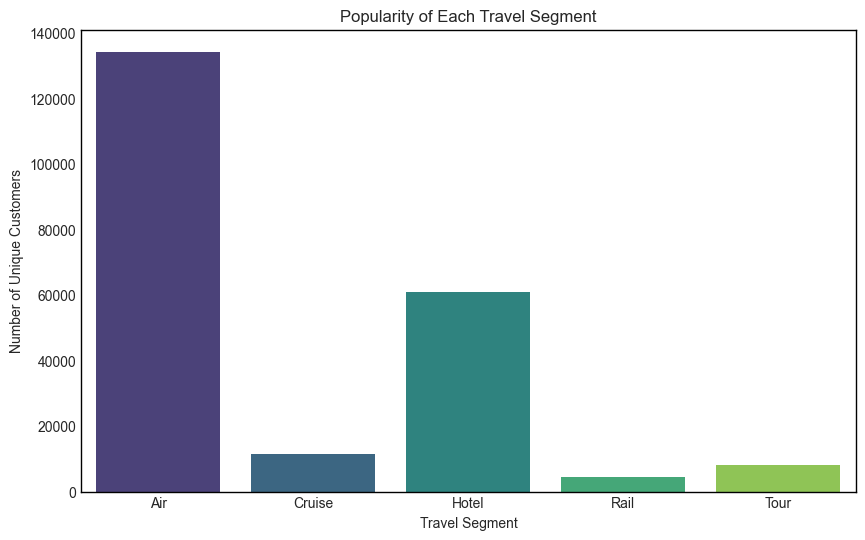

C:\Users\DavidAirehrourTogeth\AppData\Local\Temp\ipykernel_47472\4175347394.py:91: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '89.34624213993413' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  co_occurrence_pct.iloc[i,j] = (co_occurrence.iloc[i,j] / total_customers) * 100
C:\Users\DavidAirehrourTogeth\AppData\Local\Temp\ipykernel_47472\4175347394.py:91: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.830156036863293' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  co_occurrence_pct.iloc[i,j] = (co_occurrence.iloc[i,j] / total_customers) * 100
C:\Users\DavidAirehrourTogeth\AppData\Local\Temp\ipykernel_47472\4175347394.py:91: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pan

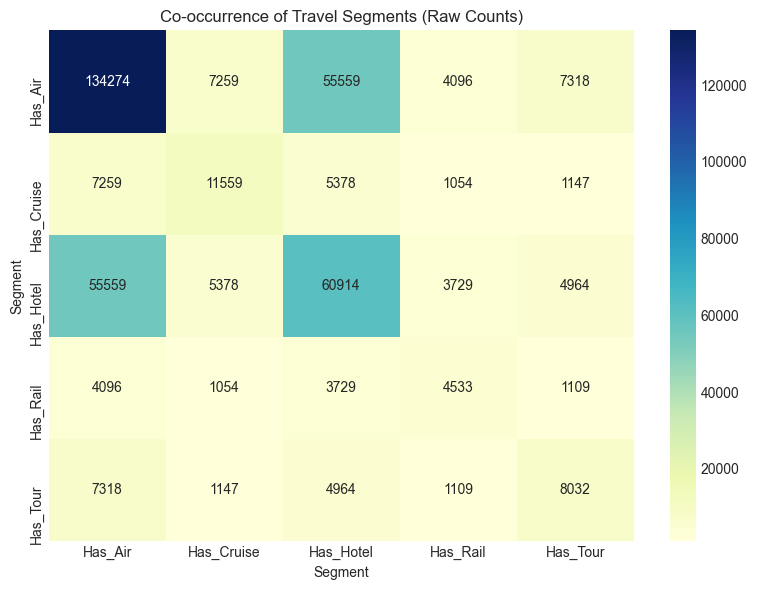

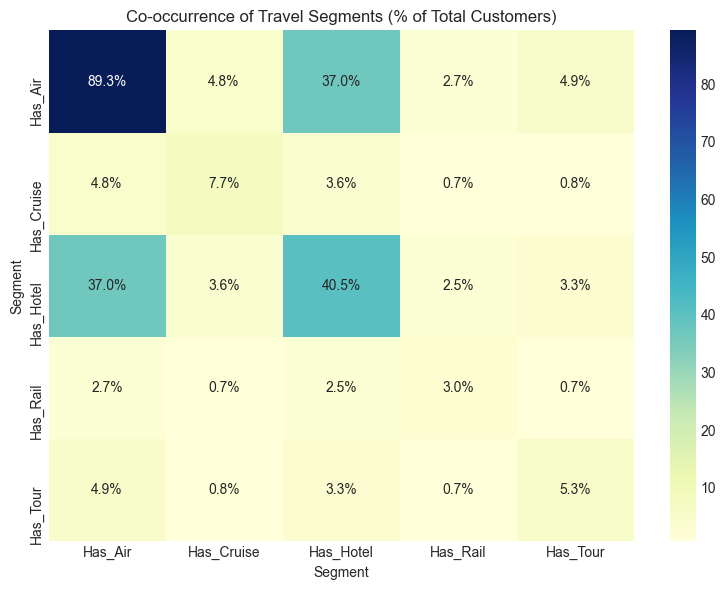


Most Common Segment Combinations:
     Segment1    Segment2    Count
1     Has_Air   Has_Hotel  55559.0
3     Has_Air    Has_Tour   7318.0
0     Has_Air  Has_Cruise   7259.0
4  Has_Cruise   Has_Hotel   5378.0
8   Has_Hotel    Has_Tour   4964.0
2     Has_Air    Has_Rail   4096.0
7   Has_Hotel    Has_Rail   3729.0
6  Has_Cruise    Has_Tour   1147.0
9    Has_Rail    Has_Tour   1109.0
5  Has_Cruise    Has_Rail   1054.0


C:\Users\DavidAirehrourTogeth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_core.py:1478: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


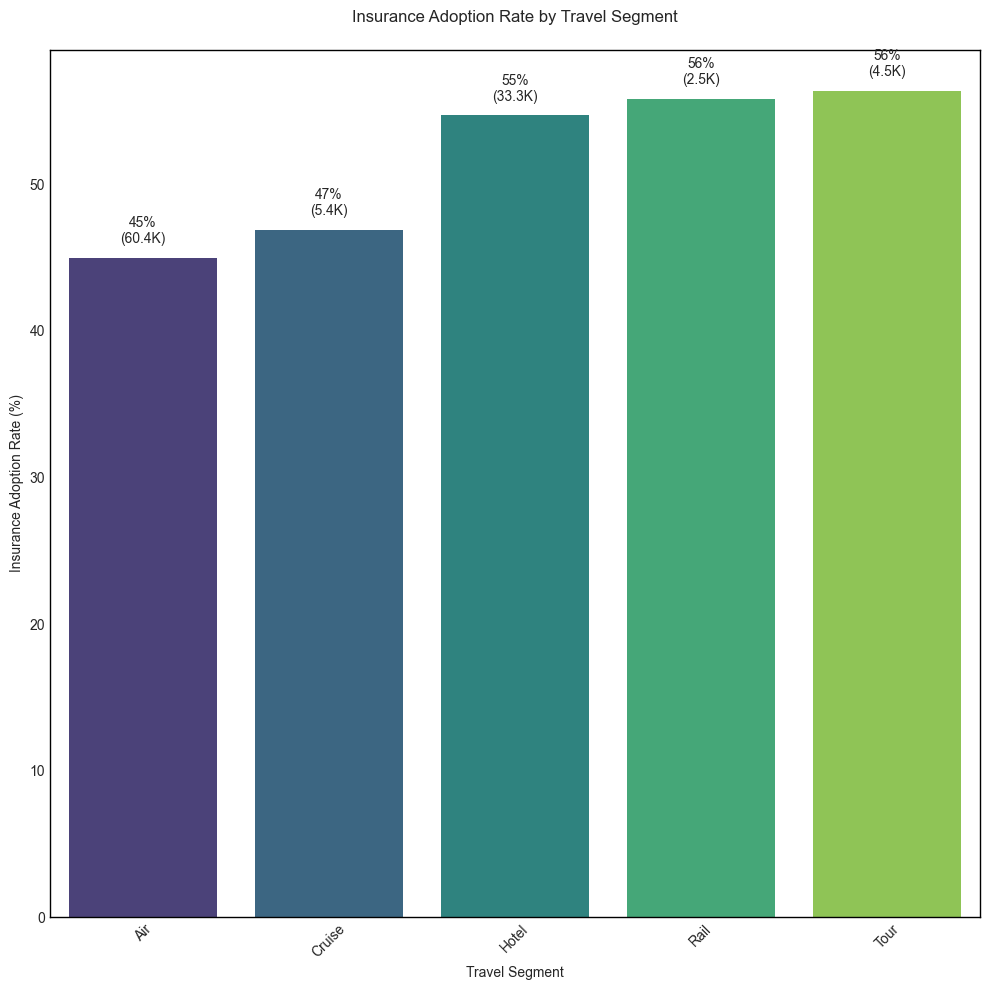


Detailed Insurance Adoption by Segment:

Air:
Total customers: 134274%
Customers with insurance: 60405
Insurance adoption rate: 45%

Cruise:
Total customers: 11559%
Customers with insurance: 5422
Insurance adoption rate: 47%

Hotel:
Total customers: 60914%
Customers with insurance: 33315
Insurance adoption rate: 55%

Rail:
Total customers: 4533%
Customers with insurance: 2531
Insurance adoption rate: 56%

Tour:
Total customers: 8032%
Customers with insurance: 4526
Insurance adoption rate: 56%


In [80]:
# ================================
# 6. Repertoire Analysis
# ================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# 1. Curate Segments from SegmentsBooked
# -------------------------------
# Allowed segments (in the desired order). "Insurance" is omitted.
allowed_segments = ["Air", "Cruise", "Hotel", "Rail", "Tour"]

def curate_segments(x):
    """
    Splits the SegmentsBooked string by the delimiter, trims whitespace, and
    retains only the allowed segments (ignoring case). Returns the curated segments
    as a semicolon-separated string in the predefined order.
    """
    if not isinstance(x, str):
        return ""
    # Split by ';' and strip extra whitespace
    segments = [seg.strip() for seg in x.split(';')]
    # Keep only allowed segments (ignoring case) and in the order of allowed_segments.
    curated = [seg for seg in allowed_segments if any(seg.lower() == s.lower() for s in segments)]
    return ";".join(curated)

# Create a new column with the curated segments.
merged_df['CuratedSegments'] = merged_df['SegmentsBooked'].apply(curate_segments)

# -------------------------------
# 2. Create Binary Indicator Columns for Each Allowed Segment and Insurance
# -------------------------------
# For each allowed segment and insurance, create a column indicating whether the customer has that segment.
for seg in allowed_segments + ["Insurance"]:
    col_name = f"Has_{seg}"
    merged_df[col_name] = merged_df['SegmentsBooked'].apply(lambda x: 1 if isinstance(x, str) and seg in x.split(';') else 0)

# -------------------------------
# 3. Compute Segment Popularity Metrics
# -------------------------------
# Get unique customers to avoid counting duplicates
unique_customers = merged_df.drop_duplicates(subset=['ClientID'])
total_customers = len(unique_customers)

# Calculate the count and percentage of unique customers booking each segment
segment_counts = {seg: unique_customers[f"Has_{seg}"].sum() for seg in allowed_segments}
segment_percentages = {seg: (unique_customers[f"Has_{seg}"].sum() / total_customers) * 100 for seg in allowed_segments}

print("Segment Counts:")
print(segment_counts)
print("\nSegment Percentages:")
print(segment_percentages)

# -------------------------------
# 4. Visualizations: Segment Popularity and Co-occurrence
# -------------------------------

# Set style to white background
plt.style.use('seaborn-white')

# 4.1 Bar Plot: Popularity of Each Travel Segment
fig, ax = plt.subplots(figsize=(10,6))
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

sns.barplot(x=list(segment_counts.keys()), y=list(segment_counts.values()), palette='viridis', ax=ax)
plt.title('Popularity of Each Travel Segment')
plt.xlabel('Travel Segment')
plt.ylabel('Number of Unique Customers')

# Add black border around plot
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1)

plt.show()

# 4.2 Create a Co-occurrence Matrix for the Segments
# Use the binary indicator columns to calculate how often pairs of segments occur together
# Using unique customers only
binary_df = unique_customers[[f"Has_{seg}" for seg in allowed_segments]]
co_occurrence = binary_df.T.dot(binary_df)

# Create percentage co-occurrence matrix
co_occurrence_pct = co_occurrence.copy()
for i in range(len(allowed_segments)):
    for j in range(len(allowed_segments)):
        co_occurrence_pct.iloc[i,j] = (co_occurrence.iloc[i,j] / total_customers) * 100

# Plot raw counts heatmap
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

sns.heatmap(co_occurrence, annot=True, fmt="d", cmap='YlGnBu', ax=ax)
plt.title('Co-occurrence of Travel Segments (Raw Counts)')
plt.xlabel('Segment')
plt.ylabel('Segment')

# Add black border
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1)

plt.tight_layout()
plt.show()

# Plot percentage heatmap
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

sns.heatmap(co_occurrence_pct, annot=True, fmt=".1f", cmap='YlGnBu', ax=ax)
plt.title('Co-occurrence of Travel Segments (% of Total Customers)')
plt.xlabel('Segment')
plt.ylabel('Segment')

# Add % symbol to annotations
for t in ax.texts:
    t.set_text(t.get_text() + '%')

# Add black border
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1)

plt.tight_layout()
plt.show()

# 4.3 Additional Analysis: Most Common Segment Combinations
# Extract the upper-triangle (excluding the diagonal) of the co-occurrence matrix,
# which shows counts for each unique segment pair.
mask = np.triu(np.ones(co_occurrence.shape), k=1).astype(bool)
co_occurrence_upper = co_occurrence.where(mask)
co_occurrence_unstacked = co_occurrence_upper.stack().reset_index()
co_occurrence_unstacked.columns = ['Segment1', 'Segment2', 'Count']
co_occurrence_unstacked = co_occurrence_unstacked.sort_values(by='Count', ascending=False)
print("\nMost Common Segment Combinations:")
print(co_occurrence_unstacked)

# -------------------------------
# 5. Insurance Analysis
# -------------------------------
# Calculate insurance adoption rate for each segment
insurance_by_segment = {}
for seg in allowed_segments:
    segment_customers = unique_customers[unique_customers[f'Has_{seg}'] == 1]
    total_segment_customers = len(segment_customers)
    if total_segment_customers > 0:
        insurance_rate = (segment_customers['Has_Insurance'].sum() / total_segment_customers) * 100
        insurance_by_segment[seg] = {
            'total_customers': total_segment_customers,
            'with_insurance': segment_customers['Has_Insurance'].sum(),
            'insurance_rate': insurance_rate
        }

# Visualize insurance adoption by segment
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

segments = list(insurance_by_segment.keys())
insurance_rates = [insurance_by_segment[seg]['insurance_rate'] for seg in segments]

sns.barplot(x=segments, y=insurance_rates, palette='viridis', ax=ax)
plt.title('Insurance Adoption Rate by Travel Segment', pad=20)  
plt.xlabel('Travel Segment')
plt.ylabel('Insurance Adoption Rate (%)')
plt.xticks(rotation=45)

# Add value labels on top of each bar with both percentage and count in thousands
for i, v in enumerate(insurance_rates):
    customers_with_insurance = insurance_by_segment[segments[i]]['with_insurance']
    plt.text(i, v + 1, f'{v:.0f}%\n({customers_with_insurance/1000:.1f}K)', fontsize=10, ha='center')

# Add black border
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1)

plt.tight_layout()
plt.show()

print("\nDetailed Insurance Adoption by Segment:")
for seg, stats in insurance_by_segment.items():
    print(f"\n{seg}:")
    print(f"Total customers: {stats['total_customers']:.0f}%")
    print(f"Customers with insurance: {stats['with_insurance']}")
    print(f"Insurance adoption rate: {stats['insurance_rate']:.0f}%")


In [81]:
# ================================
# 6. Repertoire Analysis
# ================================

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import squarify  # For treemap visualization

# -------------------------------
# 1. Define Segments and Helper Functions
# -------------------------------
allowed_segments = ["Air", "Cruise", "Hotel", "Rail", "Tour"]

def curate_segments(x):
    """
    Splits the SegmentsBooked string by the delimiter, trims whitespace, and
    retains only the allowed segments (ignoring case). Returns the curated segments
    as a semicolon-separated string in the predefined order.
    """
    if not isinstance(x, str):
        return ""
    segments = [seg.strip() for seg in x.split(';')]
    curated = [seg for seg in allowed_segments if any(seg.lower() == s.lower() for s in segments)]
    return ";".join(curated)

# Create curated segments column
merged_df['CuratedSegments'] = merged_df['SegmentsBooked'].apply(curate_segments)

# -------------------------------
# 2. Create Binary Indicators
# -------------------------------
for seg in allowed_segments:
    col_name = f"Has_{seg}"
    merged_df[col_name] = merged_df['SegmentsBooked'].apply(lambda x: 1 if isinstance(x, str) and seg in x.split(';') else 0)

# Get unique customers
unique_customers = merged_df.drop_duplicates(subset=['ClientID'])

# -------------------------------
# 3. Generate Mutually Exclusive Segment Combinations
# -------------------------------
all_combinations = []

# Get all possible combinations of segments
for r in range(1, len(allowed_segments) + 1):
    for combo in combinations(allowed_segments, r):
        # For each combination, identify customers who have EXACTLY these segments
        # This means they have all segments in combo but NO OTHER segments
        combo_cols = [f'Has_{seg}' for seg in combo]
        other_cols = [f'Has_{seg}' for seg in allowed_segments if seg not in combo]
        
        # Customers who have all segments in the combo
        has_combo = unique_customers[combo_cols].all(axis=1)
        # Customers who don't have any other segments
        no_others = ~unique_customers[other_cols].any(axis=1)
        # Combine conditions
        exact_combo = has_combo & no_others
        
        count = exact_combo.sum()
        percentage = (count / len(unique_customers)) * 100
        
        all_combinations.append({
            'Segments': ' + '.join(combo),
            'Number_of_Segments': len(combo),
            'Customer_Count': count,
            'Percentage': percentage
        })

# Create and format dataframe
combinations_df = pd.DataFrame(all_combinations)
combinations_df = combinations_df.sort_values(['Number_of_Segments', 'Customer_Count'], 
                                           ascending=[True, False])
combinations_df['Percentage'] = combinations_df['Percentage'].round(2)

# Display styled dataframe
styled_df = combinations_df.style\
    .format({'Percentage': '{:.2f}%'})\
    .set_properties(**{'text-align': 'left'})\
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'left')]},
        {'selector': '', 'props': [('border', '1px solid black')]}
    ])

display(combinations_df.sort_values('Customer_Count', ascending=False).style\
    .format({'Percentage': '{:.2f}%'})\
    .set_properties(**{'text-align': 'left'})\
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'left')]},
        {'selector': '', 'props': [('border', '1px solid black')]}
    ]))


,Segments,Number_of_Segments,Customer_Count,Percentage
0,Air,1,73804,49.11%
6,Air + Hotel,2,44652,29.71%
2,Hotel,1,4785,3.18%
1,Cruise,1,4097,2.73%
15,Air + Cruise + Hotel,3,3646,2.43%
19,Air + Hotel + Tour,3,3224,2.15%
8,Air + Tour,2,2264,1.51%
18,Air + Hotel + Rail,3,1845,1.23%
5,Air + Cruise,2,1778,1.18%
25,Air + Cruise + Hotel + Rail,4,657,0.44%


In [82]:
import pandas as pd

# ==============================================================================
# Travel Group Context Analysis - Multiple Segments per Client - Latest
# ==============================================================================

def extract_ages(age_string):
    """
    Extract ages from semicolon-delimited string and convert to numbers
    Returns empty list if string is null/empty
    """
    if pd.isna(age_string) or age_string == '':
        return []
    
    try:
        ages = [int(age.strip()) for age in age_string.split(';') if age.strip()]
        return ages
    except:
        return []

def categorize_travel_group(row):
    """
    Categorize a single transaction into travel groups based on PaxNumber and AgeOfOtherTravellers
    Returns a list of segments that apply to this transaction
    """
    segments = []
    
    try:
        pax_number = float(row['PaxNumber'])
    except:
        pax_number = 1
        
    ages = extract_ages(row['AgeOfOtherTravellers'])
    
    if pd.isna(pax_number) or pax_number == 1:
        segments.append('Solo Travelers')
        return segments
    
    # Check for couples - defined as exactly 2 travelers where either:
    # 1. No age data is available (not ages), or
    # 2. Only one age is recorded and that person is an adult (>18)
    if pax_number == 2:
        if not ages or (len(ages) == 1 and ages[0] > 18):
            segments.append('Couple Travelers')
    
    if pax_number >= 2 and ages:
        has_children = any(age < 18 for age in ages)
        has_adults = any(age >= 18 for age in ages)
        if has_children and has_adults:
            segments.append('Family Travelers')
    
    # if pax_number > 2 and ages and all(age >= 18 for age in ages):
    #     segments.append('Friends & Family')
        
    # Check for group travelers:
    # - Must have 10 or more travellers (pax_number >= 10)
    # - Either no age data available (not ages) OR all travelers are adults (age >= 18)
    # This identifies large adult groups like corporate/business groups or tour groups
    if pax_number >= 10:
        if not ages or all(age >= 18 for age in ages):
            segments.append('Group Travelers')
    if not segments:
        segments.append('No Group') #Solo Travelers'
        
    return segments

# Ensure PaxNumber is numeric
merged_df['PaxNumber'] = pd.to_numeric(merged_df['PaxNumber'], errors='coerce')

# Create transaction-level segments
merged_df['TravelSegments'] = merged_df.apply(categorize_travel_group, axis=1)

# Create client-level aggregation
client_segments = {}
client_destinations = {}
client_transactions = {}

for _, row in merged_df.iterrows():
    client_id = row['ClientID']
    segments = row['TravelSegments']
    destination = row['DestinationRegion']
    
    if client_id not in client_segments:
        client_segments[client_id] = set()
        client_destinations[client_id] = set()
        client_transactions[client_id] = 0
    
    client_segments[client_id].update(segments)
    if pd.notna(destination):
        client_destinations[client_id].add(destination)
    client_transactions[client_id] += 1

# Total counts for normalization
total_customers = len(client_segments)
total_transactions = sum(client_transactions.values())

# 1. Segment Combination Summary
segment_combinations = pd.Series([tuple(sorted(segments)) for segments in client_segments.values()])
combination_counts = segment_combinations.value_counts()

combination_data = []
for i, (combination, count) in enumerate(combination_counts.items(), 1):
    segments_str = ' + '.join(combination)
    percentage = count / total_customers * 100
    trans_count = sum(client_transactions[cid] for cid, segs in client_segments.items() 
                     if tuple(sorted(segs)) == combination)
    trans_percentage = trans_count / total_transactions * 100
    combination_data.append([
        i, segments_str, count, round(percentage, 2), trans_count, round(trans_percentage, 2)
    ])

combination_df = pd.DataFrame(
    combination_data,
    columns=['Pattern #', 'Segment Combination', 'Customer Count', 'Percentage (%)', 
             'Transaction Count', 'Trans. Percentage (%)']
)

# 2. Individual Segment Totals
segment_totals = {}
segment_transaction_totals = {}
for client_id, segments in client_segments.items():
    for segment in segments:
        segment_totals[segment] = segment_totals.get(segment, 0) + 1
        segment_transaction_totals[segment] = segment_transaction_totals.get(segment, 0) + client_transactions[client_id]

segment_data = []
for segment in sorted(segment_totals.keys()):
    count = segment_totals[segment]
    percentage = count / total_customers * 100
    trans_count = segment_transaction_totals[segment]
    trans_percentage = trans_count / total_transactions * 100
    segment_data.append([
        segment, count, round(percentage, 2), trans_count, round(trans_percentage, 2)
    ])

segment_totals_df = pd.DataFrame(
    segment_data,
    columns=['Segment', 'Customer Count', 'Percentage (%)', 'Transaction Count', 'Trans. Percentage (%)']
)

# 3. Top Destinations by Segment
destination_data = []
for segment in segment_totals.keys():
    segment_client_ids = [cid for cid, segs in client_segments.items() if segment in segs]
    segment_destinations = []
    for cid in segment_client_ids:
        segment_destinations.extend(client_destinations[cid])
    
    if segment_destinations:
        top_destinations = pd.Series(segment_destinations).value_counts().head(3)
        for rank, (dest, count) in enumerate(top_destinations.items(), 1):
            destination_data.append([segment, rank, dest, count])

destination_df = pd.DataFrame(
    destination_data,
    columns=['Segment', 'Rank', 'Destination', 'Bookings']
)

# Combine into a single DataFrame with section headers
output_df = pd.DataFrame()

# Add Segment Combination Summary
header_combination = pd.DataFrame([['Segment Combination Summary'] + [''] * (len(combination_df.columns) - 1)], 
                                  columns=combination_df.columns)
output_df = pd.concat([output_df, header_combination, combination_df], ignore_index=True)

# Add a blank row
blank_row = pd.DataFrame([[''] * len(combination_df.columns)], columns=combination_df.columns)
output_df = pd.concat([output_df, blank_row], ignore_index=True)

# Add Individual Segment Totals
header_segment = pd.DataFrame([['Individual Segment Totals'] + [''] * (len(segment_totals_df.columns) - 1)], 
                              columns=segment_totals_df.columns)
output_df = pd.concat([output_df, header_segment, segment_totals_df], ignore_index=True)

# Add a blank row
blank_row = pd.DataFrame([[''] * len(segment_totals_df.columns)], columns=segment_totals_df.columns)
output_df = pd.concat([output_df, blank_row], ignore_index=True)

# Add Top Destinations by Segment
header_destination = pd.DataFrame([['Top Destinations by Segment'] + [''] * (len(destination_df.columns) - 1)], 
                                  columns=destination_df.columns)
output_df = pd.concat([output_df, header_destination, destination_df], ignore_index=True)

# Save to a single CSV file
# output_df.to_csv('d:downloads/travel_group_analysis2.csv', index=False)
# print("All outputs saved to 'travel_group_analysis2.csv'")
output_df.head(10)

"""
Travel Group Definitions:

1. Solo Travelers
   - Single traveler bookings (PaxNumber = 1)
   - Default category when passenger number is missing

2. Couple Travelers  
   - Exactly 2 travelers
   - Either no age data available OR
   - One recorded age is adult (>18 years)

3. Family Travelers
   - 2 or more travelers
   - Must include both adults (≥18) and children (<18)
   - Captures multi-generational travel

4. Group Travelers
   - 10 or more travelers
   - Either no age data OR all travelers are adults
   - Typically corporate groups or organized tours

5. No Group
   - Default category when booking doesn't fit other definitions
   - Used when segment cannot be clearly determined

Note: A single client can belong to multiple segments based on different bookings.
The analysis tracks both:
- Individual segment counts (how many clients ever booked each type)
- Segment combinations (common patterns of mixed booking types)
- Transaction counts to show booking frequency within segments
"""

"\nTravel Group Definitions:\n\n1. Solo Travelers\n   - Single traveler bookings (PaxNumber = 1)\n   - Default category when passenger number is missing\n\n2. Couple Travelers  \n   - Exactly 2 travelers\n   - Either no age data available OR\n   - One recorded age is adult (>18 years)\n\n3. Family Travelers\n   - 2 or more travelers\n   - Must include both adults (≥18) and children (<18)\n   - Captures multi-generational travel\n\n4. Group Travelers\n   - 10 or more travelers\n   - Either no age data OR all travelers are adults\n   - Typically corporate groups or organized tours\n\n5. No Group\n   - Default category when booking doesn't fit other definitions\n   - Used when segment cannot be clearly determined\n\nNote: A single client can belong to multiple segments based on different bookings.\nThe analysis tracks both:\n- Individual segment counts (how many clients ever booked each type)\n- Segment combinations (common patterns of mixed booking types)\n- Transaction counts to show bo

In [83]:
output_df.head(20)

,Pattern #,Segment Combination,Customer Count,Percentage (%),Transaction Count,Trans. Percentage (%),Segment,Rank,Destination,Bookings
0,Segment Combination Summary,,,,,,NaN,NaN,NaN,NaN
1,1,Couple Travelers,53736,35.76,70231,30.47,NaN,NaN,NaN,NaN
2,2,Solo Travelers,51136,34.03,71092,30.84,NaN,NaN,NaN,NaN
3,3,Family Travelers,16095,10.71,18385,7.98,NaN,NaN,NaN,NaN
4,4,No Group,13524,9.0,14800,6.42,NaN,NaN,NaN,NaN
5,5,Couple Travelers + Solo Travelers,6440,4.29,22940,9.95,NaN,NaN,NaN,NaN
6,6,Couple Travelers + No Group,2455,1.63,6915,3.0,NaN,NaN,NaN,NaN
7,7,No Group + Solo Travelers,1516,1.01,4440,1.93,NaN,NaN,NaN,NaN
8,8,Couple Travelers + Family Travelers,1308,0.87,3545,1.54,NaN,NaN,NaN,NaN
9,9,Family Travelers + Solo Travelers,945,0.63,2658,1.15,NaN,NaN,NaN,NaN


In [84]:
#merged_df.loc[merged_df['Segment_No Group'] == 1, ['FirstName', 'LastName', 'client_age', 'AgeOfOtherTravellers', 'PaxNumber']]

In [85]:
#output_df.to_csv("d:/downloads/hot-groups-family2.csv")

In [86]:
# ==============================================================================
# STEP 1: Aggregate Client Booking Patterns
# ==============================================================================

# First, let's create client-level aggregations
client_patterns = merged_df.groupby('ClientID').agg({
    'client_age': 'first',  # Take the first age
    'ff_code': lambda x: x.mode().iloc[0] if not x.empty else None,  # Most common FF code
    'PaxNumber': 'mean',  # Average group size
    'DestinationRegion': lambda x: list(x.unique()),  # All destinations
    'Has_Air': 'max',  # Ever booked air
    'Has_Cruise': 'max',  # Ever booked cruise
    'Has_Hotel': 'max',  # Ever booked hotel
    'Has_Rail': 'max',  # Ever booked rail
    'Has_Tour': 'max',  # Ever booked tour
    'Has_Insurance': 'max'  # Ever had insurance
}).reset_index()

# Create age groups
client_patterns['age_group'] = pd.cut(
    client_patterns['client_age'],
    bins=[0, 30, 45, 60, 100],
    labels=['Young Adult', 'Middle Age', 'Pre-Retiree', 'Senior']
)

# Create travel party size categories
client_patterns['travel_party'] = pd.cut(
    client_patterns['PaxNumber'],
    bins=[0, 1, 2, 4, float('inf')],
    labels=['Solo', 'Couple', 'Family', 'Large Group']
)

# ==============================================================================
# STEP 2: Identify Common Booking Combinations
# ==============================================================================

# Create product combination string
product_cols = ['Has_Air', 'Has_Cruise', 'Has_Hotel', 'Has_Rail', 'Has_Tour', 'Has_Insurance']
client_patterns['product_mix'] = client_patterns[product_cols].apply(
    lambda x: '_'.join([col[4:] for col, val in zip(product_cols, x) if val == 1]), axis=1
)

# Get top booking patterns
print("\n═══════════════════════════════════════════")
print("TOP 10 BOOKING PATTERNS")
print("═══════════════════════════════════════════")
pattern_counts = client_patterns['product_mix'].value_counts().head(10)
total_clients = len(client_patterns)

for pattern, count in pattern_counts.items():
    percentage = (count / total_clients) * 100
    print(f"│ {pattern:<30} │ {count:>5,d} clients │ {percentage:>6.1f}% │")
print("═══════════════════════════════════════════")

# ==============================================================================
# STEP 3: Analyze Regional Preferences
# ==============================================================================

print("\nDESTINATION PREFERENCES BY AGE GROUP")
print("═══════════════════════════════════════════")

for age_group in client_patterns['age_group'].unique():
    regions = [region for regions in client_patterns[client_patterns['age_group'] == age_group]['DestinationRegion'] for region in regions]
    top_regions = pd.Series(regions).value_counts().head(3)
    print(f"\n{age_group}:")
    for region, count in top_regions.items():
        print(f"│ {region:<20} │ {count:>5,d} bookings │")

# ==============================================================================
# STEP 4: Identify Key Client Segments
# ==============================================================================

print("\nKEY CLIENT SEGMENTS")
print("═══════════════════════════════════════════")

# Create meaningful segments based on booking behavior
client_patterns['segment'] = 'Standard Traveler'  # default

# Luxury travelers (high pax numbers and multiple products)
client_patterns.loc[
    (client_patterns['PaxNumber'] >= 3) & 
    (client_patterns[product_cols].sum(axis=1) >= 4),
    'segment'
] = 'Luxury Group'

# Cruise enthusiasts
client_patterns.loc[
    client_patterns['Has_Cruise'] == 1,
    'segment'
] = 'Cruise Lover'

# Adventure seekers (Tour + Multiple Destinations)
client_patterns.loc[
    (client_patterns['Has_Tour'] == 1) & 
    (client_patterns['DestinationRegion'].str.len() > 2),
    'segment'
] = 'Adventure Seeker'

# Print segment distribution
segment_dist = client_patterns['segment'].value_counts()
for segment, count in segment_dist.items():
    percentage = (count / total_clients) * 100
    print(f"│ {segment:<20} │ {count:>5,d} clients │ {percentage:>6.1f}% │")



═══════════════════════════════════════════
TOP 10 BOOKING PATTERNS
═══════════════════════════════════════════
│ Air                            │ 43,020 clients │   28.6% │
│ Air_Hotel_Insurance            │ 29,283 clients │   19.5% │
│ Air_Insurance                  │ 24,851 clients │   16.5% │
│ Air_Hotel                      │ 18,845 clients │   12.5% │
│ Hotel                          │ 3,553 clients │    2.4% │
│ Air_Cruise_Hotel_Insurance     │ 3,377 clients │    2.2% │
│ Air_Hotel_Tour_Insurance       │ 2,923 clients │    1.9% │
│ Insurance                      │ 2,801 clients │    1.9% │
│ Cruise                         │ 2,468 clients │    1.6% │
│                                │ 1,987 clients │    1.3% │
═══════════════════════════════════════════

DESTINATION PREFERENCES BY AGE GROUP
═══════════════════════════════════════════

Pre-Retiree:
│ UK/EUR               │ 9,871 bookings │
│ AU                   │ 8,589 bookings │
│ SPAC                 │ 7,434 bookings │

Senior

###### Age Groups

###### 0-30 years = "Young Adult"

###### 31-45 years = "Middle Age"

###### 46-60 years = "Pre-Retiree"

###### 61-100 years = "Senior"

In [87]:
merged_df

,ClientID,ProfileType,LinkedProfileIDs,HeadClientID,FirstName,LastName,EmailAddress,client_age,City,EmailFlag,...,RevenuePerPax,CustomerDecile,CuratedSegments,Has_Air,Has_Cruise,Has_Hotel,Has_Rail,Has_Tour,Has_Insurance,TravelSegments
0,1967108,Individual,NaN,-1.0,Gerard,Clarke,joe.clarke@northpower.com,0,Auckland,1,...,4918.000,D7,Air,1,0,0,0,0,0,[Couple Travelers]
1,1976555,Head,3936415,1976555.0,John Clement,Harris,johnyhe@xtra.co.nz,74,Waihi,0,...,1237.260,D7,Air;Hotel,1,0,1,0,0,1,[Couple Travelers]
2,1976555,Head,3936415,1976555.0,John Clement,Harris,johnyhe@xtra.co.nz,74,Waihi,0,...,3243.150,D7,Air;Hotel,1,0,1,0,0,0,[Couple Travelers]
3,1989051,Head,1989055;1989059,1989051.0,Susan Mary,Quinn,quinnsusan.nz@gmail.com,64,Auckland,1,...,13574.500,D10,Hotel;Tour,0,0,1,0,1,0,[Couple Travelers]
4,1989051,Head,1989055;1989059,1989051.0,Susan Mary,Quinn,quinnsusan.nz@gmail.com,64,Auckland,1,...,1922.715,D10,Air,1,0,0,0,0,1,[Couple Travelers]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230487,4284036,Individual,NaN,-1.0,Peniamina,Sauni Kiona,nan,37,nan,0,...,1174.000,D2,Air,1,0,0,0,0,0,[Solo Travelers]
230488,3894170,Individual,NaN,-1.0,Catherine Margaret,Campbell Smith,nan,0,nan,0,...,2999.810,D7,Air;Hotel,1,0,1,0,0,0,[No Group]
230489,4083457,Individual,NaN,-1.0,Hayley Marie,Elrick,nan,0,nan,0,...,2301.450,D7,Air,1,0,0,0,0,1,[No Group]
230490,4148129,Individual,NaN,-1.0,Eoghan Richard Tekapo,Roberts,nan,27,nan,0,...,4074.000,D4,Air,1,0,0,0,0,0,[Solo Travelers]


In [88]:
# import pandas as pd

# # ==============================================================================
# # STEP 1: Aggregate Client Booking Patterns
# # ==============================================================================

# # Create client-level aggregations
# client_patterns = merged_df.groupby('ClientID').agg({
#     'client_age': 'first',
#     'ff_code': lambda x: x.mode().iloc[0] if not x.empty else None,
#     'PaxNumber': 'mean',
#     'DestinationRegion': lambda x: list(x.unique()),
#     'Has_Air': 'max',
#     'Has_Cruise': 'max',
#     'Has_Hotel': 'max',
#     'Has_Rail': 'max',
#     'Has_Tour': 'max',
#     'Has_Insurance': 'max'
# }).reset_index()

# # Create age groups
# client_patterns['age_group'] = pd.cut(
#     client_patterns['client_age'],
#     bins=[0, 30, 45, 60, 100],
#     labels=['Young Adult', 'Middle Age', 'Pre-Retiree', 'Senior']
# )

# # Create travel party size categories
# client_patterns['travel_party'] = pd.cut(
#     client_patterns['PaxNumber'],
#     bins=[0, 1, 2, 4, float('inf')],
#     labels=['Solo', 'Couple', 'Family', 'Large Group']
# )

# # ==============================================================================
# # STEP 2: Identify Common Booking Combinations
# # ==============================================================================

# # Create product combination string
# product_cols = ['Has_Air', 'Has_Cruise', 'Has_Hotel', 'Has_Rail', 'Has_Tour', 'Has_Insurance']
# client_patterns['product_mix'] = client_patterns[product_cols].apply(
#     lambda x: '_'.join([col[4:] for col, val in zip(product_cols, x) if val == 1]), axis=1
# )

# # Get top booking patterns
# pattern_counts = client_patterns['product_mix'].value_counts().head(10)
# total_clients = len(client_patterns)

# pattern_data = []
# for pattern, count in pattern_counts.items():
#     percentage = (count / total_clients) * 100
#     pattern_data.append([pattern, count, round(percentage, 1)])

# pattern_df = pd.DataFrame(
#     pattern_data,
#     columns=['Booking Pattern', 'Client Count', 'Percentage (%)']
# )

# # ==============================================================================
# # STEP 3: Analyze Regional Preferences
# # ==============================================================================

# region_data = []
# for age_group in client_patterns['age_group'].unique():
#     if pd.isna(age_group):  # Skip NaN age groups
#         continue
#     regions = [region for regions in client_patterns[client_patterns['age_group'] == age_group]['DestinationRegion'] for region in regions]
#     top_regions = pd.Series(regions).value_counts().head(3)
#     for region, count in top_regions.items():
#         region_data.append([age_group, region, count])

# region_df = pd.DataFrame(
#     region_data,
#     columns=['Age Group', 'Destination', 'Bookings']
# )

# # ==============================================================================
# # STEP 4: Identify Key Client Segments
# # ==============================================================================

# # Create meaningful segments based on booking behavior
# client_patterns['segment'] = 'Standard Traveler'

# client_patterns.loc[
#     (client_patterns['PaxNumber'] >= 3) & 
#     (client_patterns[product_cols].sum(axis=1) >= 4),
#     'segment'
# ] = 'Luxury Group'

# client_patterns.loc[
#     client_patterns['Has_Cruise'] == 1,
#     'segment'
# ] = 'Cruise Lover'

# client_patterns.loc[
#     (client_patterns['Has_Tour'] == 1) & 
#     (client_patterns['DestinationRegion'].str.len() > 2),
#     'segment'
# ] = 'Adventure Seeker'

# # Segment distribution
# segment_dist = client_patterns['segment'].value_counts()
# segment_data = []
# for segment, count in segment_dist.items():
#     percentage = (count / total_clients) * 100
#     segment_data.append([segment, count, round(percentage, 1)])

# segment_df = pd.DataFrame(
#     segment_data,
#     columns=['Segment', 'Client Count', 'Percentage (%)']
# )

# # Combine into a single DataFrame with section headers
# output_df = pd.DataFrame()

# # Add Top 10 Booking Patterns
# header_pattern = pd.DataFrame([['Top 10 Booking Patterns'] + [''] * (len(pattern_df.columns) - 1)], 
#                               columns=pattern_df.columns)
# output_df = pd.concat([output_df, header_pattern, pattern_df], ignore_index=True)

# # Add a blank row
# blank_row = pd.DataFrame([[''] * len(pattern_df.columns)], columns=pattern_df.columns)
# output_df = pd.concat([output_df, blank_row], ignore_index=True)

# # Add Destination Preferences by Age Group
# header_region = pd.DataFrame([['Destination Preferences by Age Group'] + [''] * (len(region_df.columns) - 1)], 
#                              columns=region_df.columns)
# output_df = pd.concat([output_df, header_region, region_df], ignore_index=True)

# # Add a blank row
# blank_row = pd.DataFrame([[''] * len(region_df.columns)], columns=region_df.columns)
# output_df = pd.concat([output_df, blank_row], ignore_index=True)

# # Add Key Client Segments
# header_segment = pd.DataFrame([['Key Client Segments'] + [''] * (len(segment_df.columns) - 1)], 
#                               columns=segment_df.columns)
# output_df = pd.concat([output_df, header_segment, segment_df], ignore_index=True)

# # Save to a single CSV file
# #output_df.to_csv('d:/downloads/client_booking_analysis2.csv', index=False)
# #print("All outputs saved to 'client_booking_analysis2.csv'")

In [89]:
## Create age band using intervals of 10 years
# Note that client_age of 0 is reported as "Missing" 
merged_df['client_age'] = pd.to_numeric(merged_df['client_age'], errors='coerce')

merged_df['age_band'] = pd.cut(
    merged_df['client_age'],
    bins=[-float('inf'), 0, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')],
    labels=['Missing', '1-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '100+'],
    include_lowest=True
)
merged_df.head()

,ClientID,ProfileType,LinkedProfileIDs,HeadClientID,FirstName,LastName,EmailAddress,client_age,City,EmailFlag,...,CustomerDecile,CuratedSegments,Has_Air,Has_Cruise,Has_Hotel,Has_Rail,Has_Tour,Has_Insurance,TravelSegments,age_band
0,1967108,Individual,NaN,-1.0,Gerard,Clarke,joe.clarke@northpower.com,0,Auckland,1,...,D7,Air,1,0,0,0,0,0,[Couple Travelers],Missing
1,1976555,Head,3936415,1976555.0,John Clement,Harris,johnyhe@xtra.co.nz,74,Waihi,0,...,D7,Air;Hotel,1,0,1,0,0,1,[Couple Travelers],71-80
2,1976555,Head,3936415,1976555.0,John Clement,Harris,johnyhe@xtra.co.nz,74,Waihi,0,...,D7,Air;Hotel,1,0,1,0,0,0,[Couple Travelers],71-80
3,1989051,Head,1989055;1989059,1989051.0,Susan Mary,Quinn,quinnsusan.nz@gmail.com,64,Auckland,1,...,D10,Hotel;Tour,0,0,1,0,1,0,[Couple Travelers],61-70
4,1989051,Head,1989055;1989059,1989051.0,Susan Mary,Quinn,quinnsusan.nz@gmail.com,64,Auckland,1,...,D10,Air,1,0,0,0,0,1,[Couple Travelers],61-70


#### HVC Profiling to ditch

In [90]:
# merged_df = merged_df[behaviour_cols]
# merged_df.head(10)

In [91]:
# Let's unstack the TravelSegments and Destination Region
# Create dummy variables for TravelSegments
travel_segments = pd.get_dummies(merged_df['TravelSegments'].apply(pd.Series).stack()).groupby(level=0).sum()
travel_segments = travel_segments.add_prefix('Segment_')


# Combine the original dataframe with the new dummy variables
merged_df = pd.concat([
    merged_df,
    travel_segments,
 #   destination_regions
], axis=1)

# Drop the original columns that were converted to dummies
#behavioural_df_processed = behavioural_df_processed.drop(['TravelSegments', 'DestinationRegion'], axis=1)
merged_df = merged_df.drop(['TravelSegments'], axis=1)
merged_df.head()

,ClientID,ProfileType,LinkedProfileIDs,HeadClientID,FirstName,LastName,EmailAddress,client_age,City,EmailFlag,...,Has_Hotel,Has_Rail,Has_Tour,Has_Insurance,age_band,Segment_Couple Travelers,Segment_Family Travelers,Segment_Group Travelers,Segment_No Group,Segment_Solo Travelers
0,1967108,Individual,NaN,-1.0,Gerard,Clarke,joe.clarke@northpower.com,0,Auckland,1,...,0,0,0,0,Missing,1,0,0,0,0
1,1976555,Head,3936415,1976555.0,John Clement,Harris,johnyhe@xtra.co.nz,74,Waihi,0,...,1,0,0,1,71-80,1,0,0,0,0
2,1976555,Head,3936415,1976555.0,John Clement,Harris,johnyhe@xtra.co.nz,74,Waihi,0,...,1,0,0,0,71-80,1,0,0,0,0
3,1989051,Head,1989055;1989059,1989051.0,Susan Mary,Quinn,quinnsusan.nz@gmail.com,64,Auckland,1,...,1,0,1,0,61-70,1,0,0,0,0
4,1989051,Head,1989055;1989059,1989051.0,Susan Mary,Quinn,quinnsusan.nz@gmail.com,64,Auckland,1,...,0,0,0,1,61-70,1,0,0,0,0


In [92]:

## Because behavioural_df_processed is at transaction level we aggregate to Client level by aggregating using ClientID
hvc_profile = merged_df.copy()

binary_flags = [
    'EmailFlag', 'MMEmailFlag', 'HOOTEmailFlag', 'SkiEmailFlag', 'CruiseEmailFlag',
    'Has_Air', 'Has_Cruise', 'Has_Hotel', 'Has_Rail', 'Has_Tour', 'Has_Insurance',
    'Segment_Couple Travelers', 'Segment_Family Travelers', 
     'Segment_Solo Travelers',
    'Segment_Couple Travelers', 'Segment_Family Travelers', #'Segment_Friends & Family',
    'Segment_Solo Travelers'
]

# Remove duplicate entries while preserving their order
binary_flags = list(dict.fromkeys(binary_flags))

print(binary_flags)

# Clean and convert binary flags to integer (0 or 1)
for col in binary_flags:
    hvc_profile[col] = pd.to_numeric(hvc_profile[col], errors='coerce').fillna(0).astype(int)
    

agg_dict = {
    # Binary flags - now safe to aggregate with 'max'
    **{col: 'max' for col in binary_flags},

    # # Counts and sums
    'FolderID': 'count',
    #'SegmentsBooked': 'sum',
    'FolderValue': 'sum',
    'PaxNumber': 'mean',

    # First/last values 
    'FolderOutletRegion': 'first',
    'FolderOutletCity': 'first',
    'Destination': 'first',
    'DestinationRegion': 'first',
    'AirVendor': 'first',
    'CruiseVendor': 'first', 
    'TourVendor': 'first',
    'HotelVendor': 'first',
    'ArrivalAirport': 'first',
    'CuratedSegments': 'first',
    'age_band': 'first',
    'ff_code': 'first',

}

customer_summary = (
    hvc_profile.groupby('ClientID')
               .agg(agg_dict)
               .rename(columns={
                   'FolderValue': 'TotalFolderValue',
                   'FolderID': 'total_transactions'
               })
               .reset_index()
)

['EmailFlag', 'MMEmailFlag', 'HOOTEmailFlag', 'SkiEmailFlag', 'CruiseEmailFlag', 'Has_Air', 'Has_Cruise', 'Has_Hotel', 'Has_Rail', 'Has_Tour', 'Has_Insurance', 'Segment_Couple Travelers', 'Segment_Family Travelers', 'Segment_Solo Travelers']


Client Value Segment Summary:
              Count  Avg_FolderValue  Total_FolderValue  Pct_Total_Value  \
ValueSegment                                                               
HVC           30057     40649.404380       1.221799e+09        66.861112   
LVC           75135      2521.107356       1.894234e+08        10.365909   
MVC           45093      9228.623472       4.161463e+08        22.772978   

              Avg_Transactions  
ValueSegment                    
HVC                   2.529128  
LVC                   1.169482  
MVC                   1.477059  


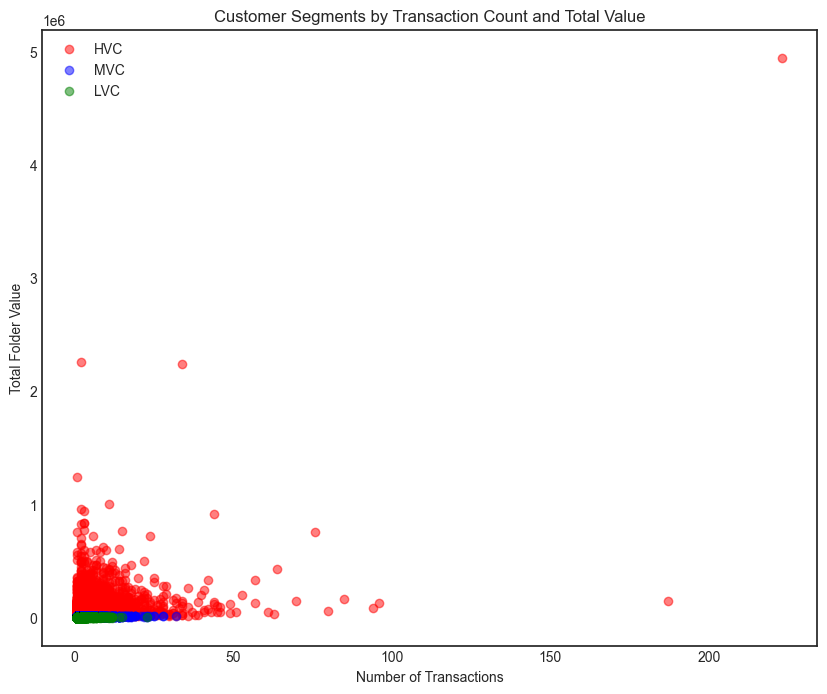

In [93]:

# Calculate cutoff points to split customers into 3 value segments:
# - High Value Customers (HVC): Top 20% of customers by total spend
# - Medium Value Customers (MVC): Middle 30% of customers by total spend  
# - Low Value Customers (LVC): Bottom 50% of customers by total spend
hvc_threshold = customer_summary['TotalFolderValue'].quantile(0.8)  # Cutoff for top 20%
mvc_threshold = customer_summary['TotalFolderValue'].quantile(0.5)  # Cutoff for middle 30%

# Create value segment categories
def value_segment(x):
    if x >= hvc_threshold:
        return 'HVC'
    elif x >= mvc_threshold:
        return 'MVC'
    else:
        return 'LVC'

customer_summary['ValueSegment'] = customer_summary['TotalFolderValue'].apply(value_segment)

# Create summary of segments
segment_summary = pd.DataFrame({
    'Count': customer_summary.groupby('ValueSegment')['ClientID'].count(),
    'Avg_FolderValue': customer_summary.groupby('ValueSegment')['TotalFolderValue'].mean(),
    'Total_FolderValue': customer_summary.groupby('ValueSegment')['TotalFolderValue'].sum(),
    'Pct_Total_Value': customer_summary.groupby('ValueSegment')['TotalFolderValue'].sum() / customer_summary['TotalFolderValue'].sum() * 100,
    'Avg_Transactions': customer_summary.groupby('ValueSegment')['total_transactions'].mean()
})

print("Client Value Segment Summary:")
print(segment_summary)

# Store customer level data back in hvc_profile by merging
hvc_profile = hvc_profile.merge(
    customer_summary[['ClientID', 'ValueSegment', 'TotalFolderValue', 'total_transactions']], 
    on='ClientID',
    how='left'
)

# Create scatter plot
plt.figure(figsize=(10,8))
colors = {'HVC':'red', 'MVC':'blue', 'LVC':'green'}
for segment in ['HVC', 'MVC', 'LVC']:
    mask = customer_summary['ValueSegment'] == segment
    plt.scatter(customer_summary[mask]['total_transactions'], 
               customer_summary[mask]['TotalFolderValue'],
               c=colors[segment],
               label=segment,
               alpha=0.5)

plt.xlabel('Number of Transactions')
plt.ylabel('Total Folder Value')
plt.title('Customer Segments by Transaction Count and Total Value')
plt.legend()
plt.show()

In [94]:
customer_summary.head()

,ClientID,EmailFlag,MMEmailFlag,HOOTEmailFlag,SkiEmailFlag,CruiseEmailFlag,Has_Air,Has_Cruise,Has_Hotel,Has_Rail,...,DestinationRegion,AirVendor,CruiseVendor,TourVendor,HotelVendor,ArrivalAirport,CuratedSegments,age_band,ff_code,ValueSegment
0,12921,0,0,0,0,0,1,0,0,0,...,UK/EUR,BA;CX;NZ,None,None,None,LHR,Air,51-60,NZ;SQ,LVC
1,13186,0,0,0,0,0,1,0,0,0,...,UK/EUR,FI;KL;LH;NZ,None,None,None,REK,Air,61-70,NZ;QF,MVC
2,23308,0,1,0,0,0,1,0,1,0,...,UK/EUR,NZ,None,None,Crowne Plaza Changi Airport;Leonardo Royal Hot...,LHR,Air;Hotel,51-60,NZ;SQ,HVC
3,23487,0,0,0,0,0,1,1,1,0,...,US/CA,NZ;UA,Viking River Cruises,None,Ambassador Transit Hotel Terminal 3;Amsterdam ...,YYZ,Air,61-70,EK;NZ;QF,HVC
4,28019,0,0,0,0,0,0,1,0,0,...,NZ,None,Disney Cruise Line,None,None,AKL,Cruise,41-50,NZ,LVC


In [95]:
# Map value segments from customer_summary to merged_df
merged_df['ValueSegment'] = merged_df['ClientID'].map(customer_summary.set_index('ClientID')['ValueSegment'])

# Check for any null values in ValueSegment column
null_count = merged_df['ValueSegment'].isnull().sum()
print(f"Number of null values in ValueSegment column: {null_count}")

Number of null values in ValueSegment column: 0


In [96]:
len(merged_df)


230492

In [97]:
## 
import pandas as pd

# ------------------------
# Antarctica Cruise Logic
# ------------------------

# List of key airports used for accessing Antarctica cruises
antarctica_airports = ['USH', 'BUE', 'SCL']

# List of cruise vendors operating in Antarctica
antarctica_vendors = [
    'Scenic Ocean', 'Aurora Expeditions', 'Quark',
    'HX', 'Ponant', 'Silversea', 'Seabourn', 'APT'
]

# Insert a new column 'Antarctica' with 1 if:
# - ArrivalAirport is one of the Antarctica gateway airports
# - CruiseVendor contains any Antarctica cruise operator (case-insensitive)
# Else insert 0
merged_df['Antarctica'] = (
    merged_df['ArrivalAirport'].isin(antarctica_airports) &
    merged_df['CruiseVendor'].fillna('').str.contains('|'.join(antarctica_vendors), case=False)
).astype(int)

# ------------------------
# Galapagos Cruise Logic
# ------------------------

# Airports in Ecuador typically used for Galapagos access
galapagos_airports = ['UIO', 'GYE']

# Cruise vendors offering Galapagos itineraries
galapagos_vendors = ['Celebrity', 'Silversea', 'HX', 'Adventure World']

# Insert a new column 'Galapagos' with 1 if:
# - ArrivalAirport is UIO or GYE
# - CruiseVendor matches a Galapagos operator
# Else insert 0
merged_df['Galapagos'] = (
    merged_df['ArrivalAirport'].isin(galapagos_airports) &
    merged_df['CruiseVendor'].fillna('').str.contains('|'.join(galapagos_vendors), case=False)
).astype(int)

# Display summary of clients that booked Antarctica or Galapagos cruises
print("\nAntarctica and Galapagos Bookings:")
print("-" * 45)
print(f"Total Antarctica Cruise Clients: {merged_df['Antarctica'].sum()}")
print(f"Total Galapagos Cruise Clients: {merged_df['Galapagos'].sum()}")

# Show sample of clients who booked these destinations
print("\nAntarctica Cruise Clients:")
print(merged_df[merged_df['Antarctica'] == 1][['ClientID', 'ArrivalAirport', 'CruiseVendor']].head())

print("\nGalapagos Cruise Clients:")
print(merged_df[merged_df['Galapagos'] == 1][['ClientID', 'ArrivalAirport', 'CruiseVendor']].head())



Antarctica and Galapagos Bookings:
---------------------------------------------
Total Antarctica Cruise Clients: 27
Total Galapagos Cruise Clients: 2

Antarctica Cruise Clients:
       ClientID ArrivalAirport    CruiseVendor
16012   1635594            BUE  Ponant Cruises
42990   4229288            SCL       Silversea
46432   2664545            BUE  Ponant Cruises
49342   4229284            SCL       Silversea
73378   2265954            USH  Ponant Cruises

Galapagos Cruise Clients:
       ClientID ArrivalAirport CruiseVendor
9646    3509875            UIO    Silversea
27868   1642444            UIO    Silversea


#### We now include the continent and Airport tags to merged_df



In [98]:
countries_by_continent = {
    "Africa": ["Kenya", "Mozambique", "Namibia", "Rwanda", "South Africa", "Tanzania", "Uganda", "Zimbabwe", "Zambia"],
    "Antarctica": [],
    "Asia": ["Cambodia", "China", "India", "Indonesia", "Iran", "Japan", "Kazakhstan", "Malaysia", "Myanmar", "Nepal", "Oman", "Sri Lanka", "Thailand", "Vietnam"],
    "Australia/Oceania": ["Australia", "Cook Islands", "Fiji", "New Zealand"],
    "Central America": ["Costa Rica", "Guatemala", "Honduras", "Nicaragua"],
    "Europe": ["United Kingdom"],
    "North America": ["Canada", "Cuba", "Mexico", "United States"],
    "South America": ["Argentina", "Brazil", "Chile", "Colombia", "Ecuador"]
}

def tag_continent(destination, countries_by_continent):
    # Handle special cases
    # if destination == "Bali":
    #     return "Asia"  # Maps to Indonesia
    # if destination == "Central America" or destination in countries_by_continent["Central America"]:
    #     return "Central America"
    # General case
    for continent, countries in countries_by_continent.items():
        if destination in countries:
            return continent
    return np.nan 


# Apply to our logic function to Destination
merged_df['Continent'] = merged_df['Destination'].apply(lambda x: tag_continent(x, countries_by_continent))



In [99]:
# Create separate columns for each target airport
merged_df['Airport_Anchorage'] = (merged_df['ArrivalAirport'] == 'ANC').astype(int)
merged_df['Airport_Raro'] = (merged_df['ArrivalAirport'] == 'RAR').astype(int) 
merged_df['Airport_Bali'] = (merged_df['ArrivalAirport'] == 'DPS').astype(int)

# Get summary count of arrivals at each target airport
print("\nArrival Airport Summary:")
print(f"Anchorage (ANC): {merged_df['Airport_Anchorage'].sum()} arrivals")
print(f"Rarotonga (RAR): {merged_df['Airport_Raro'].sum()} arrivals")
print(f"Bali (DPS): {merged_df['Airport_Bali'].sum()} arrivals")

# Show sample of data
merged_df.head(10)



Arrival Airport Summary:
Anchorage (ANC): 138 arrivals
Rarotonga (RAR): 8556 arrivals
Bali (DPS): 3927 arrivals


,ClientID,ProfileType,LinkedProfileIDs,HeadClientID,FirstName,LastName,EmailAddress,client_age,City,EmailFlag,...,Segment_Group Travelers,Segment_No Group,Segment_Solo Travelers,ValueSegment,Antarctica,Galapagos,Continent,Airport_Anchorage,Airport_Raro,Airport_Bali
0,1967108,Individual,NaN,-1.0,Gerard,Clarke,joe.clarke@northpower.com,0,Auckland,1,...,0,0,0,MVC,0,0,Europe,0,0,0
1,1976555,Head,3936415,1976555.0,John Clement,Harris,johnyhe@xtra.co.nz,74,Waihi,0,...,0,0,0,MVC,0,0,Australia/Oceania,0,0,0
2,1976555,Head,3936415,1976555.0,John Clement,Harris,johnyhe@xtra.co.nz,74,Waihi,0,...,0,0,0,MVC,0,0,Australia/Oceania,0,0,0
3,1989051,Head,1989055;1989059,1989051.0,Susan Mary,Quinn,quinnsusan.nz@gmail.com,64,Auckland,1,...,0,0,0,HVC,0,0,Europe,0,0,0
4,1989051,Head,1989055;1989059,1989051.0,Susan Mary,Quinn,quinnsusan.nz@gmail.com,64,Auckland,1,...,0,0,0,HVC,0,0,Asia,0,0,1
5,1989051,Head,1989055;1989059,1989051.0,Susan Mary,Quinn,quinnsusan.nz@gmail.com,64,Auckland,1,...,0,0,0,HVC,0,0,Europe,0,0,0
6,2023424,Individual,NaN,-1.0,Robyn,Redditt,reddittrobyn@gmail.com,71,nan,1,...,0,0,0,MVC,0,0,Australia/Oceania,0,1,0
7,2013237,Head,1195306;3187033;788844,2013237.0,Alan,Berg,alancberg@hotmail.com,85,Christchurch,0,...,0,0,1,HVC,0,0,NaN,0,0,0
8,2013237,Head,1195306;3187033;788844,2013237.0,Alan,Berg,alancberg@hotmail.com,85,Christchurch,0,...,0,0,1,HVC,0,0,Asia,0,0,0
9,2013237,Head,1195306;3187033;788844,2013237.0,Alan,Berg,alancberg@hotmail.com,85,Christchurch,0,...,0,0,0,HVC,0,0,Australia/Oceania,0,0,0


### Behavioural Segmentation

In [100]:
# # Let's unstack the TravelSegments and Destination Region
# # Create dummy variables for TravelSegments
# travel_segments = pd.get_dummies(behavioural_df['TravelSegments'].apply(pd.Series).stack()).groupby(level=0).sum()
# travel_segments = travel_segments.add_prefix('Segment_')

# # Create dummy variables for DestinationRegion
# destination_regions = pd.get_dummies(behavioural_df['DestinationRegion'], prefix='Region', dtype=int)

# # Combine the original dataframe with the new dummy variables
# behavioural_df_processed = pd.concat([
#     behavioural_df,
#     travel_segments,
#     destination_regions
# ], axis=1)

# # Drop the original columns that were converted to dummies
# behavioural_df_processed = behavioural_df_processed.drop(['TravelSegments', 'DestinationRegion'], axis=1)
# behavioural_df_processed.head()

In [101]:
# ## Because behavioural_df_processed is at transaction level we aggregate to Client level by aggregating using ClientID
# behavioural_df_processed_df = behavioural_df.copy()

# # Aggregate at ClientID level
# behavioural_df_processed_df = behavioural_df_processed_df.groupby('ClientID').agg({
#     'FolderValue': 'sum',  # Sum FolderValue
#     'FolderID': 'count',  # Count transactions
#     'client_age': 'first',  # Take first value
#     'PaxNumber': 'first',  # Take first value
#     'EmailFlag': 'max',  # Take max (1 if any 1s)
#     'MMEmailFlag': 'max',
#     'HOOTEmailFlag': 'max', 
#     'SkiEmailFlag': 'max',
#     'CruiseEmailFlag': 'max',
#     'FolderOutletCity': 'first',
#     'Destination': lambda x: list(x.unique()),
#     'DestinationRegion': lambda x: list(x.unique()),
#     'SegmentsBooked': lambda x: list(x.unique()),
#     'TravelSegments': lambda x: list(x.unique()),
#     'CruiseVendor': lambda x: list(x.dropna().unique()),
#     'TourVendor': lambda x: list(x.dropna().unique()),
#     'HotelVendor': lambda x: list(x.dropna().unique()),
#     'Has_Air': 'max',
#     'Has_Cruise': 'max',
#     'Has_Hotel': 'max',
#     'Has_Rail': 'max', 
#     'Has_Tour': 'max',
#     'Has_Insurance': 'max',
#     # 'Segment_Couple Travelers': 'max',
#     # 'Segment_Family Travelers': 'max',
#     # 'Segment_Group Travelers': 'max',
#     # 'Segment_Solo Travelers': 'max',
#     # 'Region_ASIA': 'max',
#     # 'Region_AU': 'max',
#     # 'Region_NZ': 'max',
#     # 'Region_OTH': 'max',
#     # 'Region_SPAC': 'max',
#     # 'Region_UK/EUR': 'max',
#     # 'Region_US/CA': 'max',
#     #'Region_Unknown': 'max'
# }).rename(columns={
#     'FolderValue': 'TotalFolderValue',
#     'FolderID': 'total_transactions'
# })

In [102]:
# import pandas as pd
# import numpy as np

# # Assume 'behavioural_df' is your existing pandas DataFrame

# # --- Helper function to handle potential lists within columns ---
# def flatten_unique_join(series):
#     """
#     Aggregates a pandas Series that might contain lists within its cells.
#     It flattens all items, finds unique values (as strings), sorts them,
#     and joins them into a single comma-separated string.
#     Handles NaNs and non-list items gracefully.
#     """
#     all_items = []
#     for item in series.dropna(): # Drop NaNs before processing
#         if isinstance(item, list):
#             all_items.extend(item) # Add elements from the list
#         else:
#             all_items.append(item) # Add the single item
    
#     # Convert all items to string, get unique using a set, sort, and join
#     unique_items_str = sorted(list(set(str(i) for i in all_items)))
#     return ','.join(unique_items_str)
# # --- End Helper Function ---

# # Make a copy if you want to preserve the original
# behavioural_df_processed_df = behavioural_df.copy()

# # Aggregate at ClientID level using the helper function for list-like columns
# behavioural_df_processed_df = behavioural_df_processed_df.groupby('ClientID').agg(
#     TotalFolderValue=('FolderValue', 'sum'),            # Sum FolderValue (Newer pandas syntax)
#     total_transactions=('FolderID', 'count'),          # Count transactions (Newer pandas syntax)
#     client_age=('client_age', 'first'),                # Take first value
#     PaxNumber=('PaxNumber', 'first'),                  # Take first value
#     EmailFlag=('EmailFlag', 'max'),                    # Take max (1 if any 1s)
#     MMEmailFlag=('MMEmailFlag', 'max'),
#     HOOTEmailFlag=('HOOTEmailFlag', 'max'),
#     SkiEmailFlag=('SkiEmailFlag', 'max'),
#     CruiseEmailFlag=('CruiseEmailFlag', 'max'),
#     FolderOutletCity=('FolderOutletCity', 'first'),
#     # Use the helper function for columns potentially containing lists
#     Destination=('Destination', flatten_unique_join),
#     DestinationRegion=('DestinationRegion', flatten_unique_join),
#     SegmentsBooked=('SegmentsBooked', flatten_unique_join),
#     TravelSegments=('TravelSegments', flatten_unique_join),
#     CruiseVendor=('CruiseVendor', flatten_unique_join),
#     TourVendor=('TourVendor', flatten_unique_join),
#     HotelVendor=('HotelVendor', flatten_unique_join),
#     # Continue with 'max' for boolean-like flags
#     Has_Air=('Has_Air', 'max'),
#     Has_Cruise=('Has_Cruise', 'max'),
#     Has_Hotel=('Has_Hotel', 'max'),
#     Has_Rail=('Has_Rail', 'max'),
#     Has_Tour=('Has_Tour', 'max'),
#     Has_Insurance=('Has_Insurance', 'max'),
#     # Add back any other aggregations you need using the ('ColumnName', 'agg_func') syntax
# ).reset_index() # Optional: Keep ClientID as a column instead of index

# # Rename columns (no longer needed within agg if using the new syntax)
# # The new syntax used above renames columns directly: NewName=('OldName', 'agg_func')

# # behavioural_df_processed_df now contains the aggregated data per ClientID

In [103]:
merged_df[['AirVendor', 'Has_Air']]

,AirVendor,Has_Air
0,EK,1
1,NZ,1
2,NZ,1
3,NaN,0
4,NZ,1
...,...,...
230487,NZ,1
230488,NZ,1
230489,NZ,1
230490,EK;QF,1


In [256]:
merged_df['LinkedToCompany'].value_counts()

LinkedToCompany
0    200781
1     29711
Name: count, dtype: int64

In [399]:
merged_df.columns.to_list()

['ClientID',
 'ProfileType',
 'LinkedProfileIDs',
 'HeadClientID',
 'FirstName',
 'LastName',
 'EmailAddress',
 'client_age',
 'City',
 'EmailFlag',
 'MMEmailFlag',
 'HOOTEmailFlag',
 'SkiEmailFlag',
 'CruiseEmailFlag',
 'SpecialInterest6',
 'SpecialInterestsAll',
 'ParentOutletRegion',
 'LinkedToCompany',
 'ParentOutlet',
 'OutletCity',
 'ProfileCreationDate',
 'FirstKnownBookingDate',
 'LastBookingDate',
 'NumberOfNonHOorNHFolders',
 'NumberOfHOFolders',
 'NumberOfNHFolders',
 'ff_code',
 'RelatedClientID',
 'OtherClientID',
 'FolderOutletBMMCode',
 'FolderID',
 'FolderCreationDate',
 'FolderStatus',
 'FolderConfirmationDate',
 'FolderOutletRegion',
 'FolderOutletCode',
 'FolderOutletCity',
 'PaxNumber',
 'AgeOfOtherTravellers',
 'Destination',
 'DestinationRegion',
 'DepartureAirport',
 'DepartureDate',
 'ReturnDate',
 'SegmentsBooked',
 'AirVendor',
 'CruiseVendor',
 'TourVendor',
 'HotelVendor',
 'FolderValue',
 'TotalFolderValue',
 'FinalPaymentDue',
 'FinalPaymentBalance',
 'Arr

In [ ]:
merged_df

In [257]:
# 0.	SME Corporate Segment 
import numpy as np

# --- SME Corporate Segment Definition ---
# Flag anyone linked to a company (LinkedToCompany == 1) as "SME Corporate"
merged_df['SME_Corporate'] = np.where(merged_df['LinkedToCompany'] == 1,
                                      'SME_Corporate',
                                      np.nan)

# Subset just the SME Corporate customers for further work
SME_Corporate_df = merged_df.loc[merged_df['SME_Corporate'] == 'SME_Corporate'].copy()

SME_Corporate_df.head()


,ClientID,ProfileType,LinkedProfileIDs,HeadClientID,FirstName,LastName,EmailAddress,client_age,City,EmailFlag,...,Segment_No Group,Segment_Solo Travelers,ValueSegment,Antarctica,Galapagos,Continent,Airport_Anchorage,Airport_Raro,Airport_Bali,SME_Corporate
21,1569063,Individual,NaN,-1.0,Kerri Anne,Hancock,kerri.hancock@kaupare.co.nz,0,Rotorua,1,...,0,1,LVC,0,0,Australia/Oceania,0,0,0,SME_Corporate
31,867542,Individual,NaN,-1.0,Allen Wallace,Clampitt,alclampitt@gmail.com,51,nan,1,...,0,1,MVC,0,0,Australia/Oceania,0,0,0,SME_Corporate
32,867542,Individual,NaN,-1.0,Allen Wallace,Clampitt,alclampitt@gmail.com,51,nan,1,...,0,1,MVC,0,0,Australia/Oceania,0,0,0,SME_Corporate
33,867542,Individual,NaN,-1.0,Allen Wallace,Clampitt,alclampitt@gmail.com,51,nan,1,...,0,1,MVC,0,0,Australia/Oceania,0,0,0,SME_Corporate
34,867542,Individual,NaN,-1.0,Allen Wallace,Clampitt,alclampitt@gmail.com,51,nan,1,...,1,0,MVC,0,0,Australia/Oceania,0,0,0,SME_Corporate


In [258]:
# 00. Air Only Segment 
import numpy as np

# List of flags that must be zero for "Air Only"
zero_flags = ['Has_Cruise', 'Has_Hotel', 'Has_Rail', 'Has_Tour', 'LinkedToCompany']

# Build conditions:
# 1. Has_Air=1 AND all zero_flags == 0
# 2. Exclude SME/Corporate clients to focus on true leisure travel
cond_air_only = (
    (merged_df['Has_Air'] == 1) &
    merged_df[zero_flags].eq(0).all(axis=1) &
    ~merged_df['ClientID'].isin(SME_Corporate_df['ClientID'])  # Remove SME/Corporate clients
)

# Flag segment in-place
merged_df['Air Only'] = np.where(cond_air_only, 'Air Only', np.nan)

# Subset for analysis
AirOnly_df = merged_df.loc[cond_air_only].copy()

AirOnly_df.head()


,ClientID,ProfileType,LinkedProfileIDs,HeadClientID,FirstName,LastName,EmailAddress,client_age,City,EmailFlag,...,Segment_Solo Travelers,ValueSegment,Antarctica,Galapagos,Continent,Airport_Anchorage,Airport_Raro,Airport_Bali,SME_Corporate,Air Only
0,1967108,Individual,NaN,-1.0,Gerard,Clarke,joe.clarke@northpower.com,0,Auckland,1,...,0,MVC,0,0,Europe,0,0,0,nan,Air Only
4,1989051,Head,1989055;1989059,1989051.0,Susan Mary,Quinn,quinnsusan.nz@gmail.com,64,Auckland,1,...,0,HVC,0,0,Asia,0,0,1,nan,Air Only
7,2013237,Head,1195306;3187033;788844,2013237.0,Alan,Berg,alancberg@hotmail.com,85,Christchurch,0,...,1,HVC,0,0,NaN,0,0,0,nan,Air Only
8,2013237,Head,1195306;3187033;788844,2013237.0,Alan,Berg,alancberg@hotmail.com,85,Christchurch,0,...,1,HVC,0,0,Asia,0,0,0,nan,Air Only
10,2013237,Head,1195306;3187033;788844,2013237.0,Alan,Berg,alancberg@hotmail.com,85,Christchurch,0,...,1,HVC,0,0,NaN,0,0,0,nan,Air Only


In [398]:
AirOnly_df[zero_flags]

,Has_Cruise,Has_Hotel,Has_Rail,Has_Tour,LinkedToCompany
0,0,0,0,0,0
4,0,0,0,0,0
7,0,0,0,0,0
8,0,0,0,0,0
10,0,0,0,0,0
...,...,...,...,...,...
230482,0,0,0,0,0
230483,0,0,0,0,0
230487,0,0,0,0,0
230489,0,0,0,0,0


In [397]:
AirOnly_df['ClientID'].nunique()

72746

In [259]:
# 1.	High Spenders 

# Define the lists of specific vendors
high_end_cruise_vendors = [
    'Silversea', 'Regent Seven Seas', 'Seabourn', 'Ponant', 'Scenic Ocean',
    'Quark', 'APT', 'Uniworld', 'Avalon', 'Viking', 'Viking River Cruises',
    'Royal Caribbean', 'Princess Cruises', 'Hurtigruten', 'HX', 'Cunard',
    'Emerald', 'Explora', 'Oceania', 'Paul Gaugin', 'Swan Hellenic',
    'Coral Expeditions'
]

high_end_tour_vendors = [
    'Abercrombie & Kent', 'Tauck', 'Beyond Africa', 'Globus', 'Trafalgar',
    'Insight Vacations', 'Total Holiday Options', 'Wendy Wu', 'Rocky Mountaineer',
    'Journey Beyond', 'Sunway Safaris', 'The Safari Company', 'Adventure World',
    'Backroads'
]

# Condition 1: Value/Pax based, excluding clients with Has_Cruise = 1
# Using 'FolderValue' as requested - Ensure 'PaxNumber' column name is correct
# merged_df is our aggregated df
# Exclude SME/Corporate clients to focus on true leisure travel
cond1a = (merged_df['FolderValue'] >= 15000) & (merged_df['PaxNumber'] >= 2)
cond1b = (merged_df['FolderValue'] >= 20000) & (merged_df['PaxNumber'] == 1)
condition1 = (cond1a | cond1b) & (merged_df['Has_Cruise'] != 1) & ~merged_df['ClientID'].isin(SME_Corporate_df['ClientID'])

# Condition 2: Specific Cruise Vendors
# Using .str.contains for robustness if the column contains comma-separated strings from aggregation
# Exclude SME/Corporate clients
condition2 = (merged_df['CruiseVendor'].fillna('').apply(lambda x: any(vendor in str(x) for vendor in high_end_cruise_vendors))) & ~merged_df['ClientID'].isin(SME_Corporate_df['ClientID'])

# Condition 3: Specific Tour Vendors
# Using .str.contains for robustness
# Exclude SME/Corporate clients 
condition3 = (merged_df['TourVendor'].fillna('').apply(lambda x: any(vendor in str(x) for vendor in high_end_tour_vendors))) & ~merged_df['ClientID'].isin(SME_Corporate_df['ClientID'])

# Combine all conditions with OR
final_condition = condition1 | condition2 | condition3

# Add the 'HighSpender' column to this merged_df DataFrame for future comparison
merged_df['High Spender'] = np.where(final_condition, 'High Spender', np.nan)

#HighSpender_df['HoT-Segment'] = 'High Spender'
HighSpender_df =  merged_df[merged_df['High Spender'] == 'High Spender'].copy()
HighSpender_df.head()


,ClientID,ProfileType,LinkedProfileIDs,HeadClientID,FirstName,LastName,EmailAddress,client_age,City,EmailFlag,...,ValueSegment,Antarctica,Galapagos,Continent,Airport_Anchorage,Airport_Raro,Airport_Bali,SME_Corporate,Air Only,High Spender
3,1989051,Head,1989055;1989059,1989051.0,Susan Mary,Quinn,quinnsusan.nz@gmail.com,64,Auckland,1,...,HVC,0,0,Europe,0,0,0,nan,nan,High Spender
5,1989051,Head,1989055;1989059,1989051.0,Susan Mary,Quinn,quinnsusan.nz@gmail.com,64,Auckland,1,...,HVC,0,0,Europe,0,0,0,nan,nan,High Spender
17,199762,Head,1078365,199762.0,Christopher,Calver,ckcalver@gmail.com,72,Mt Maunganui,0,...,HVC,0,0,Europe,0,0,0,nan,nan,High Spender
19,1491390,Head,4422277,1491390.0,Rebecca Jane,Phillips,ripeka123@gmail.com,59,Chch,0,...,HVC,0,0,Europe,0,0,0,nan,nan,High Spender
22,1542610,Head,1428997,1542610.0,Mark Dieter,Newcombe,newcombe.mark@gmail.com,55,nan,1,...,MVC,0,0,NaN,0,0,0,nan,Air Only,High Spender


In [260]:
def check_non_numeric(series):
    return not all(isinstance(item, (int, float)) for item in series) # Include float in case of unexpected conversion

problematic_clients = merged_df.groupby('ClientID').agg({
    'EmailFlag': check_non_numeric,
    'MMEmailFlag': check_non_numeric,
    'HOOTEmailFlag': check_non_numeric,
    'SkiEmailFlag': check_non_numeric,
    'CruiseEmailFlag': check_non_numeric,
    'Has_Air': check_non_numeric,
    'Has_Cruise': check_non_numeric,
    'Has_Hotel': check_non_numeric,
    'Has_Rail': check_non_numeric,
    'Has_Tour': check_non_numeric,
    'Has_Insurance': check_non_numeric,
    'Segment_Couple Travelers': check_non_numeric,
    #'Segment_Friends & Family': check_non_numeric,
    'Segment_Solo Travelers': check_non_numeric,
    'Antarctica': check_non_numeric,
    'Galapagos': check_non_numeric,
    #'ArrivalAirportFlag': check_non_numeric,
    'Airport_Anchorage': check_non_numeric,
    'Airport_Raro': check_non_numeric,
    'Airport_Bali': check_non_numeric,
    'Airport_Bali': check_non_numeric,

})

problematic_clients = problematic_clients[problematic_clients.any(axis=1)]

if not problematic_clients.empty:
    print("Clients with potential non-numeric values in the integer columns:")
    print(problematic_clients)
else:
    print("No clients found with non-numeric values in the checked integer columns.")

No clients found with non-numeric values in the checked integer columns.


In [261]:
# 2.	Luxury: 
# Define luxury hotel vendors
luxury_hotels = [
    'Four Seasons Hotel', 'Six Senses', 'St Regis', 'Mandarin Oriental', 'Oetter',
    'Aman', 'Raffles', 'Peninsula', 'Dorchester', 'Fairmont', 'Vomo',
    'Ritz Carlton', 'The Fullerton', 'Bvlgari'
]

# Define luxury cruise vendors
luxury_cruise_vendors = [
    'Silversea', 'Regent Seven Seas', 'Seabourn', 'Ponant', 'Scenic Ocean',
    'Quark', 'APT', 'Uniworld', 'Cunard', 'Emerald', 'Explora',
    'Oceania', 'Paul Gaugin', 'Swan Hellenic', 'Coral Expeditions'
]

# Define luxury tour vendors
luxury_tour_vendors = [
    'Abercrombie & Kent', 'Tauck', 'Beyond Africa', 'Insight Vacations', 'Adventure World'
]

# Condition 1: FolderValue per Pax rules, excluding cruise clients
cond1a = (merged_df['FolderValue'] >= 40000) & (merged_df['PaxNumber'] >= 2)
cond1b = (merged_df['FolderValue'] >= 30000) & (merged_df['PaxNumber'] == 1)
condition1 = (cond1a | cond1b) & (merged_df['Has_Cruise'] != 1)

# Condition 2: Luxury Hotel Vendors (substring match)
condition2 = merged_df['HotelVendor'].fillna('').str.contains(
    '|'.join(luxury_hotels), case=False, regex=True
)

# Condition 3: Luxury Cruise Vendors (substring match)
condition3 = merged_df['CruiseVendor'].fillna('').str.contains(
    '|'.join(luxury_cruise_vendors), case=False, regex=True
)

# Condition 4: Luxury Tour Vendors (substring match)
condition4 = merged_df['TourVendor'].fillna('').str.contains(
    '|'.join(luxury_tour_vendors), case=False, regex=True
)

# Condition 5: Exclude SME/Corporate clients
# Remove records where ClientID exists in SME_Corporate_df to focus on true leisure travel
condition5 = ~merged_df['ClientID'].isin(SME_Corporate_df['ClientID'])

# Combine all conditions
luxury_condition = (condition1 | condition2 | condition3 | condition4) & condition5

# Tag the new column
merged_df['Luxury Seeker'] = np.where(luxury_condition, 'Luxury Seeker', np.nan)

# Create a new DataFrame with only Luxury Seekers
luxury_df = merged_df[merged_df['Luxury Seeker'] == 'Luxury Seeker'].copy()


In [262]:
## 3.	Intrepid Explorers (Expedition/Adventure)
# Define destination keywords
adventure_destinations = [
    'Africa', 'Antarctica', 'Argentina', 'Borneo', 'Brazil', 'Myanmar', 'Cambodia',
    'Chile', 'China', 'Central America', 'Colombia', 'Costa Rica', 'Cuba',
    'Ecuador', 'Galapagos', 'Guatemala', 'Honduras', 'India', 'Iran', 'Kazakhstan',
    'Kenya', 'Mexico', 'Mozambique', 'Namibia', 'Nepal', 'Nicaragua', 'Oman',
    'Rwanda', 'South America', 'South Africa', 'Sri Lanka', 'Tanzania', 'Uganda',
    'Zimbabwe', 'Zambia'
]

# Define expedition cruise vendors
expedition_cruise_vendors = [
    'Quark', 'Ponant', 'Scenic Ocean', 'Coral Expeditions', 'HX', 'Hurtigruten', 'Wild Earth'
]

# Define adventure tour vendors
adventure_tour_vendors = [
    'Intrepid', 'Innovative Travel', 'G Adventures', 'Adventure World', 'Sunway Safaris', 'The Safari Company'
]

# Condition 1: Has_Air and (Has_Hotel or Has_Tour or Has_Cruise)
condition1 = (
    (merged_df['Has_Air'] == 1) &
    ((merged_df['Has_Hotel'] == 1) | (merged_df['Has_Tour'] == 1) | (merged_df['Has_Cruise'] == 1))
)

# Condition 2: Destination contains adventure places
condition2 = merged_df['Destination'].fillna('').str.contains(
    '|'.join(adventure_destinations), case=False, regex=True
)

# Condition 3: Cruise vendor is one of the expedition brands
condition3 = merged_df['CruiseVendor'].fillna('').str.contains(
    '|'.join(expedition_cruise_vendors), case=False, regex=True
)

# Condition 4: Tour vendor is one of the adventure brands
condition4 = merged_df['TourVendor'].fillna('').str.contains(
    '|'.join(adventure_tour_vendors), case=False, regex=True
)

# Condition 5: Exclude SME/Corporate clients
# Remove records where ClientID exists in SME_Corporate_df to focus on true leisure travel
condition5 = ~merged_df['ClientID'].isin(SME_Corporate_df['ClientID'])

# Final adventure segment logic - include condition to exclude SME/Corporate
adventure_condition = condition1 & (condition2 | condition3 | condition4) & condition5

# Tag the new segment
merged_df['Intrepid Explorer'] = np.where(adventure_condition, 'Intrepid Explorer', np.nan)
# replaced Adventure Explorer with Intrepid Explorer
# Create new DataFrame for adventure segment
adventure_df = merged_df[merged_df['Intrepid Explorer'] == 'Intrepid Explorer'].copy()


In [263]:
adventure_df.head()


,ClientID,ProfileType,LinkedProfileIDs,HeadClientID,FirstName,LastName,EmailAddress,client_age,City,EmailFlag,...,Galapagos,Continent,Airport_Anchorage,Airport_Raro,Airport_Bali,SME_Corporate,Air Only,High Spender,Luxury Seeker,Intrepid Explorer
27,1557953,Individual,NaN,-1.0,Xiangling,Hou,sarah@dxlaw.co.nz,53,Auckland,0,...,0,Asia,0,0,0,nan,nan,High Spender,nan,Intrepid Explorer
54,994035,Linked,NaN,836032.0,Rachel,Prendergast,rachelprender@gmail.com,53,Christchurch,0,...,0,NaN,0,0,0,nan,nan,High Spender,nan,Intrepid Explorer
120,1065608,Individual,NaN,-1.0,Ben Mitchell,Catchpole,ben.catchpole@gmail.com,39,Dunedin,0,...,0,Africa,0,0,0,nan,nan,High Spender,Luxury Seeker,Intrepid Explorer
155,1820044,Head,1968530;1968540;468844,1820044.0,Elizabeth,Fairgray,lizfairgray@gmail.com,62,Auckland,0,...,0,NaN,0,0,0,nan,nan,High Spender,nan,Intrepid Explorer
266,685795,Individual,NaN,-1.0,Marie,Hales,mtestate@nettel.net.nz,84,Foxton Beach,0,...,0,Africa,0,0,0,nan,nan,nan,nan,Intrepid Explorer


In [264]:
# 4.	Touring Large Group:
# Tag 'Guided Holiday Seeker' based on TourVendor and exclude SME/Corporate clients
merged_df['Touring Large'] = np.where(
    (merged_df['TourVendor'].fillna('').str.contains(
        'Trafalgar|Globus|Insight|AAT Kings|Cosmos|Albatross', case=False, regex=True
    )) &
    (~merged_df['ClientID'].isin(SME_Corporate_df['ClientID'])), # Remove SME/Corporate records
    'Touring Large',
    np.nan
)

# Filter only guided holiday seekers
# Guided Holiday Seeker with Touring Large
guided_df = merged_df[merged_df['Touring Large'] == 'Touring Large'].copy()


In [265]:
guided_df.head()

,ClientID,ProfileType,LinkedProfileIDs,HeadClientID,FirstName,LastName,EmailAddress,client_age,City,EmailFlag,...,Continent,Airport_Anchorage,Airport_Raro,Airport_Bali,SME_Corporate,Air Only,High Spender,Luxury Seeker,Intrepid Explorer,Touring Large
17,199762,Head,1078365,199762.0,Christopher,Calver,ckcalver@gmail.com,72,Mt Maunganui,0,...,Europe,0,0,0,nan,nan,High Spender,nan,nan,Touring Large
29,1557953,Individual,NaN,-1.0,Xiangling,Hou,sarah@dxlaw.co.nz,53,Auckland,0,...,Australia/Oceania,0,0,0,nan,nan,nan,nan,nan,Touring Large
55,948210,Head,NaN,948210.0,Michele Lorraine,Stainburn,michele.stainburn@xtra.co.nz,70,Invercargill,1,...,NaN,0,0,0,nan,nan,High Spender,nan,nan,Touring Large
79,1595152,Linked,NaN,1584505.0,Boon Kooi,Tan,puiching.tan@gmail.com,68,Palmerston North,1,...,Asia,0,0,0,nan,nan,High Spender,nan,nan,Touring Large
170,2344538,Head,3916098,2344538.0,Donna,Black,workshop@fishcity.co.nz,58,Morrinsville,1,...,NaN,0,0,0,nan,nan,High Spender,nan,nan,Touring Large


In [266]:
#5.	Touring Small Group:
# Tag 'Cultural Explorer' segment based on TourVendor and exclude SME/Corporate clients and now called Touring Small
merged_df['Touring Small'] = np.where(
    (merged_df['TourVendor'].fillna('').str.contains(
        'Back Roads|Wendy Wu|Intrepid|On the Go|G[- ]?Adventures', case=False, regex=True
    )) &
    (~merged_df['ClientID'].isin(SME_Corporate_df['ClientID'])), # Remove SME/Corporate records
    'Touring Small',
    np.nan
)

# Create DataFrame with only Cultural Explorers
cultural_df = merged_df[merged_df['Touring Small'] == 'Touring Small'].copy()


In [267]:
merged_df.head()

,ClientID,ProfileType,LinkedProfileIDs,HeadClientID,FirstName,LastName,EmailAddress,client_age,City,EmailFlag,...,Airport_Anchorage,Airport_Raro,Airport_Bali,SME_Corporate,Air Only,High Spender,Luxury Seeker,Intrepid Explorer,Touring Large,Touring Small
0,1967108,Individual,NaN,-1.0,Gerard,Clarke,joe.clarke@northpower.com,0,Auckland,1,...,0,0,0,nan,Air Only,nan,nan,nan,nan,nan
1,1976555,Head,3936415,1976555.0,John Clement,Harris,johnyhe@xtra.co.nz,74,Waihi,0,...,0,0,0,nan,nan,nan,nan,nan,nan,nan
2,1976555,Head,3936415,1976555.0,John Clement,Harris,johnyhe@xtra.co.nz,74,Waihi,0,...,0,0,0,nan,nan,nan,nan,nan,nan,nan
3,1989051,Head,1989055;1989059,1989051.0,Susan Mary,Quinn,quinnsusan.nz@gmail.com,64,Auckland,1,...,0,0,0,nan,nan,High Spender,nan,nan,nan,Touring Small
4,1989051,Head,1989055;1989059,1989051.0,Susan Mary,Quinn,quinnsusan.nz@gmail.com,64,Auckland,1,...,0,0,1,nan,Air Only,nan,nan,nan,nan,nan


In [268]:
# 6.	River Cruising:
# Tag 'River Cruise Enthusiast' segment based on CruiseVendor and exclude SME/Corporate clients
merged_df['River Cruise Enthusiast'] = np.where(
    (merged_df['CruiseVendor'].fillna('').str.contains(
        'Avalon|Viking River|Emerald River|Scenic River|Uniworld|Travelmarvel|APT|Ama Waterways',
        case=False, regex=True
    )) &
    (~merged_df['ClientID'].isin(SME_Corporate_df['ClientID'])), # Remove SME/Corporate records
    'River Cruise Enthusiast',
    np.nan
)

# Create DataFrame for River Cruise Enthusiasts
river_cruise_df = merged_df[merged_df['River Cruise Enthusiast'] == 'River Cruise Enthusiast'].copy()


In [269]:
len(river_cruise_df)

2808

In [270]:
# 7.	Mainstream Ocean Cruise (excluding Luxury cruise brands):
# Define the list of excluded cruise vendors (luxury + river cruise)
excluded_cruise_vendors = (
    'Avalon|Viking River|Emerald River|Scenic River|Uniworld|Travelmarvel|APT|Ama Waterways|'
    'Silversea|Regent Seven Seas|Seabourn|Ponant|Scenic Ocean|Quark|Cunard|Emerald|Explora|'
    'Oceania|Paul Gaugin|Swan Hellenic|Coral Expeditions'
)

# Tag 'Mainstream Cruiser' where CruiseVendor is not null/blank and not in excluded list
# Also exclude SME/Corporate records since these represent corporate work not leisure travel
merged_df['Mainstream Cruiser'] = np.where(
    (merged_df['CruiseVendor'].fillna('') != '') &
    (~merged_df['CruiseVendor'].fillna('').str.contains(excluded_cruise_vendors, case=False, regex=True)) &
    (~merged_df['ClientID'].isin(SME_Corporate_df['ClientID'])), # Remove SME/Corporate records
    'Mainstream Cruiser', 
    np.nan
)

# Create DataFrame for mainstream cruise segment
mainstream_cruise_df = merged_df[merged_df['Mainstream Cruiser'] == 'Mainstream Cruiser'].copy()
mainstream_cruise_df.head()

,ClientID,ProfileType,LinkedProfileIDs,HeadClientID,FirstName,LastName,EmailAddress,client_age,City,EmailFlag,...,Airport_Bali,SME_Corporate,Air Only,High Spender,Luxury Seeker,Intrepid Explorer,Touring Large,Touring Small,River Cruise Enthusiast,Mainstream Cruiser
56,884162,Head,1468101;617603,884162.0,Jillian Margaret,Hodges,jillcorey130@gmail.com,50,Riverton,1,...,0,nan,nan,nan,nan,nan,nan,nan,nan,Mainstream Cruiser
57,884162,Head,1468101;617603,884162.0,Jillian Margaret,Hodges,jillcorey130@gmail.com,50,Riverton,1,...,0,nan,nan,nan,nan,nan,nan,nan,nan,Mainstream Cruiser
65,1936645,Head,1936646;1936648;1936649;1936650,1936645.0,Amanda,Houlahan,rahoulahan@gmail.com,53,Palmerston North,1,...,0,nan,nan,nan,nan,nan,nan,nan,nan,Mainstream Cruiser
86,1620694,Head,1445136;1508876;1508878;1508879;1580760;158076...,1620694.0,Callan,Goodall,callang@cdd.org.nz,52,Invercargill,0,...,0,nan,nan,nan,nan,nan,nan,nan,nan,Mainstream Cruiser
87,1615428,Head,1615433;1754988;1754991,1615428.0,Julie Anne,Cross,juliecross33@gmail.com,45,Hamilton,1,...,0,nan,nan,nan,nan,nan,nan,nan,nan,Mainstream Cruiser


In [271]:
# 8. Yolo Solo (solo travellers age 41+)
# Minimal segment cases (excluding cruise and air only)
# Note: We exclude air only segments since these represent simple point-to-point flights
# rather than true leisure travel experiences
minimal_segment_condition = (
    (
        # Only Hotel
        ((merged_df['Has_Hotel'] == 1) & (merged_df[['Has_Air', 'Has_Insurance', 'Has_Tour', 'Has_Cruise']].sum(axis=1) == 0)) |
        # Air + Insurance only
        ((merged_df['Has_Air'] == 1) & (merged_df['Has_Insurance'] == 1) &
         (merged_df[['Has_Hotel', 'Has_Tour', 'Has_Cruise']].sum(axis=1) == 0)) |
        # No travel components at all
        (merged_df[['Has_Hotel', 'Has_Air', 'Has_Insurance', 'Has_Tour', 'Has_Cruise']].sum(axis=1) == 0)
    )
    & (merged_df['Has_Cruise'] != 1)  # Explicit cruise exclusion
)

# Final Yolo Solo condition
yolo_condition = (
    (merged_df['PaxNumber'] == 1) &
    (merged_df['client_age'] >= 41) &
    minimal_segment_condition &
    (~merged_df['ClientID'].isin(AirOnly_df['ClientID'])) &  # Exclude clients that are in AirOnly_df
    (~merged_df['ClientID'].isin(SME_Corporate_df['ClientID']))  # Remove SME/Corporate records since these represent corporate work not leisure travel
)

# Tag the segment
merged_df['Yolo Solo'] = np.where(yolo_condition, 'Yolo Solo', np.nan)

# Create a filtered DataFrame
yolo_df = merged_df[merged_df['Yolo Solo'] == 'Yolo Solo'].copy()
yolo_df.head()


,ClientID,ProfileType,LinkedProfileIDs,HeadClientID,FirstName,LastName,EmailAddress,client_age,City,EmailFlag,...,SME_Corporate,Air Only,High Spender,Luxury Seeker,Intrepid Explorer,Touring Large,Touring Small,River Cruise Enthusiast,Mainstream Cruiser,Yolo Solo
84,1567954,Head,2643735,1567954.0,Sheila,Watts,sandswatts@hotmail.com,60,Wanganui,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,Yolo Solo
568,1329554,Head,3584832,1329554.0,Hayley,Marks,bruntymarksy@gmail.com,46,nan,1,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,Yolo Solo
752,1942405,Individual,NaN,-1.0,Joan Margaret,Baker,jono46@xtra.co.nz,84,Auckland,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,Yolo Solo
808,1233570,Linked,NaN,683863.0,Karyn,Reid,reidkaryn@gmail.com,73,Taupo,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,Yolo Solo
894,4269114,Individual,NaN,-1.0,Taane,Morris,selweena_b@hotmail.com,66,nan,1,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,Yolo Solo


In [272]:
# 9. Young Explorers (solo travellers age 21 – 40)
# Define brand keywords for when DOB is missing
young_brands = 'Contiki|Top Deck|Sail Croatia'

# Minimal segment logic (same as Yolo Solo)
minimal_segment = (
    (
        ((merged_df['Has_Hotel'] == 1) & (merged_df[['Has_Air', 'Has_Insurance', 'Has_Tour', 'Has_Cruise']].sum(axis=1) == 0)) |
        ((merged_df['Has_Air'] == 1) & (merged_df[['Has_Hotel', 'Has_Insurance', 'Has_Tour', 'Has_Cruise']].sum(axis=1) == 0)) |
        ((merged_df['Has_Air'] == 1) & (merged_df['Has_Insurance'] == 1) &
         (merged_df[['Has_Hotel', 'Has_Tour', 'Has_Cruise']].sum(axis=1) == 0)) |
        (merged_df[['Has_Hotel', 'Has_Air', 'Has_Insurance', 'Has_Tour', 'Has_Cruise']].sum(axis=1) == 0)
    ) &
    (merged_df['Has_Cruise'] != 1)  # Exclude cruise clients
)

# Young age condition (if Age is available)
age_condition = (merged_df['client_age'] >= 21) & (merged_df['client_age'] <= 40)
# Young age condition using age_band
#age_condition = merged_df['age_band'].isin(['21-30', '31-40'])

# Missing DOB and tour vendor contains young brands
tour_brand_condition = (
    merged_df['client_age'] == 0 &
    merged_df['TourVendor'].fillna('').str.contains(young_brands, case=False, regex=True)
)

# tour_brand_condition = (
#     merged_df['age_band'].isin(['Missing', '1-20']) &
#     merged_df['TourVendor'].fillna('').str.contains(young_brands, case=False, regex=True)
# )

# Final Young Explorer condition
# Exclude records where:
# - ClientID exists in AirOnly_df since these represent simple point-to-point flights 
# - ClientID exists in SME_Corporate_df since these represent corporate work not leisure travel
young_explorer_condition = (
    (merged_df['PaxNumber'] == 1) &
    (age_condition | tour_brand_condition) &
    minimal_segment &
    (~merged_df['ClientID'].isin(AirOnly_df['ClientID'])) &  # Exclude Air Only clients
    (~merged_df['ClientID'].isin(SME_Corporate_df['ClientID']))  # Remove SME/Corporate records
)

# Tag the segment
merged_df['Young Explorer'] = np.where(young_explorer_condition, 'Young Explorer', np.nan)

# Filtered DataFrame
young_explorer_df = merged_df[merged_df['Young Explorer'] == 'Young Explorer'].copy()

young_explorer_df.head()

,ClientID,ProfileType,LinkedProfileIDs,HeadClientID,FirstName,LastName,EmailAddress,client_age,City,EmailFlag,...,Air Only,High Spender,Luxury Seeker,Intrepid Explorer,Touring Large,Touring Small,River Cruise Enthusiast,Mainstream Cruiser,Yolo Solo,Young Explorer
183,4203745,Individual,NaN,-1.0,Rachael,Meates,rachael.meates@gmail.com,0,nan,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,Young Explorer
449,4409363,Individual,NaN,-1.0,Bobbie,Balmer,ATTHEBEACH2@XTRA.CO.NZ,0,nan,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,Young Explorer
474,734775,Head,NaN,734775.0,Lauren,Honeybone,lauren.honeybone@gmail.com,29,Blenheim,1,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,Young Explorer
1225,1460286,Individual,NaN,-1.0,Aaron,Thorburn,aaron@luxor.co.nz,0,AUCKLAND,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,Young Explorer
1537,3767794,Individual,NaN,-1.0,Roy,Taoho,roy.taoho@taurahano2.co.nz,0,nan,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,Young Explorer


In [273]:
# 10. Younger Families (at least one parent and one child under 12) - Mine
def is_younger_family(age_string):
    try:
        # Parse ages into integers
        ages = [int(a.strip()) for a in age_string.split(';') if a.strip().isdigit()]
        
        # Check conditions:
        has_adult = any(age > 21 for age in ages)  # At least one adult
        has_young_child = any(age < 12 for age in ages)  # At least one child under 12
        no_teens = not any(12 <= age <= 21 for age in ages)  # No children 12-21
        
        return has_adult and has_young_child and no_teens
    except:
        return False  # Safely exclude if parsing fails

# Apply logic
younger_family_condition = (
    (merged_df['PaxNumber'] >= 2) &
    merged_df['AgeOfOtherTravellers'].apply(is_younger_family) &
    (~merged_df['ClientID'].isin(SME_Corporate_df['ClientID']))  # Remove SME/Corporate records
)

# Tag the segment
merged_df['Younger Family'] = np.where(younger_family_condition, 'Younger Family', np.nan)

# Filtered DataFrame
younger_family_df = merged_df[merged_df['Younger Family'] == 'Younger Family'].copy()

younger_family_df.head()

,ClientID,ProfileType,LinkedProfileIDs,HeadClientID,FirstName,LastName,EmailAddress,client_age,City,EmailFlag,...,High Spender,Luxury Seeker,Intrepid Explorer,Touring Large,Touring Small,River Cruise Enthusiast,Mainstream Cruiser,Yolo Solo,Young Explorer,Younger Family
37,993498,Linked,NaN,779301.0,Alisha,Cornwall,Blancor.dairys@yahoo.co.nz,36,Ashburton,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,Younger Family
38,993498,Linked,NaN,779301.0,Alisha,Cornwall,Blancor.dairys@yahoo.co.nz,36,Ashburton,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,Younger Family
39,993498,Linked,NaN,779301.0,Alisha,Cornwall,Blancor.dairys@yahoo.co.nz,36,Ashburton,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,Younger Family
59,1934847,Head,NaN,1934847.0,Jannah Maree,Stringer,jannahstringer@hotmail.com,42,Dunedin,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,Younger Family
165,2389681,Head,1689485,2389681.0,Alexander Roy,Hardy,alexhardy93@gmail.com,32,Ngongotaha,1,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,Younger Family


In [274]:
# 11. Older Families (eldest child 12+ years) -- Latest -- Mine
import re
import numpy as np
import pandas as pd

def is_valid_older_family(age_string):
    """
    Returns True if:
      - age_string is non-empty and contains semicolon-delimited integers,
      - at least one age is > 21 (adult),
      - at least one age is between 12-21 inclusive (teenager),
      - may include ages < 12 (younger children are allowed)
    Otherwise returns False.
    """
    # Guard against non-string or empty
    if not isinstance(age_string, str) or not age_string.strip():
        return False
    
    # Split on semicolon and parse integers
    ages = []
    for part in age_string.split(';'):
        part = part.strip()
        if part.isdigit():
            ages.append(int(part))
    
    if not ages:
        return False
    
    # Check required conditions:
    has_adult = any(age > 21 for age in ages)
    has_teen = any(12 <= age <= 21 for age in ages)
    
    # Must have both an adult AND a teenager
    return has_adult and has_teen

# Apply it:
older_family_condition = (
    (merged_df['PaxNumber'] >= 2) &
    merged_df['AgeOfOtherTravellers'].apply(is_valid_older_family) &
    (~merged_df['ClientID'].isin(SME_Corporate_df['ClientID']))  # Remove SME/Corporate records
)

merged_df['Older Family'] = np.where(older_family_condition, 'Older Family', np.nan)
older_family_df = merged_df.loc[merged_df['Older Family'] == 'Older Family'].copy()


In [275]:
len(older_family_df)

12522

Compare young and Old families 

In [276]:
##Compare young and Old families 
# 1. Compute the set of ClientIDs in each
younger_ids = set(younger_family_df['ClientID'])
older_ids   = set(older_family_df  ['ClientID'])

# 2. Find the intersection
common_ids = older_ids.intersection(younger_ids)

# 3. Filter (for example, pull from younger_family_df)
common_df = younger_family_df[ younger_family_df['ClientID'].isin(common_ids) ].copy()

common_df.sort_values("ClientID", ascending=True) [['ClientID', 'AgeOfOtherTravellers']]

,ClientID,AgeOfOtherTravellers
159184,100737,71;54;10
96901,216775,41;10;6
96902,216775,69;42;11;7;67;67
140530,243263,42;10
62079,262258,52;11
...,...,...
51418,4135157,32;40;6;3;72
191965,4194292,81;11
43304,4216487,42;11;9;7
205764,4297747,38;4;2


In [277]:
len(common_df )

292

In [278]:
### End of Compare young and Old families comparison

In [279]:
# 12. SINKS & DINKS (age 25-54)
# Apply SINKS & DINKS logic
sinks_dinks_condition = (
    (merged_df['PaxNumber'] == 2) &
    (merged_df['client_age'].between(25, 54)) &
    (~merged_df['ClientID'].isin(SME_Corporate_df['ClientID']))  # Remove SME/Corporate records
)

# sinks_dinks_condition = (
#     (merged_df['PaxNumber'] == 2) &
#     (merged_df['age_band'].isin(['21-30', '31-40', '41-50', '51-60']))
# )

# Tag the segment
merged_df['Sinks & Dinks'] = np.where(sinks_dinks_condition, 'Sinks & Dinks', np.nan)

# Create filtered DataFrame
sinks_dinks_df = merged_df[merged_df['Sinks & Dinks'] == 'Sinks & Dinks'].copy()
sinks_dinks_df.head()

,ClientID,ProfileType,LinkedProfileIDs,HeadClientID,FirstName,LastName,EmailAddress,client_age,City,EmailFlag,...,Intrepid Explorer,Touring Large,Touring Small,River Cruise Enthusiast,Mainstream Cruiser,Yolo Solo,Young Explorer,Younger Family,Older Family,Sinks & Dinks
16,2037685,Head,3672531,2037685.0,Arie,Day,Arie@allday.nz,33,LOWER HUTT,1,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,Sinks & Dinks
25,1568679,Individual,NaN,-1.0,Denize,Dos Santos,Dee.nize@hotmail.com,33,queestown,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,Sinks & Dinks
29,1557953,Individual,NaN,-1.0,Xiangling,Hou,sarah@dxlaw.co.nz,53,Auckland,0,...,nan,Touring Large,nan,nan,nan,nan,nan,nan,nan,Sinks & Dinks
56,884162,Head,1468101;617603,884162.0,Jillian Margaret,Hodges,jillcorey130@gmail.com,50,Riverton,1,...,nan,nan,nan,nan,Mainstream Cruiser,nan,nan,nan,nan,Sinks & Dinks
57,884162,Head,1468101;617603,884162.0,Jillian Margaret,Hodges,jillcorey130@gmail.com,50,Riverton,1,...,nan,nan,nan,nan,Mainstream Cruiser,nan,nan,nan,nan,Sinks & Dinks


In [280]:
# 13. Empty Nesters (age 55+)
# Apply Empty Nesters logic
empty_nester_condition = (
    (merged_df['PaxNumber'] == 2) &
    (merged_df['client_age'] >= 55) &
    (~merged_df['ClientID'].isin(SME_Corporate_df['ClientID']))  # Remove SME/Corporate records
)

# Tag the segment
merged_df['Empty Nester'] = np.where(empty_nester_condition, 'Empty Nester', np.nan)

# Create filtered DataFrame
empty_nester_df = merged_df[merged_df['Empty Nester'] == 'Empty Nester'].copy()
empty_nester_df.head()

,ClientID,ProfileType,LinkedProfileIDs,HeadClientID,FirstName,LastName,EmailAddress,client_age,City,EmailFlag,...,Touring Large,Touring Small,River Cruise Enthusiast,Mainstream Cruiser,Yolo Solo,Young Explorer,Younger Family,Older Family,Sinks & Dinks,Empty Nester
1,1976555,Head,3936415,1976555.0,John Clement,Harris,johnyhe@xtra.co.nz,74,Waihi,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,Empty Nester
2,1976555,Head,3936415,1976555.0,John Clement,Harris,johnyhe@xtra.co.nz,74,Waihi,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,Empty Nester
3,1989051,Head,1989055;1989059,1989051.0,Susan Mary,Quinn,quinnsusan.nz@gmail.com,64,Auckland,1,...,nan,Touring Small,nan,nan,nan,nan,nan,nan,nan,Empty Nester
4,1989051,Head,1989055;1989059,1989051.0,Susan Mary,Quinn,quinnsusan.nz@gmail.com,64,Auckland,1,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,Empty Nester
5,1989051,Head,1989055;1989059,1989051.0,Susan Mary,Quinn,quinnsusan.nz@gmail.com,64,Auckland,1,...,nan,Touring Small,nan,nan,nan,nan,nan,nan,nan,Empty Nester


In [281]:
## 1. HighSpender
import pandas as pd

# If merged_df is not empty, perform the profiling
if not merged_df.empty:

    # Convert dates to datetime
    merged_df['FolderConfirmationDate'] = pd.to_datetime(merged_df['FolderConfirmationDate'], errors='coerce')
    merged_df['DepartureDate'] = pd.to_datetime(merged_df['DepartureDate'], errors='coerce')

    # Calculate lead time
    merged_df['LeadTimeDays'] = (merged_df['DepartureDate'] - merged_df['FolderConfirmationDate']).dt.days

    # 1. Key Characteristics
    print("=== 1. Key Characteristics ===")
    print(merged_df[['age_band', 'PaxNumber']].describe(), "\n")

    # 2. Geographic Distribution
    print("=== 2. Geographic Distribution ===")
    print(merged_df['FolderOutletCity'].value_counts().head(10), "\n")

    # 3. Booking Patterns
    print("=== 3. Booking Patterns ===")
    print("Folder Value Stats:")
    print(merged_df['FolderValue'].describe(), "\n")

    print("Lead Time Days:")
    print(merged_df['LeadTimeDays'].describe(), "\n")

    print("Transactions per Client:")
    transaction_counts = merged_df.groupby('ClientID').size()
    print(transaction_counts.describe(), "\n")

    # 4. Product Preferences
    print("=== 4. Product Preferences ===")
    product_flags = ['Has_Air', 'Has_Cruise', 'Has_Tour', 'Has_Hotel', 'Has_Rail', 'Has_Insurance']
    print(merged_df[product_flags].sum(), "\n")

    print("Top 10 Cruise Vendors:")
    print(merged_df['CruiseVendor'].value_counts().head(10), "\n")

    print("Top 10 Tour Vendors:")
    print(merged_df['TourVendor'].value_counts().head(10), "\n")

    print("Top 10 Hotel Vendors:")
    print(merged_df['HotelVendor'].value_counts().head(10), "\n")

    # 5. Destinations and Itineraries
    print("=== 5. Destinations and Itineraries ===")
    print("DestinationRegion:")
    print(merged_df['DestinationRegion'].value_counts().head(10), "\n")
    print("Destination:")
    print(merged_df['Destination'].value_counts().head(10), "\n")

    # 6. Loyalty
    print("=== 6. Loyalty ===")
    print("Top 10 Frequent Flyer Codes:")
    print(merged_df['ff_code'].value_counts().head(10), "\n")

    # 7. Growth Opportunities
    print("=== 7. Growth Opportunities ===")
    print("Average Spend by Store:")
    print(merged_df.groupby('FolderOutletCity')['FolderValue'].mean().sort_values(ascending=False).head(10), "\n")

    cruise_no_hotel = merged_df[(merged_df['Has_Cruise'] == 1) & (merged_df['Has_Hotel'] != 1)]
    print("Cruise without hotel bookings:")
    print(f"Count: {cruise_no_hotel.shape[0]}", "\n")

    tour_no_insurance = merged_df[(merged_df['Has_Tour'] == 1) & (merged_df['Has_Insurance'] != 1)]
    print("Tour without insurance:")
    print(f"Count: {tour_no_insurance.shape[0]}", "\n")

else:
    print("merged_df is empty. Please load the dataset before running profiling.")


=== 1. Key Characteristics ===
           PaxNumber
count  230492.000000
mean        2.100181
std         2.134622
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max       107.000000 

=== 2. Geographic Distribution ===
FolderOutletCity
Auckland            47332
Christchurch        42779
Hamilton            10483
Palmerston North    10443
Wellington           8690
Tauranga             8536
Whangarei            6801
Papamoa              6223
New Plymouth         5401
Ashburton            5397
Name: count, dtype: int64 

=== 3. Booking Patterns ===
Folder Value Stats:
count    2.304920e+05
mean     7.928123e+03
std      1.400650e+04
min      1.000000e-02
25%      1.566250e+03
50%      4.091735e+03
75%      8.858000e+03
max      1.576456e+06
Name: FolderValue, dtype: float64 

Lead Time Days:
count    230492.000000
mean        116.662847
std         106.572869
min        -656.000000
25%          34.000000
50%          89.000000
75%         176.000000
m

In [282]:
aggregated_df = merged_df.groupby('ClientID').agg({
    'AgeOfOtherTravellers': lambda x: list(set(x)),
    'EmailAddress': lambda x: x.dropna().iloc[0] if not x.dropna().empty else None,
    'FolderOutletCode': lambda x: x.dropna().mode().iloc[0] if not x.dropna().mode().empty else None,
    'EmailFlag': 'max',
    'MMEmailFlag': 'max',
    'HOOTEmailFlag': 'max',
    'SkiEmailFlag': 'max',
    'CruiseEmailFlag': 'max',
    'FolderID': 'count', # Renamed to TransactionTotal in output
    'FolderOutletRegion': lambda x: x.dropna().iloc[-1] if not x.dropna().empty else None,
    'FolderOutletCity': lambda x: x.dropna().iloc[-1] if not x.dropna().empty else None,
    'PaxNumber': lambda x: max(1, x.mean()),
    'Destination': lambda x: list(set(x)),
    'DestinationRegion': lambda x: list(set(x)),
    #'DepartureDate': 'min',
    #'ReturnDate': 'max',
    'SegmentsBooked': lambda x: list(set(x)),
    'AirVendor': lambda x: list(set(x)),
    'CruiseVendor': lambda x: list(set(x)),
    'TourVendor': lambda x: list(set(x)),
    'HotelVendor': lambda x: list(set(x)),
    'FolderValue': 'sum',
    'ArrivalAirport': lambda x: list(set(x)),
    'FirstKnownBookingDate': 'min',
    # #'FolderConfirmationDate': 'min',
    'LastBookingDate': 'max',
    'CuratedSegments': lambda x: x.dropna().iloc[-1] if not x.dropna().empty else None,
    'Has_Air': 'max',
    'Has_Cruise': 'max',
    'Has_Hotel': 'max',
    'Has_Rail': 'max',
    'Has_Tour': 'max',
    'Has_Insurance': 'max',
    'age_band': lambda x: x.dropna().iloc[-1] if not x.dropna().empty else None,
    'ff_code': lambda x: list(set(x)),
    'Segment_Couple Travelers': 'max',
    'Segment_Family Travelers': 'max',
    #'Segment_Friends & Family': 'max',
    'Segment_Solo Travelers': 'max',
    'ValueSegment': 'last',
    'Antarctica': 'max',
    'Galapagos': 'max',
    'Continent': lambda x: list(set(x)),
    #'ArrivalAirportFlag': 'max',
    'Airport_Anchorage': max,
    'Airport_Raro': max,
    'Airport_Bali': max, 

    'High Spender': lambda x: any(x == 'High Spender'),
    'Luxury Seeker': lambda x: any(x == 'Luxury Seeker'),
    'Intrepid Explorer': lambda x: any(x == 'Intrepid Explorer'),
    'Touring Large': lambda x: any(x == 'Touring Large'),
    'Touring Small': lambda x: any(x == 'Touring Small'),
    'River Cruise Enthusiast': lambda x: any(x == 'River Cruise Enthusiast'),
    'Mainstream Cruiser': lambda x: any(x == 'Mainstream Cruiser'),
    'Yolo Solo': lambda x: any(x == 'Yolo Solo'),
    'Young Explorer': lambda x: any(x == 'Young Explorer'),
    'Younger Family': lambda x: any(x == 'Younger Family'),
    'Older Family': lambda x: any(x == 'Older Family'),
    'Sinks & Dinks': lambda x: any(x == 'Sinks & Dinks'),
    'Empty Nester': lambda x: any(x == 'Empty Nester'),
    'Air Only': lambda x: any(x == 'Air Only'),
    'SME_Corporate': lambda x: any(x == 'SME_Corporate'),
    'LeadTimeDays': 'mean',
    'CustomerDecile': 'first',
}).rename(columns={'FolderID': 'TransactionTotal'})

print(aggregated_df.head())


C:\Users\DavidAirehrourTogeth\AppData\Local\Temp\ipykernel_41736\502953621.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  aggregated_df = merged_df.groupby('ClientID').agg({


         AgeOfOtherTravellers                     EmailAddress  \
ClientID                                                         
12921                   [nan]  catherine.thompson@kitsbury.com   
13186                    [57]        Karen.Bridge@ccdhb.org.nz   
23308                   [nan]              jaknight@xtra.co.nz   
23487            [70, 69, 68]           gingko4615@yahoo.co.nz   
28019                 [47;11]       Thomas.Ariawan@ird.govt.nz   

         FolderOutletCode  EmailFlag  MMEmailFlag  HOOTEmailFlag  \
ClientID                                                           
12921                RHIN          0            0              0   
13186                DUKE          0            0              0   
23308                DUKE          0            1              0   
23487                DUKE          0            0              0   
28019                CALD          0            0              0   

          SkiEmailFlag  CruiseEmailFlag  TransactionTotal Fo

In [283]:
aggregated_df[['EmailAddress', 'FolderOutletCity', 'FolderOutletCode']].head()

,EmailAddress,FolderOutletCity,FolderOutletCode
ClientID,,,
12921,catherine.thompson@kitsbury.com,Wellington,RHIN
13186,Karen.Bridge@ccdhb.org.nz,Wellington,DUKE
23308,jaknight@xtra.co.nz,Wellington,DUKE
23487,gingko4615@yahoo.co.nz,Wellington,DUKE
28019,Thomas.Ariawan@ird.govt.nz,Hamilton,CALD


In [284]:
#merged_df.to_csv("d:/downloads/hot_allsegments2.csv")
#aggregated_df.to_csv("d:/downloads/hot-aggregated.csv")

#### Define Recency for clients and cohorts
We define it using the LastBookingDate - this is when we last saw them

In [285]:
# Create recency columns based on LastBookingDate year
# If booking was in 2022, Recency_2022=1 and others=0
# If booking was in 2023, Recency_2023=1 and others=0  
# If booking was in 2024, Recency_2024=1 and others=0
aggregated_df['Recency_2022'] = (aggregated_df['LastBookingDate'].dt.year == 2022).astype(int)
aggregated_df['Recency_2023'] = (aggregated_df['LastBookingDate'].dt.year == 2023).astype(int) 
aggregated_df['Recency_2024'] = (aggregated_df['LastBookingDate'].dt.year == 2024).astype(int)


# Create cohort columns based on FirstKnownBookingDate year
aggregated_df['Cohort_2022'] = (aggregated_df['FirstKnownBookingDate'].dt.year == 2022).astype(int)
aggregated_df['Cohort_2023'] = (aggregated_df['FirstKnownBookingDate'].dt.year == 2023).astype(int)
aggregated_df['Cohort_2024'] = (aggregated_df['FirstKnownBookingDate'].dt.year == 2024).astype(int)

aggregated_df


,AgeOfOtherTravellers,EmailAddress,FolderOutletCode,EmailFlag,MMEmailFlag,HOOTEmailFlag,SkiEmailFlag,CruiseEmailFlag,TransactionTotal,FolderOutletRegion,...,Air Only,SME_Corporate,LeadTimeDays,CustomerDecile,Recency_2022,Recency_2023,Recency_2024,Cohort_2022,Cohort_2023,Cohort_2024
ClientID,,,,,,,,,,,,,,,,,,,,,
12921,[nan],catherine.thompson@kitsbury.com,RHIN,0,0,0,0,0,1,Wellington,...,True,False,123.000000,D1,0,0,1,0,1,0
13186,[57],Karen.Bridge@ccdhb.org.nz,DUKE,0,0,0,0,0,1,Wellington,...,True,False,288.000000,D7,0,0,1,0,0,1
23308,[nan],jaknight@xtra.co.nz,DUKE,0,1,0,0,0,2,Wellington,...,False,True,43.500000,D10,0,1,0,1,0,0
23487,"[70, 69, 68]",gingko4615@yahoo.co.nz,DUKE,0,0,0,0,0,3,Wellington,...,True,False,378.333333,D10,0,0,1,0,0,0
28019,[47;11],Thomas.Ariawan@ird.govt.nz,CALD,0,0,0,0,0,1,Waikato,...,False,True,425.000000,D5,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457776,[77],nan,PMRA,0,0,0,0,0,1,Central,...,False,False,75.000000,D1,0,0,1,0,0,1
4457803,[12],nan,HAIN,0,0,0,0,0,1,Christchurch,...,True,False,101.000000,D4,0,0,1,0,0,1
4457880,[64],nan,NELS,0,0,0,0,0,1,Christchurch,...,False,False,231.000000,D6,0,0,1,0,0,1


##### Start of Andy's addition

In [286]:
## add our HVC, LVC and MVC definitions
#aggregated_df2 = aggregated_df.copy()

# Create dummy columns for the ValueSegment column
dummies = pd.get_dummies(aggregated_df['ValueSegment'])

# Concatenate the dummy columns to your original DataFrame and drop the original column if not needed
aggregated_df = pd.concat([aggregated_df.drop('ValueSegment', axis=1), dummies], axis=1)

# Now your DataFrame has additional columns 'HVC', 'MVC', 'LVC'
aggregated_df.head()


,AgeOfOtherTravellers,EmailAddress,FolderOutletCode,EmailFlag,MMEmailFlag,HOOTEmailFlag,SkiEmailFlag,CruiseEmailFlag,TransactionTotal,FolderOutletRegion,...,CustomerDecile,Recency_2022,Recency_2023,Recency_2024,Cohort_2022,Cohort_2023,Cohort_2024,HVC,LVC,MVC
ClientID,,,,,,,,,,,,,,,,,,,,,
12921,[nan],catherine.thompson@kitsbury.com,RHIN,0,0,0,0,0,1,Wellington,...,D1,0,0,1,0,1,0,False,True,False
13186,[57],Karen.Bridge@ccdhb.org.nz,DUKE,0,0,0,0,0,1,Wellington,...,D7,0,0,1,0,0,1,False,False,True
23308,[nan],jaknight@xtra.co.nz,DUKE,0,1,0,0,0,2,Wellington,...,D10,0,1,0,1,0,0,True,False,False
23487,"[70, 69, 68]",gingko4615@yahoo.co.nz,DUKE,0,0,0,0,0,3,Wellington,...,D10,0,0,1,0,0,0,True,False,False
28019,[47;11],Thomas.Ariawan@ird.govt.nz,CALD,0,0,0,0,0,1,Waikato,...,D5,1,0,0,1,0,0,False,True,False


In [287]:
## Add RFM Band columns 
# Create new RFM columns based on FolderValue thresholds
aggregated_df["RFM_Low"] = (aggregated_df["FolderValue"] < 3500).astype(int)
aggregated_df["RFM_Medium"] = ((aggregated_df["FolderValue"] >= 3500) & (aggregated_df["FolderValue"] <= 15000)).astype(int)
aggregated_df["RFM_High"] = (aggregated_df["FolderValue"] > 15000).astype(int)

# Display the first few rows to verify the new columns
aggregated_df.head()


,AgeOfOtherTravellers,EmailAddress,FolderOutletCode,EmailFlag,MMEmailFlag,HOOTEmailFlag,SkiEmailFlag,CruiseEmailFlag,TransactionTotal,FolderOutletRegion,...,Recency_2024,Cohort_2022,Cohort_2023,Cohort_2024,HVC,LVC,MVC,RFM_Low,RFM_Medium,RFM_High
ClientID,,,,,,,,,,,,,,,,,,,,,
12921,[nan],catherine.thompson@kitsbury.com,RHIN,0,0,0,0,0,1,Wellington,...,1,0,1,0,False,True,False,1,0,0
13186,[57],Karen.Bridge@ccdhb.org.nz,DUKE,0,0,0,0,0,1,Wellington,...,1,0,0,1,False,False,True,0,1,0
23308,[nan],jaknight@xtra.co.nz,DUKE,0,1,0,0,0,2,Wellington,...,0,1,0,0,True,False,False,0,0,1
23487,"[70, 69, 68]",gingko4615@yahoo.co.nz,DUKE,0,0,0,0,0,3,Wellington,...,1,0,0,0,True,False,False,0,0,1
28019,[47;11],Thomas.Ariawan@ird.govt.nz,CALD,0,0,0,0,0,1,Waikato,...,0,1,0,0,False,True,False,0,1,0


In [288]:
## Add Frequency for our RFM Band columns 
# Create new Frequency columns based on number of transactions
aggregated_df["Frequency_Low"] = (aggregated_df["TransactionTotal"] <= 1).astype(int)
aggregated_df["Frequency_Medium"] = ((aggregated_df["TransactionTotal"] >= 2) & (aggregated_df["TransactionTotal"] <= 3)).astype(int)
aggregated_df["Frequency_High"] = (aggregated_df["TransactionTotal"] >= 4).astype(int)

# Display the first few rows to verify the new columns
aggregated_df.head(20)


,AgeOfOtherTravellers,EmailAddress,FolderOutletCode,EmailFlag,MMEmailFlag,HOOTEmailFlag,SkiEmailFlag,CruiseEmailFlag,TransactionTotal,FolderOutletRegion,...,Cohort_2024,HVC,LVC,MVC,RFM_Low,RFM_Medium,RFM_High,Frequency_Low,Frequency_Medium,Frequency_High
ClientID,,,,,,,,,,,,,,,,,,,,,
12921,[nan],catherine.thompson@kitsbury.com,RHIN,0,0,0,0,0,1,Wellington,...,0,False,True,False,1,0,0,1,0,0
13186,[57],Karen.Bridge@ccdhb.org.nz,DUKE,0,0,0,0,0,1,Wellington,...,1,False,False,True,0,1,0,1,0,0
23308,[nan],jaknight@xtra.co.nz,DUKE,0,1,0,0,0,2,Wellington,...,0,True,False,False,0,0,1,0,1,0
23487,"[70, 69, 68]",gingko4615@yahoo.co.nz,DUKE,0,0,0,0,0,3,Wellington,...,0,True,False,False,0,0,1,0,1,0
28019,[47;11],Thomas.Ariawan@ird.govt.nz,CALD,0,0,0,0,0,1,Waikato,...,0,False,True,False,0,1,0,1,0,0
29589,[nan],craig@activerefrig.co.nz,NORT,0,0,0,0,0,1,Christchurch,...,0,False,True,False,1,0,0,1,0,0
33899,[nan],jonathan@portnic.co.nz,NELS,0,0,0,0,0,1,Christchurch,...,0,False,False,True,0,1,0,1,0,0
34372,[59],rory.wilsher@gmail.com,DUKE,1,0,0,0,0,1,Wellington,...,1,False,True,False,0,1,0,1,0,0
34406,[47;8;6],leona@mcwr.co.nz,RHIN,0,0,0,0,0,1,Wellington,...,0,False,True,False,0,1,0,1,0,0


In [289]:
aggregated_df[aggregated_df['Frequency_High']==1]

,AgeOfOtherTravellers,EmailAddress,FolderOutletCode,EmailFlag,MMEmailFlag,HOOTEmailFlag,SkiEmailFlag,CruiseEmailFlag,TransactionTotal,FolderOutletRegion,...,Cohort_2024,HVC,LVC,MVC,RFM_Low,RFM_Medium,RFM_High,Frequency_Low,Frequency_Medium,Frequency_High
ClientID,,,,,,,,,,,,,,,,,,,,,
44694,"[nan, 61, 59, 60]",philipjhsutton@gmail.com,DUKE,0,0,0,0,0,4,Wellington,...,0,True,False,False,0,0,1,0,0,1
60163,"[nan, 79, 80, 81]",warwick.greenwood.nz@gmail.com,DUKE,0,0,0,0,0,10,Wellington,...,0,True,False,False,0,0,1,0,0,1
60520,"[55, 56;37, 57, 54, 56;75]",paulwillis68@gmail.com,DUKE,1,0,0,0,0,6,Wellington,...,0,True,False,False,0,0,1,0,0,1
61098,"[28, 65;67, 65, 63, 67, 25, 66, 64]",glassefb@gmail.com,RHIN,1,1,0,0,1,20,Wellington,...,0,True,False,False,0,0,1,0,0,1
95052,"[nan, 51, 22]",bjmareen@gmail.com,RHIN,1,1,0,0,0,4,Wellington,...,0,False,False,True,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4418549,[nan],nan,WELS,0,0,0,0,0,5,Christchurch,...,1,False,True,False,1,0,0,0,0,1
4419427,[nan],nan,PMRA,0,0,0,0,0,8,Central,...,1,False,False,True,0,0,1,0,0,1
4425971,[nan],brigette@cpwealth.co.nz,COLE,0,0,0,0,0,4,Auckland,...,1,True,False,False,0,0,1,0,0,1


In [290]:
# Check for NaN values in the RFM columns
rfm_nan_counts = aggregated_df[['RFM_Low', 'RFM_Medium', 'RFM_High']].isnull().sum()
print("NaN counts in each RFM column:")
print(rfm_nan_counts)

# Alternatively, check if any RFM column has any NaN value:
any_nan = aggregated_df[['RFM_Low', 'RFM_Medium', 'RFM_High']].isnull().any()
print("\nAre there any NaNs in the RFM columns?")
print(any_nan)


NaN counts in each RFM column:
RFM_Low       0
RFM_Medium    0
RFM_High      0
dtype: int64

Are there any NaNs in the RFM columns?
RFM_Low       False
RFM_Medium    False
RFM_High      False
dtype: bool


In [291]:
# Step 1: Replace missing or empty values with 'No_Segment'
aggregated_df['CuratedSegments'] = aggregated_df['CuratedSegments'].fillna('No_Segment')
aggregated_df['CuratedSegments'] = aggregated_df['CuratedSegments'].replace('', 'No_Segment')

# Step 2: Define a function that returns the keys for a given row.
# For instance, "Air;Hotel;Cruise" yields the list ["Repertoire_Air", "Repertoire_Hotel", "Repertoire_Cruise", "Repertoire_Air_Hotel_Cruise"]
def get_repertoire_keys(segment_str):
    if segment_str == 'No_Segment':
        return ['Repertoire_No_Segment']
    # Split on semicolon and remove extra spaces, filter out empties
    segments = [seg.strip() for seg in segment_str.split(';') if seg.strip() != '']
    # Sort so that combinations are built in a consistent order
    segments.sort()
    # Create the full combination string if more than one segment is booked
    full_combo = '_'.join(segments)
    # If only one segment, the full combo is just that segment.
    if len(segments) == 1:
        return [f'Repertoire_{segments[0]}']
    else:
        # Return individual segments plus the full combination, all prefixed with 'Repertoire_'
        return [f'Repertoire_{seg}' for seg in segments] + [f'Repertoire_{full_combo}']

# Create a temporary column that contains the list of repertoire keys for each client
aggregated_df['repertoire_keys'] = aggregated_df['CuratedSegments'].apply(get_repertoire_keys)

# Step 3: Determine all unique keys over all rows so that we know what columns to create
all_keys = set(key for keys in aggregated_df['repertoire_keys'] for key in keys)

# Create new columns for each key, initialized to 0
for key in all_keys:
    aggregated_df[key] = 0

# Step 4: Iterate over each row and set the corresponding keys to 1
for idx, keys in aggregated_df['repertoire_keys'].items():
    for key in keys:
        aggregated_df.loc[idx, key] = 1

# Step 5: Drop the temporary columns
aggregated_df.drop(['CuratedSegments', 'repertoire_keys'], axis=1, inplace=True)

# Verify the result
print(aggregated_df)


         AgeOfOtherTravellers                     EmailAddress  \
ClientID                                                         
12921                   [nan]  catherine.thompson@kitsbury.com   
13186                    [57]        Karen.Bridge@ccdhb.org.nz   
23308                   [nan]              jaknight@xtra.co.nz   
23487            [70, 69, 68]           gingko4615@yahoo.co.nz   
28019                 [47;11]       Thomas.Ariawan@ird.govt.nz   
...                       ...                              ...   
4457776                  [77]                              nan   
4457803                  [12]                              nan   
4457880                  [64]                              nan   
4471253                  [55]                              nan   
4471621                 [nan]                              nan   

         FolderOutletCode  EmailFlag  MMEmailFlag  HOOTEmailFlag  \
ClientID                                                           
12921

In [292]:
# ## Compute the Recency which is the last time (days)  we saw our client based on the LastBookingDate
# # Ensure LastBookingDate is datetime
# aggregated_df['LastBookingDate'] = pd.to_datetime(aggregated_df['LastBookingDate'])

# # Compute Recency (in days) as the difference between today's date and LastBookingDate
# aggregated_df['Recency'] = (pd.Timestamp.today() - aggregated_df['LastBookingDate']).dt.days
# aggregated_df.head()

In [293]:
#aggregated_df.to_csv("d:/downloads/repertoire.csv")

In [294]:
aggregated_df.head()

,AgeOfOtherTravellers,EmailAddress,FolderOutletCode,EmailFlag,MMEmailFlag,HOOTEmailFlag,SkiEmailFlag,CruiseEmailFlag,TransactionTotal,FolderOutletRegion,...,Repertoire_Air_Cruise_Hotel_Rail,Repertoire_Air_Cruise_Tour,Repertoire_Air_Hotel,Repertoire_Cruise_Hotel_Rail,Repertoire_Hotel_Rail,Repertoire_Cruise_Tour,Repertoire_Air_Cruise_Rail_Tour,Repertoire_Rail,Repertoire_Air_Rail,Repertoire_Hotel_Tour
ClientID,,,,,,,,,,,,,,,,,,,,,
12921,[nan],catherine.thompson@kitsbury.com,RHIN,0,0,0,0,0,1,Wellington,...,0,0,0,0,0,0,0,0,0,0
13186,[57],Karen.Bridge@ccdhb.org.nz,DUKE,0,0,0,0,0,1,Wellington,...,0,0,0,0,0,0,0,0,0,0
23308,[nan],jaknight@xtra.co.nz,DUKE,0,1,0,0,0,2,Wellington,...,0,0,1,0,0,0,0,0,0,0
23487,"[70, 69, 68]",gingko4615@yahoo.co.nz,DUKE,0,0,0,0,0,3,Wellington,...,0,0,0,0,0,0,0,0,0,0
28019,[47;11],Thomas.Ariawan@ird.govt.nz,CALD,0,0,0,0,0,1,Waikato,...,0,0,0,0,0,0,0,0,0,0


In [295]:
aggregated_df.columns.to_list()

['AgeOfOtherTravellers',
 'EmailAddress',
 'FolderOutletCode',
 'EmailFlag',
 'MMEmailFlag',
 'HOOTEmailFlag',
 'SkiEmailFlag',
 'CruiseEmailFlag',
 'TransactionTotal',
 'FolderOutletRegion',
 'FolderOutletCity',
 'PaxNumber',
 'Destination',
 'DestinationRegion',
 'SegmentsBooked',
 'AirVendor',
 'CruiseVendor',
 'TourVendor',
 'HotelVendor',
 'FolderValue',
 'ArrivalAirport',
 'FirstKnownBookingDate',
 'LastBookingDate',
 'Has_Air',
 'Has_Cruise',
 'Has_Hotel',
 'Has_Rail',
 'Has_Tour',
 'Has_Insurance',
 'age_band',
 'ff_code',
 'Segment_Couple Travelers',
 'Segment_Family Travelers',
 'Segment_Solo Travelers',
 'Antarctica',
 'Galapagos',
 'Continent',
 'Airport_Anchorage',
 'Airport_Raro',
 'Airport_Bali',
 'High Spender',
 'Luxury Seeker',
 'Intrepid Explorer',
 'Touring Large',
 'Touring Small',
 'River Cruise Enthusiast',
 'Mainstream Cruiser',
 'Yolo Solo',
 'Young Explorer',
 'Younger Family',
 'Older Family',
 'Sinks & Dinks',
 'Empty Nester',
 'Air Only',
 'SME_Corporate',


In [296]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define segments to analyze
segment_flags = [
    "Empty Nester", "High Spender", "Luxury Seeker", "Intrepid Explorer",
    "Touring Large", "Touring Small", "River Cruise Enthusiast", 
    "Mainstream Cruiser", "Yolo Solo", "Young Explorer", "Younger Family",
    "Older Family", "Sinks & Dinks", "Air Only", "SME_Corporate"
]

# Create output directory
output_dir = "d:/downloads/hot-segments-total-base"
os.makedirs(output_dir, exist_ok=True)

def compute_index(metric_name, segment_val, overall_val):
    """Calculate index value and interpretation label"""
    if overall_val == 0:
        return None, 'N/A'
    idx = round((segment_val / overall_val) * 100, 1)
    if idx > 120:
        label = 'Over-indexing'
    elif idx < 80:
        label = 'Under-indexing'
    else:
        label = 'On-par'
    return idx, label

# Loop through each segment
for segment_name in segment_flags:
    segment_df = aggregated_df[aggregated_df[segment_name] == True]
    total_df = aggregated_df
    
    index_results = []
    
    # Analyze recency and frequency metrics
    key_metrics = [
        'Recency_2022', 'Recency_2023', 'Recency_2024',
        'Frequency_Low', 'Frequency_Medium', 'Frequency_High'
    ]
    
    for metric in key_metrics:
        seg_ratio = segment_df[metric].sum() / len(segment_df)
        tot_ratio = total_df[metric].sum() / len(total_df)
        idx, label = compute_index(metric, seg_ratio, tot_ratio)
        index_results.append({
            'Group': 'Key Metrics',
            'Feature': metric,
            'Segment Value': round(seg_ratio * 100, 2),
            'Overall Value': round(tot_ratio * 100, 2),
            'Index': idx,
            'Interpretation': label
        })

    # Analyze destinations
    def analyze_list_field(field, group_name):
        """Analyze list field and return metrics that meet indexing criteria"""
        seg_vals = pd.Series([item for sublist in segment_df[field].dropna() for item in sublist])
        tot_vals = pd.Series([item for sublist in total_df[field].dropna() for item in sublist])
        
        seg_freq = seg_vals.value_counts(normalize=True)
        tot_freq = tot_vals.value_counts(normalize=True)
        
        # Calculate indices for all values
        indices = []
        for key in set(seg_freq.index).union(set(tot_freq.index)):
            seg_val = seg_freq.get(key, 0)
            tot_val = tot_freq.get(key, 0)
            idx, label = compute_index(f"{field}:{key}", seg_val, tot_val)
            if idx is not None:
                indices.append({
                    'key': key,
                    'seg_val': seg_val,
                    'tot_val': tot_val,
                    'index': idx
                })
        
        # Filter and sort indices
        over_indexed = [x for x in indices if x['index'] > 120]
        under_indexed = [x for x in indices if x['index'] < 80]
        most_common = sorted(indices, key=lambda x: x['seg_val'], reverse=True)
        
        # Sort filtered lists
        over_indexed = sorted(over_indexed, key=lambda x: x['index'], reverse=True)[:10]
        under_indexed = sorted(under_indexed, key=lambda x: x['index'])[:10]
        most_common = most_common[:10]
        
        # Add results to index_results
        for items, subgroup in [(over_indexed, 'Over-indexed'),
                              (under_indexed, 'Under-indexed'),
                              (most_common, 'Most Common')]:
            for item in items:
                index_results.append({
                    'Group': f"{group_name} - {subgroup}",
                    'Feature': item['key'],
                    'Segment Value': round(item['seg_val'] * 100, 2),
                    'Overall Value': round(item['tot_val'] * 100, 2),
                    'Index': item['index'],
                    'Interpretation': 'Over-indexing' if item['index'] > 120 else 'Under-indexing'
                })

    # Analyze destinations
    analyze_list_field('Destination', 'Destinations')
    
    # Analyze repertoires
    repertoire_cols = [col for col in aggregated_df.columns if col.startswith('Repertoire_')]
    repertoire_data = {
        'name': [],
        'seg_val': [],
        'tot_val': [],
        'index': []
    }
    
    for col in repertoire_cols:
        seg_val = segment_df[col].mean()
        tot_val = total_df[col].mean()
        idx, _ = compute_index(col, seg_val, tot_val)
        if idx is not None:
            repertoire_data['name'].append(col)
            repertoire_data['seg_val'].append(seg_val)
            repertoire_data['tot_val'].append(tot_val)
            repertoire_data['index'].append(idx)
    
    # Filter and sort repertoires
    rep_df = pd.DataFrame(repertoire_data)
    over_indexed = rep_df[rep_df['index'] > 120].sort_values('index', ascending=False)
    under_indexed = rep_df[rep_df['index'] < 80].sort_values('index')
    most_common = rep_df.sort_values('seg_val', ascending=False)
    
    # Add filtered repertoires
    for category, data in [
        ('Over-indexed', over_indexed.head(10)),
        ('Under-indexed', under_indexed.head(10)),
        ('Most Common', most_common.head(10))
    ]:
        for _, row in data.iterrows():
            index_results.append({
                'Group': f'Repertoires - {category}',
                'Feature': row['name'],
                'Segment Value': round(row['seg_val'] * 100, 2),
                'Overall Value': round(row['tot_val'] * 100, 2),
                'Index': row['index'],
                'Interpretation': 'Over-indexing' if row['index'] > 120 else 'Under-indexing'
            })
    
    # Analyze FolderOutletCity
    city_data = {
        'name': [],
        'seg_val': [],
        'tot_val': [],
        'index': []
    }
    
    # Calculate frequencies for FolderOutletCity
    seg_cities = segment_df['FolderOutletCity'].value_counts(normalize=True)
    tot_cities = total_df['FolderOutletCity'].value_counts(normalize=True)
    
    for city in set(seg_cities.index).union(set(tot_cities.index)):
        seg_val = seg_cities.get(city, 0)
        tot_val = tot_cities.get(city, 0)
        idx, _ = compute_index('FolderOutletCity', seg_val, tot_val)
        if idx is not None:
            city_data['name'].append(city)
            city_data['seg_val'].append(seg_val)
            city_data['tot_val'].append(tot_val)
            city_data['index'].append(idx)
    
    # Filter and sort cities
    city_df = pd.DataFrame(city_data)
    over_indexed = city_df[city_df['index'] > 120].sort_values('index', ascending=False)
    under_indexed = city_df[city_df['index'] < 80].sort_values('index')
    most_common = city_df.sort_values('seg_val', ascending=False)
    
    # Add filtered cities
    for category, data in [
        ('Over-indexed', over_indexed.head(10)),
        ('Under-indexed', under_indexed.head(10)),
        ('Most Common', most_common.head(10))
    ]:
        for _, row in data.iterrows():
            index_results.append({
                'Group': f'FolderOutletCity - {category}',
                'Feature': row['name'],
                'Segment Value': round(row['seg_val'] * 100, 2),
                'Overall Value': round(row['tot_val'] * 100, 2),
                'Index': row['index'],
                'Interpretation': 'Over-indexing' if row['index'] > 120 else 'Under-indexing'
            })
    
    # Create and export summary DataFrame
    index_summary_df = pd.DataFrame(index_results)
    index_summary_df = index_summary_df.sort_values(by=['Group', 'Index'], ascending=[True, False])
    
    # Export to Excel
    excel_path = os.path.join(output_dir, f"{segment_name.replace(' ', '_')}_indexing.xlsx")
    index_summary_df.to_excel(excel_path, index=False)

"""
Indexing Formula Explanation:

The indexing is calculated as: (Segment Value / Overall Value) * 100

Where:
- Segment Value: The proportion/frequency of a metric within a specific segment
- Overall Value: The proportion/frequency of the same metric across the entire population

Interpretation:
- Over-indexing (>120): The segment shows the characteristic more than 20% above the overall population
- Under-indexing (<80): The segment shows the characteristic more than 20% below the overall population  
- On-par (80-120): The segment shows the characteristic at a similar level to the overall population

My thought process example:
If 60% of a segment books cruises while only 40% of the overall population books cruises:
Index = (0.60/0.40) * 100 = 150
This would be considered "Over-indexing" as 150 > 120

Most Common Calculation:
For each category (Destinations, Repertoires, FolderOutletCities), the most common items are determined by:
1. For Destinations: Sorting by segment frequency (seg_val) in descending order and taking top 10
2. For Repertoires: Using pandas nlargest() on seg_val column to get top 10 most frequent patterns
3. For Cities: Using pandas nlargest() on seg_val column to get top 10 most visited cities
This shows what's most prevalent in the segment regardless of how it compares to the overall population.
"""

'\nIndexing Formula Explanation:\n\nThe indexing is calculated as: (Segment Value / Overall Value) * 100\n\nWhere:\n- Segment Value: The proportion/frequency of a metric within a specific segment\n- Overall Value: The proportion/frequency of the same metric across the entire population\n\nInterpretation:\n- Over-indexing (>120): The segment shows the characteristic more than 20% above the overall population\n- Under-indexing (<80): The segment shows the characteristic more than 20% below the overall population  \n- On-par (80-120): The segment shows the characteristic at a similar level to the overall population\n\nMy thought process example:\nIf 60% of a segment books cruises while only 40% of the overall population books cruises:\nIndex = (0.60/0.40) * 100 = 150\nThis would be considered "Over-indexing" as 150 > 120\n\nMost Common Calculation:\nFor each category (Destinations, Repertoires, FolderOutletCities), the most common items are determined by:\n1. For Destinations: Sorting by 

In [297]:
# import os
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # ----------------------------
# # Segment Loop for Over-/Under-Indexing
# # ----------------------------
# segment_flags = [
#     "Empty Nester",
#     "High Spender", 
#     "Luxury Seeker",
#     "Intrepid Explorer",
#     "Touring Large", 
#     "Touring Small",
#     "River Cruise Enthusiast",
#     "Mainstream Cruiser",
#     "Yolo Solo",
#     "Young Explorer",
#     "Younger Family",
#     "Older Family",
#     "Sinks & Dinks",
#     "Air Only",
#     "SME_Corporate",
    
# ]

# # Define export path
# output_dir = "d:/downloads/hot-segments-new2"
# os.makedirs(output_dir, exist_ok=True)

# # Define features by type
# binary_flags = [
#     'EmailFlag', 'MMEmailFlag', 'HOOTEmailFlag', 'SkiEmailFlag', 'CruiseEmailFlag',
#     'HVC', 'LVC', 'MVC', 'RFM_Low', 'RFM_Medium', 'RFM_High',
#     'Segment_Couple Travelers', 'Segment_Family Travelers', 
#     'Segment_Solo Travelers',
#     'Antarctica', 'Galapagos', 'Airport_Anchorage', 'Airport_Raro', 'Airport_Bali',
#     'Recency_2022', 'Recency_2023', 'Recency_2024', 'Cohort_2022', 'Cohort_2023', 'Cohort_2024',
#     'Frequency_Low', 'Frequency_Medium', 'Frequency_High'
# ]

# # Get all repertoire columns
# repertoire_cols = [col for col in aggregated_df.columns if col.startswith('Repertoire_')]

# # Make repertoire columns mutually exclusive
# # For each client, only keep the most complex repertoire pattern
# for idx in aggregated_df.index:
#     # Get boolean mask of which repertoires are 1 for this client
#     repertoire_mask = aggregated_df.loc[idx, repertoire_cols] == 1
#     # Get the actual repertoire names that are 1
#     active_repertoires = [col for col, is_active in zip(repertoire_cols, repertoire_mask) if is_active]
    
#     if len(active_repertoires) > 0:
#         # Find the repertoire with most underscores (most complex)
#         most_complex = max(active_repertoires, key=lambda x: x.count('_'))
#         # Set all repertoires to 0
#         aggregated_df.loc[idx, repertoire_cols] = 0
#         # Set the most complex one to 1
#         aggregated_df.loc[idx, most_complex] = 1

# # Add repertoire columns to binary flags for analysis
# binary_flags.extend(repertoire_cols)

# numeric_fields = ['TransactionTotal', 'FolderValue', 'LeadTimeDays', 'PaxNumber']
# categorical_fields = ['age_band', 'FolderOutletCity', 'CustomerDecile', 'FolderOutletCode']
# list_fields = [
#     'Destination', 'DestinationRegion', 'Continent',
#     'CruiseVendor', 'TourVendor', 'HotelVendor' 
# ]

# def compute_index(metric_name, segment_val, overall_val):
#     if overall_val == 0:
#         return None, 'N/A'
#     idx = round((segment_val / overall_val) * 100, 1)
#     if idx > 120:
#         label = 'Over-indexing'
#     elif idx < 80:
#         label = 'Under-indexing'
#     else:
#         label = 'On-par'
#     return idx, label

# # Loop through segments
# for segment_name in segment_flags:
#     segment_df = aggregated_df[aggregated_df[segment_name] == True]
#     total_df = aggregated_df

#     index_results = []

#     # Binary flag analysis
#     for col in binary_flags:
#         seg_ratio = segment_df[col].sum() / len(segment_df)
#         tot_ratio = total_df[col].sum() / len(total_df)
#         idx, label = compute_index(col, seg_ratio, tot_ratio)
#         index_results.append({
#             'Group': 'Binary Flags',
#             'Feature': col,
#             'Segment Value': round(seg_ratio * 100, 2),
#             'Overall Value': round(tot_ratio * 100, 2),
#             'Index': idx,
#             'Interpretation': label
#         })

#     # Numeric analysis
#     for col in numeric_fields:
#         seg_avg = segment_df[col].mean()
#         tot_avg = total_df[col].mean()
#         idx, label = compute_index(col, seg_avg, tot_avg)
#         index_results.append({
#             'Group': 'Numeric',
#             'Feature': col,
#             'Segment Value': round(seg_avg, 2),
#             'Overall Value': round(tot_avg, 2),
#             'Index': idx,
#             'Interpretation': label
#         })

#     # Categorical analysis
#     for col in categorical_fields:
#         seg_dist = segment_df[col].value_counts(normalize=True)
#         tot_dist = total_df[col].value_counts(normalize=True)
#         common_cats = set(seg_dist.index).union(tot_dist.index)
#         for cat in common_cats:
#             seg_val = seg_dist.get(cat, 0)
#             tot_val = tot_dist.get(cat, 0)
#             idx, label = compute_index(f"{col}:{cat}", seg_val, tot_val)
#             index_results.append({
#                 'Group': f"Categorical - {col}",
#                 'Feature': f"{col} - {cat}",
#                 'Segment Value': round(seg_val * 100, 2),
#                 'Overall Value': round(tot_val * 100, 2),
#                 'Index': idx,
#                 'Interpretation': label
#             })

#     # List fields analysis
#     def compute_list_index(field):
#         seg_vals = pd.Series([item for sublist in segment_df[field].dropna() for item in sublist])
#         tot_vals = pd.Series([item for sublist in total_df[field].dropna() for item in sublist])
#         seg_freq = seg_vals.value_counts(normalize=True)
#         tot_freq = tot_vals.value_counts(normalize=True)
#         all_keys = set(seg_freq.index).union(set(tot_freq.index))

#         for key in all_keys:
#             seg_val = seg_freq.get(key, 0)
#             tot_val = tot_freq.get(key, 0)
#             idx, label = compute_index(f"{field}:{key}", seg_val, tot_val)
#             index_results.append({
#                 'Group': f"List - {field}",
#                 'Feature': f"{field} - {key}",
#                 'Segment Value': round(seg_val * 100, 2),
#                 'Overall Value': round(tot_val * 100, 2),
#                 'Index': idx,
#                 'Interpretation': label
#             })

#     for field in list_fields:
#         compute_list_index(field)

#     # Output
#     index_summary_df = pd.DataFrame(index_results)
#     index_summary_df = index_summary_df.sort_values(by=['Group', 'Index'], ascending=[True, False])

#     print(f"\n📊 Over-/Under-Indexing Summary for {segment_name}")
#     print(index_summary_df.to_string(index=False))

#     # Export to Excel
#     excel_path = os.path.join(output_dir, f"{segment_name.replace(' ', '_')}_indexing.xlsx")
#     index_summary_df.to_excel(excel_path, index=False)

Get the Crosstab Matrix

In [298]:
## Crosstab Matrix
import pandas as pd
import numpy as np

# List of segment columns of interest
segments = [
    'High Spender', 'Luxury Seeker', 'Touring Large', 'Touring Small',
    'Intrepid Explorer', 'River Cruise Enthusiast', 'Mainstream Cruiser',
    'Yolo Solo', 'Young Explorer', 'Younger Family', 'Older Family',
    'Sinks & Dinks', 'Empty Nester', 'Air Only', 'SME_Corporate'
]

# Convert the boolean columns (True/False) to integers (1/0)
client_segments = aggregated_df[segments].astype(int)

# Compute the intersection count by taking the dot product,
# and convert the result to float so it can hold NaN values.
intersection_matrix = pd.DataFrame(client_segments.T.dot(client_segments),
                                   index=segments,
                                   columns=segments).astype(float)

# Set the diagonal (cells where the segments are the same) to NaN
np.fill_diagonal(intersection_matrix.values, np.nan)

# Set intersection between Younger Family and Older Family to 0
intersection_matrix.loc['Younger Family', 'Older Family'] = 0
intersection_matrix.loc['Older Family', 'Younger Family'] = 0

# Set SME_Corporate diagonal value to its total count instead of NaN
sme_count = client_segments['SME_Corporate'].sum()
intersection_matrix.loc['SME_Corporate', 'SME_Corporate'] = sme_count

print(intersection_matrix)


                         High Spender  Luxury Seeker  Touring Large  \
High Spender                      NaN         4870.0         2563.0   
Luxury Seeker                  4870.0            NaN         1071.0   
Touring Large                  2563.0         1071.0            NaN   
Touring Small                  1601.0          450.0          197.0   
Intrepid Explorer              2603.0         1167.0          287.0   
River Cruise Enthusiast        2028.0          669.0          379.0   
Mainstream Cruiser             4161.0          721.0          468.0   
Yolo Solo                        84.0           37.0           14.0   
Young Explorer                   50.0           31.0            2.0   
Younger Family                 1440.0          234.0           33.0   
Older Family                   3599.0          677.0           80.0   
Sinks & Dinks                  2254.0          612.0          205.0   
Empty Nester                  11753.0         3634.0         1883.0   
Air On

In [299]:
#intersection_matrix.to_csv("d:/downloads/hot-segments-total-base/crosstab-matrix.csv")

Perfom summary details only for SME


In [300]:
# Generate summary for SME segment only
num_clients = len(SME_Corporate_df['ClientID'].unique())
total_value = SME_Corporate_df["FolderValue"].sum()

# Count transactions (each row represents a transaction)
total_transactions = len(SME_Corporate_df)

# Count valid emails - exclude both NaN and "nan" string values
# First group by ClientID to get unique clients with valid emails
valid_emails = SME_Corporate_df[
    (SME_Corporate_df["EmailAddress"].notna()) & 
    (SME_Corporate_df["EmailAddress"] != "nan")
]['ClientID'].nunique()

email_pct = (valid_emails / num_clients * 100) if num_clients > 0 else 0
avg_transaction_value = total_value / total_transactions if total_transactions > 0 else 0
avg_transactions_per_client = total_transactions / num_clients if num_clients > 0 else 0
avg_folder_value_per_client = total_value / num_clients if num_clients > 0 else 0

sme_summary_df = pd.DataFrame([{
    "Segment": "SME_Corporate", 
    "Total FolderValue": f"${total_value:,.2f}",
    "Number of Clients": num_clients,
    "Total Transactions": total_transactions,
    "Avg Transaction Value": f"${avg_transaction_value:,.2f}", 
    "Avg Transactions per Client": f"{avg_transactions_per_client:.2f}",
    "Avg Folder Value per Client": f"${avg_folder_value_per_client:,.2f}",
    "Valid Email %": f"{email_pct:.1f}%"
}])
sme_summary_df
## Avg Transaction Value is different from average customer value 
# We captured average customer value in the Profile Indexing and not Avg Transaction Value as below.

,Segment,Total FolderValue,Number of Clients,Total Transactions,Avg Transaction Value,Avg Transactions per Client,Avg Folder Value per Client,Valid Email %
0,SME_Corporate,"$171,307,031.43",12932,29711,"$5,765.78",2.30,"$13,246.75",57.5%


In [301]:
# Generate summary for SME segment only
sme_df = aggregated_df[aggregated_df['SME_Corporate'] == True]
num_clients = sme_df.shape[0]
total_value = sme_df["FolderValue"].sum()
total_transactions = sme_df["TransactionTotal"].sum()

# Count valid emails - exclude both NaN and "nan" string values
valid_emails = sme_df[
    (sme_df["EmailAddress"].notna()) & 
    (sme_df["EmailAddress"] != "nan")
].shape[0]

email_pct = (valid_emails / num_clients * 100) if num_clients > 0 else 0
avg_transaction_value = total_value / total_transactions if total_transactions > 0 else 0
avg_transactions_per_client = total_transactions / num_clients if num_clients > 0 else 0
avg_folder_value_per_client = total_value / num_clients if num_clients > 0 else 0

sme_summary_df = pd.DataFrame([{
    "Segment": "SME_Corporate", 
    "Total FolderValue": f"${total_value:,.2f}",
    "Number of Clients": num_clients,
    "Total Transactions": total_transactions,
    "Avg Transaction Value": f"${avg_transaction_value:,.2f}", 
    "Avg Transactions per Client": f"{avg_transactions_per_client:.2f}",
    "Avg Folder Value per Client": f"${avg_folder_value_per_client:,.2f}",
    "Valid Email %": f"{email_pct:.1f}%"
}])
sme_summary_df
## Avg Transaction Value is different from average customer value 
# We captured average customer value in the Profile Indexing and not Avg Transaction Value as below.

,Segment,Total FolderValue,Number of Clients,Total Transactions,Avg Transaction Value,Avg Transactions per Client,Avg Folder Value per Client,Valid Email %
0,SME_Corporate,"$171,307,031.43",12932,29711,"$5,765.78",2.30,"$13,246.75",57.5%


In [302]:
len(SME_Corporate_df)

29711

In [334]:
# Re-defining segment_flags and using an example aggregated_df to simulate the environment

segment_flags = [
    'High Spender', 'Luxury Seeker', 'Touring Large', 'Touring Small',
    'Intrepid Explorer', 'River Cruise Enthusiast', 'Mainstream Cruiser',
    'Yolo Solo', 'Young Explorer', 'Younger Family', 'Older Family',
    'Sinks & Dinks', 'Empty Nester', 'Air Only', 'SME_Corporate'
]

# Generate segment summary assuming aggregated_df and fields are available
summary_list = []

for segment in segment_flags:
    segment_df = aggregated_df[aggregated_df[segment] == True]
    num_clients = segment_df.shape[0]
    total_value = segment_df["FolderValue"].sum()
    total_transactions = segment_df["TransactionTotal"].sum()
    total_pax = segment_df["PaxNumber"].sum()
    
    # Count valid emails - exclude both NaN and "nan" string values
    valid_emails = segment_df[
        (segment_df["EmailAddress"].notna()) & 
        (segment_df["EmailAddress"] != "nan")
    ].shape[0]
    
    email_pct = (valid_emails / num_clients * 100) if num_clients > 0 else 0
    avg_transaction_value = total_value / total_transactions if total_transactions > 0 else 0
    avg_transactions_per_client = total_transactions / num_clients if num_clients > 0 else 0
    avg_folder_value_per_client = total_value / num_clients if num_clients > 0 else 0
    avg_value_per_pax = total_value / total_pax if total_pax > 0 else 0

    summary_list.append({
        "Segment": segment,
        "Total FolderValue": f"${total_value:,.2f}",
        "Number of Clients": num_clients,
        "Total Transactions": total_transactions,
        "Avg Transaction Value": f"${avg_transaction_value:,.2f}",
        "Avg Transactions per Client": f"{avg_transactions_per_client:.2f}",
        "Avg Folder Value per Client": f"${avg_folder_value_per_client:,.2f}",
        "Avg Value per Pax": f"${avg_value_per_pax:,.2f}",
        "Valid Email %": f"{email_pct:.1f}%"
    })

# Create summary DataFrame
summary_df = pd.DataFrame(summary_list)
summary_df.sort_values(by="Total Transactions", ascending=False, inplace=True)
summary_df.reset_index(drop=True, inplace=True)

summary_df
## Avg Transaction Value is different from average customer value 
# We captured average customer value in the Profile Indexing and not Avg Transaction Value as below.

,Segment,Total FolderValue,Number of Clients,Total Transactions,Avg Transaction Value,Avg Transactions per Client,Avg Folder Value per Client,Avg Value per Pax,Valid Email %
0,Air Only,"$688,053,494.26",72746,118379,"$5,812.29",1.63,"$9,458.30","$5,072.40",85.8%
1,Empty Nester,"$812,540,681.59",41383,72194,"$11,254.96",1.74,"$19,634.65","$9,725.65",92.7%
2,High Spender,"$890,843,270.68",21793,43225,"$20,609.45",1.98,"$40,877.50","$13,896.04",92.4%
3,SME_Corporate,"$171,307,031.43",12932,29711,"$5,765.78",2.30,"$13,246.75","$6,536.22",57.5%
4,Sinks & Dinks,"$186,599,270.33",16442,25328,"$7,367.31",1.54,"$11,348.94","$5,446.53",91.5%
5,Mainstream Cruiser,"$286,120,069.76",10706,19771,"$14,471.70",1.85,"$26,725.21","$10,457.95",92.0%
6,Older Family,"$223,524,242.71",10728,17877,"$12,503.45",1.67,"$20,835.59","$4,602.74",90.7%
7,Younger Family,"$130,886,511.96",10031,14507,"$9,022.30",1.45,"$13,048.20","$3,199.92",91.2%
8,Luxury Seeker,"$363,259,084.99",5917,14099,"$25,764.88",2.38,"$61,392.44","$22,437.45",93.2%
9,Intrepid Explorer,"$188,318,147.46",4480,10172,"$18,513.38",2.27,"$42,035.30","$21,637.78",94.6%


Get Segments with no definition

In [304]:
segments = [
    'High Spender', 'Luxury Seeker', 'Touring Large', 'Touring Small',
    'Intrepid Explorer', 'River Cruise Enthusiast', 'Mainstream Cruiser',
    'Yolo Solo', 'Young Explorer', 'Younger Family', 'Older Family',
    'Sinks & Dinks', 'Empty Nester', 'Air Only', 'SME_Corporate'
]


# Create a boolean mask that is True only if all listed columns are 0
mask = (aggregated_df[segments] == 0).all(axis=1)

# Filter the dataframe
no_segment_df = aggregated_df.loc[mask].copy()

# Preview
no_segment_df.head()


,AgeOfOtherTravellers,EmailAddress,FolderOutletCode,EmailFlag,MMEmailFlag,HOOTEmailFlag,SkiEmailFlag,CruiseEmailFlag,TransactionTotal,FolderOutletRegion,...,Repertoire_Air_Cruise_Hotel_Rail,Repertoire_Air_Cruise_Tour,Repertoire_Air_Hotel,Repertoire_Cruise_Hotel_Rail,Repertoire_Hotel_Rail,Repertoire_Cruise_Tour,Repertoire_Air_Cruise_Rail_Tour,Repertoire_Rail,Repertoire_Air_Rail,Repertoire_Hotel_Tour
ClientID,,,,,,,,,,,,,,,,,,,,,
34938,[nan],scott.paterson@dpmc.govt.nz,RHIN,1,0,0,0,0,1,Wellington,...,0,0,1,0,0,0,0,0,0,0
39414,[nan],paula.feathers@xtra.co.nz,DUKE,1,0,0,0,0,1,Wellington,...,0,0,1,0,0,0,0,0,0,0
40701,[nan],mr.n.mrs.grace@gmail.com,RHIN,0,0,0,0,0,1,Wellington,...,0,0,1,0,0,0,0,0,0,0
43514,[nan],andre.vanderwalt@sparc.org.nz,HAVE,1,0,0,0,0,1,Central,...,0,0,1,0,0,0,0,0,0,0
44883,[nan],gregcrichtonpalmer@hotmail.com,CALD,0,0,0,0,0,1,Waikato,...,0,0,1,0,0,0,0,0,0,0


In [305]:
## Output records  with no segment
no_segment_df.to_csv("d:/downloads/no_segment_df.csv")

In [306]:
len(aggregated_df)-len(no_segment_df)

137473

In [307]:
# First aggregate to customer level to avoid double counting
customer_level = merged_df.groupby('age_band').agg({
    'ClientID': 'nunique',  # Count unique customers
    'FolderValue': 'sum'
}).reset_index()

# Calculate percentages
total_customers = merged_df['ClientID'].nunique()
total_value = merged_df['FolderValue'].sum()

customer_level['Customer %'] = (customer_level['ClientID'] / total_customers * 100).round(1)
customer_level['Value %'] = (customer_level['FolderValue'] / total_value * 100).round(1)

# Rename columns
customer_level.columns = ['Age Band', 'Number of Customers', 'Total Folder Value', 'Customer %', 'Value %']

# Format values
customer_level['Total Folder Value'] = customer_level['Total Folder Value'].map('${:,.2f}'.format)
customer_level['Customer %'] = customer_level['Customer %'].map('{:.1f}%'.format)
customer_level['Value %'] = customer_level['Value %'].map('{:.1f}%'.format)

# Sort by Number of Customers descending
customer_level.sort_values('Number of Customers', ascending=False)

C:\Users\DavidAirehrourTogeth\AppData\Local\Temp\ipykernel_41736\2699955557.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_level = merged_df.groupby('age_band').agg({


,Age Band,Number of Customers,Total Folder Value,Customer %,Value %
6,61-70,28626,"$465,739,322.53",19.0%,25.5%
5,51-60,25238,"$352,832,620.98",16.8%,19.3%
0,Missing,21944,"$145,237,567.57",14.6%,7.9%
7,71-80,20979,"$357,056,833.89",14.0%,19.5%
4,41-50,18589,"$215,444,904.76",12.4%,11.8%
3,31-40,14772,"$122,777,042.46",9.8%,6.7%
2,21-30,11349,"$76,675,169.15",7.6%,4.2%
8,81-90,5653,"$76,814,360.29",3.8%,4.2%
1,1-20,2822,"$11,860,527.05",1.9%,0.6%
9,91-100,303,"$2,852,221.75",0.2%,0.2%


In [308]:
len(aggregated_df)

150285

#### END ### 